# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are: 

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise data and determine the best pre-processing;
- to create the necessary datasets for training and testing purposes;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code runs correctly on the original data file.

Some of the parts of this assignment build on the workflow from the first assignment and that part of the course, and so less detailed instructions are provided for this, as you should be able to implement this workflow now without low-level guidance. A substantial portion of the marks for this assignment are associated with making the right choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and certain restrictions on sklearn functions will be made clear in the instruction text. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. This makes their method much faster than existing ones, but it is also slightly noisier. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 1) have at least a 95% probability of detecting malignant cancer when it is present;
 2) have no more than 1 in 10 healthy cases (those with benign tumours) labelled as positive (malignant).
 
They have hand-labelled 300 samples for you, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail, as appropriate to the marks given.

## 1. Investigate Dataset (10% = 3 marks)

In [20]:
# This code imports some libraries that you will need. 
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

### 1.1 Load the dataset [0.5 marks]
Do this from the csv file, `assignment2.csv`, as done in assignment 1 and workshops 2 and 3. Extract the feature names and label names for use later on.  Note that we will be treating the _malignant_ case as our _positive_ case, as this is the standard convention in medicine.

**Print out some information (in text) about the data, to verify that the loading has worked and to get a feeling for what is present in the dataset and the range of the values.**

**Also, graphically show the proportions of the labels in the whole dataset.**

feature names:  Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
label names:
 benign       154
malignant    146
Name: label, dtype: int64


label  mean radius  mean texture  mean perimeter   mean area  \
0  malignant    15.494654     15.902542      103.008265  776.437239   
1  malignant    16.229871     18.785613      105.176755  874.712003   
2  malignant    16.345671     20.114076      107.083804  872.563251   
3  malignant    13.001009     19.876997       85.889775  541.281012   
4  malignant    16.416060     17.397533      107.857386  891.516818   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0         0.104239          0.168660        0.170572             0.085668   
1         0.091843          0.092548        0.081681             0.053670   
2         0.099924          0.123799        0.128788             0.078310   
3         0.113423          0.173069        0.146214             0.069574   
4         0.097321          0.111530        0.125971             0.068575   

   mean symmetry  ...  worst radius  worst texture  worst perimeter  \
0       0.205053  ...     19.522957      22.427276       135.128520   
1       0.180435  ...     19.140235      24.905156       123.886045   
2       0.189756  ...     19.144816      25.601433       125.113036   
3       0.212078  ...     15.565911      26.145119       102.958265   
4       0.179562  ...     18.620376      22.306233       124.002529   

    worst area  worst smoothness  worst compactness  worst concavity  \
0  1286.903131          0.142725           0.407483         0.445992   
1  1234.499997          0.129135           0.223918         0.248846   
2  1202.749973          0.135017           0.314402         0.332505   
3   737.655082          0.161390           0.485912         0.430007   
4  1139.490971          0.133950           0.230996         0.316620   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.171662        0.353211                 0.097731  
1              0.136735        0.284427                 0.085758  
2              0.161497        0.313038                 0.084340  
3              0.167254        0.432297                 0.117705  
4              0.131715        0.269591                 0.080497  

[5 rows x 31 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    300 non-null    object 
 1   mean radius              300 non-null    float64
 2   mean texture             300 non-null    float64
 3   mean perimeter           300 non-null    float64
 4   mean area                300 non-null    float64
 5   mean smoothness          300 non-null    float64
 6   mean compactness         300 non-null    float64
 7   mean concavity           300 non-null    float64
 8   mean concave points      300 non-null    float64
 9   mean symmetry            300 non-null    float64
 10  mean fractal dimension   300 non-null    float64
 11  radius error             300 non-null    float64
 12  texture error            300 non-null    float64
 13  perimeter error          300 non-null    float64
 14  area error               3

count        mean         std         min  \
mean radius              300.0   14.231808    1.297393   11.560025   
mean texture             300.0   19.312619    1.572224   15.349270   
mean perimeter           300.0   92.727687    8.949937   74.690886   
mean area                300.0  664.367372  129.515717  477.371592   
mean smoothness          300.0    0.096937    0.005067    0.084651   
mean compactness         300.0    0.106615    0.020819    0.075184   
mean concavity           300.0    0.092591    0.030312    0.050771   
mean concave points      300.0    0.050820    0.014350    0.028701   
mean symmetry            300.0    0.182546    0.010754    0.157059   
mean fractal dimension   300.0    0.062841    0.002736    0.057830   
radius error             300.0    0.416393    0.104913    0.298005   
texture error            300.0    1.216924    0.200404    0.898026   
perimeter error          300.0    2.938814    0.784066    2.059186   
area error               300.0   41.668095   16.512927   27.693748   
smoothness error         300.0    0.007060    0.001169    0.004994   
compactness error        300.0    0.026110    0.007470    0.016907   
concavity error          300.0    0.032803    0.013074    0.018730   
concave points error     300.0    0.012046    0.002414    0.007253   
symmetry error           300.0    0.020750    0.003406    0.016181   
fractal dimension error  300.0    0.003860    0.001146    0.002631   
worst radius             300.0   16.460566    1.798202   13.279265   
worst texture            300.0   25.772128    2.346310   20.144214   
worst perimeter          300.0  108.563914   12.500033   87.110184   
worst area               300.0  900.644633  209.738842  633.771881   
worst smoothness         300.0    0.133424    0.008678    0.110342   
worst compactness        300.0    0.261732    0.063535    0.167098   
worst concavity          300.0    0.282075    0.079831    0.152272   
worst concave points     300.0    0.118146    0.024552    0.066927   
worst symmetry           300.0    0.293620    0.025620    0.240341   
worst fractal dimension  300.0    0.084556    0.007427    0.072745   

                                25%         50%          75%          max  
mean radius               13.356676   13.976933    15.103078    19.090091  
mean texture              18.194791   19.220652    20.245660    26.836291  
mean perimeter            86.659535   90.896982    99.093762   126.168030  
mean area                580.383274  628.004851   737.444716  1300.788708  
mean smoothness            0.093305    0.096722     0.099995     0.114500  
mean compactness           0.091105    0.102401     0.117334     0.192880  
mean concavity             0.069071    0.084829     0.107994     0.212704  
mean concave points        0.039507    0.046744     0.060606     0.105212  
mean symmetry              0.175353    0.181685     0.187789     0.226448  
mean fractal dimension     0.060950    0.062477     0.064149     0.076091  
radius error               0.347373    0.382932     0.453831     1.287142  
texture error              1.078944    1.183021     1.299564     2.561348  
perimeter error            2.452051    2.687216     3.160189     9.707670  
area error                32.438720   35.810512    44.720929   214.346096  
smoothness error           0.006348    0.006770     0.007554     0.015803  
compactness error          0.020859    0.024072     0.028725     0.064581  
concavity error            0.026071    0.030034     0.035882     0.163592  
concave points error       0.010509    0.011673     0.013134     0.026554  
symmetry error             0.018503    0.019825     0.021823     0.041861  
fractal dimension error    0.003254    0.003575     0.004072     0.013251  
worst radius              15.148044   16.007171    17.656889    22.676185  
worst texture             24.058893   25.689861    27.333610    34.614459  
worst perimeter           99.229249  105.540619   116.274995   150.353232  
worst area               752.1

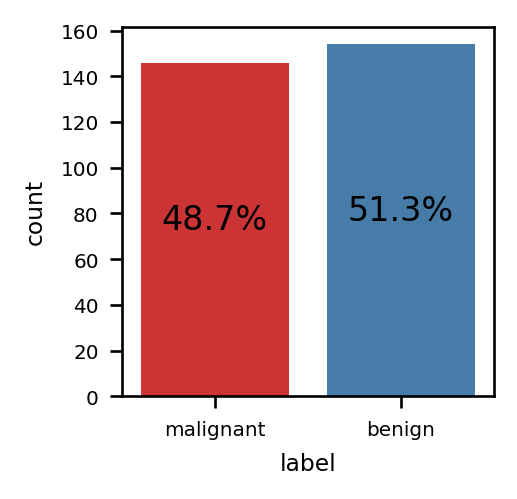

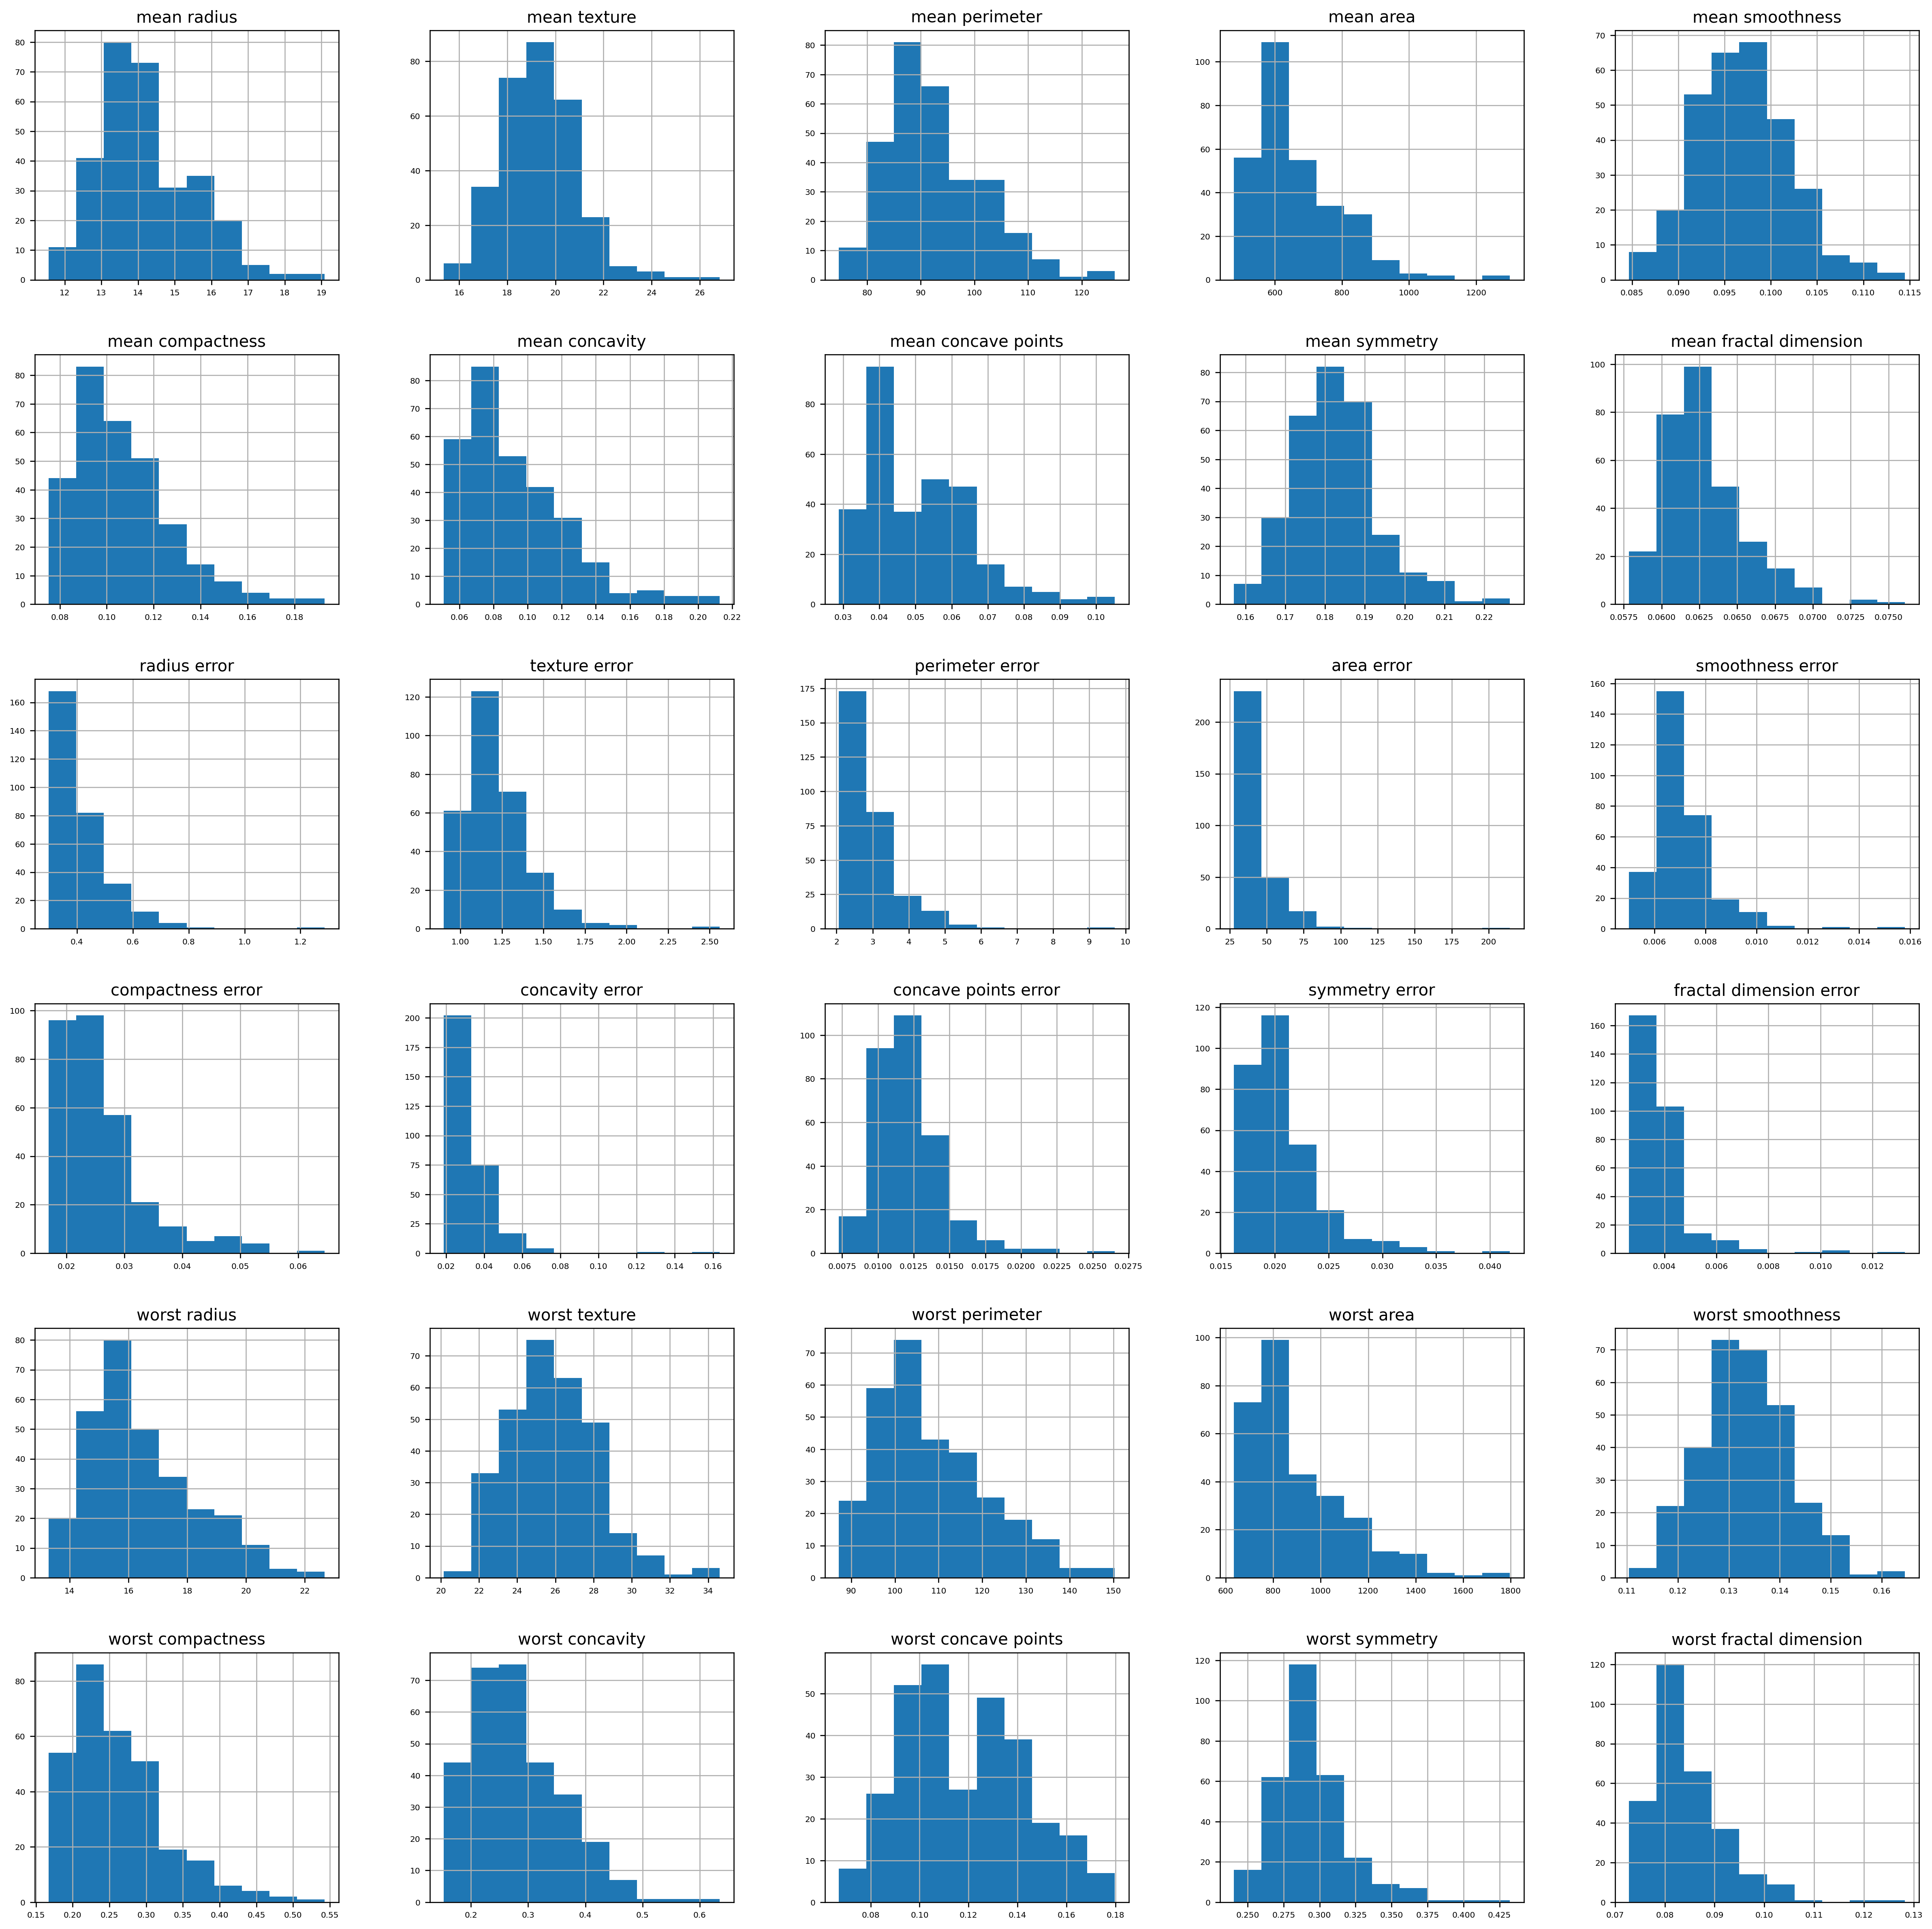

In [21]:
# Your code here
df_breast_cancer = pd.read_csv("assignment2.csv")

# Exact the feature names and label names
feature_names = df_breast_cancer.drop(["label"], axis = 1)
print("feature names: ", feature_names.columns)

label_names= df_breast_cancer["label"].copy()
print("label names:\n", label_names.value_counts())


# Print infomation about the data
display(df_breast_cancer.head())
df_breast_cancer.info()
display(df_breast_cancer.describe().T)

# Graphically show the proportions of the labels in the whole dataset
plt.figure(figsize=(2, 2))
total = float(len(df_breast_cancer))
ax = sns.countplot(x="label", data=df_breast_cancer, palette="Set1")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.annotate(percentage, (x, y), ha="center")

# Histogram
df_breast_cancer.hist(figsize=(25,25))
plt.show()



### 1.2 Visualise the dataset [1.5 marks]

As this data is well curated by the client already, you do not need to worry about outliers, missing values or imputation in this case, but be aware that this is the exception, not the rule.

To familiarise yourself with the nature and information contained in the data, display histograms for the data according to the following instructions:
 - **display histograms** for each feature in the _mean_ group, but on _each_ histogram **have the two classes displayed together in one plot** (see example plot below and a code fragment to help you) - and note that your plot does not need to look exactly the example here;
 - **repeat this** for the _standard error_ and _worst_ groups;
 - make sure that in all cases you clearly label the plots and the classes in histograms.

<center><img src="Example_Hist_Plot.png" width="300" alt="Example plot of histogram"></center>

# Code fragment to help with plotting histograms combining matplotlib and seaborn (and pandas)
fig, axes = plt.subplots(Nrows, Ncols, figsize=(?, ?))
...
sns.histplot(data=df, x=??, hue="??", bins=??, kde=True, ax=axes[row,col], edgecolor=None)

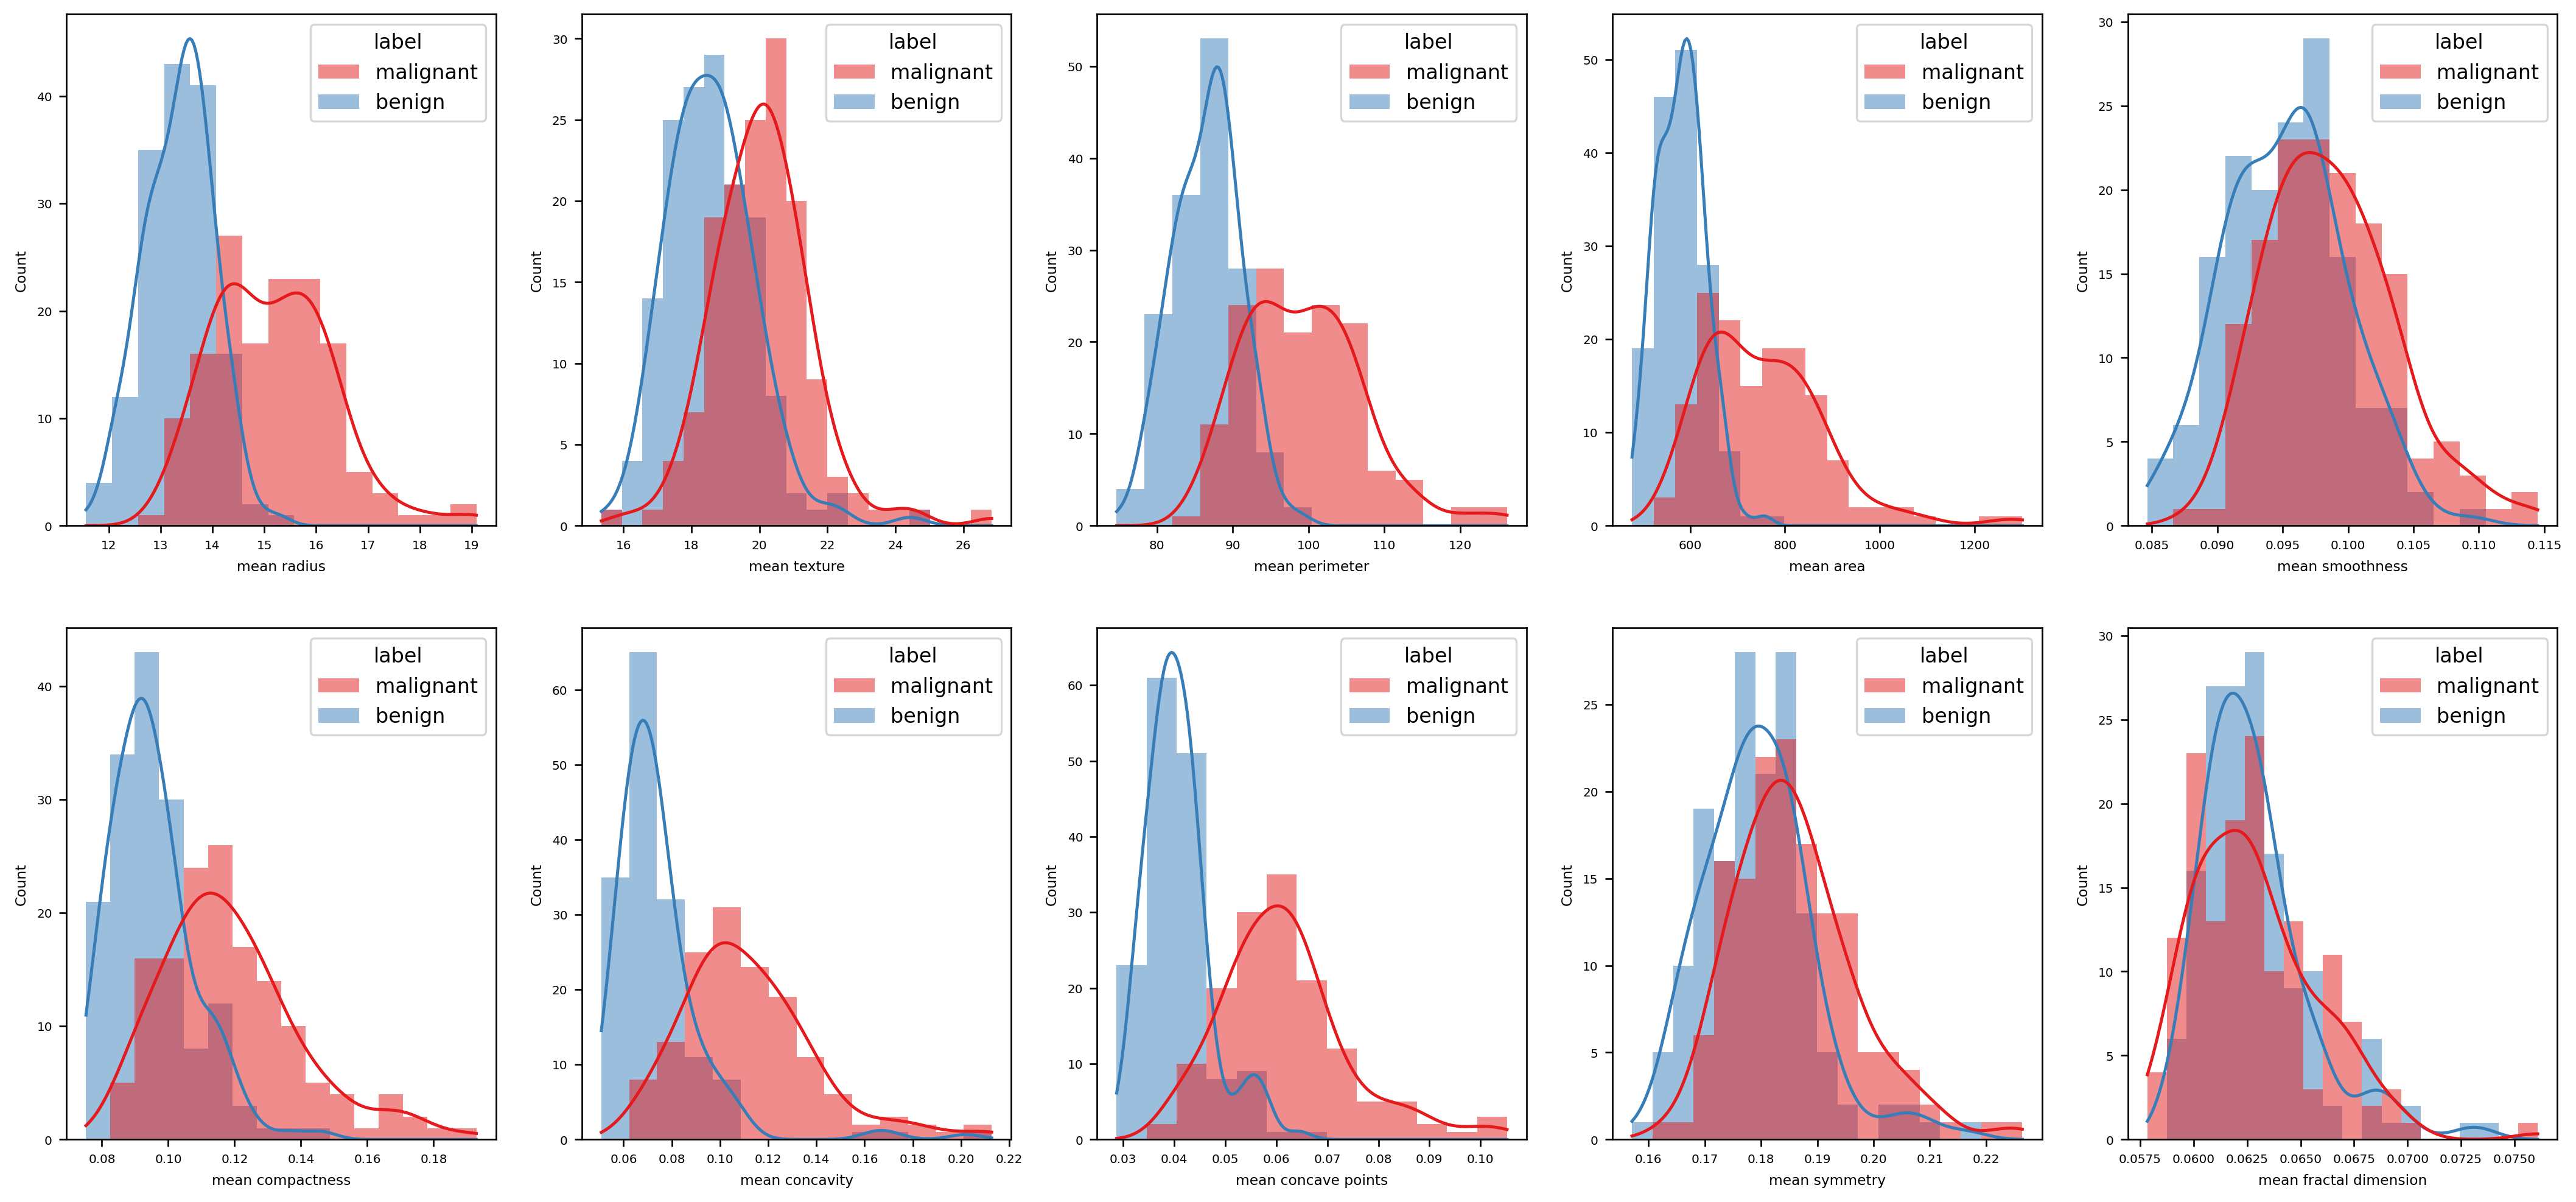

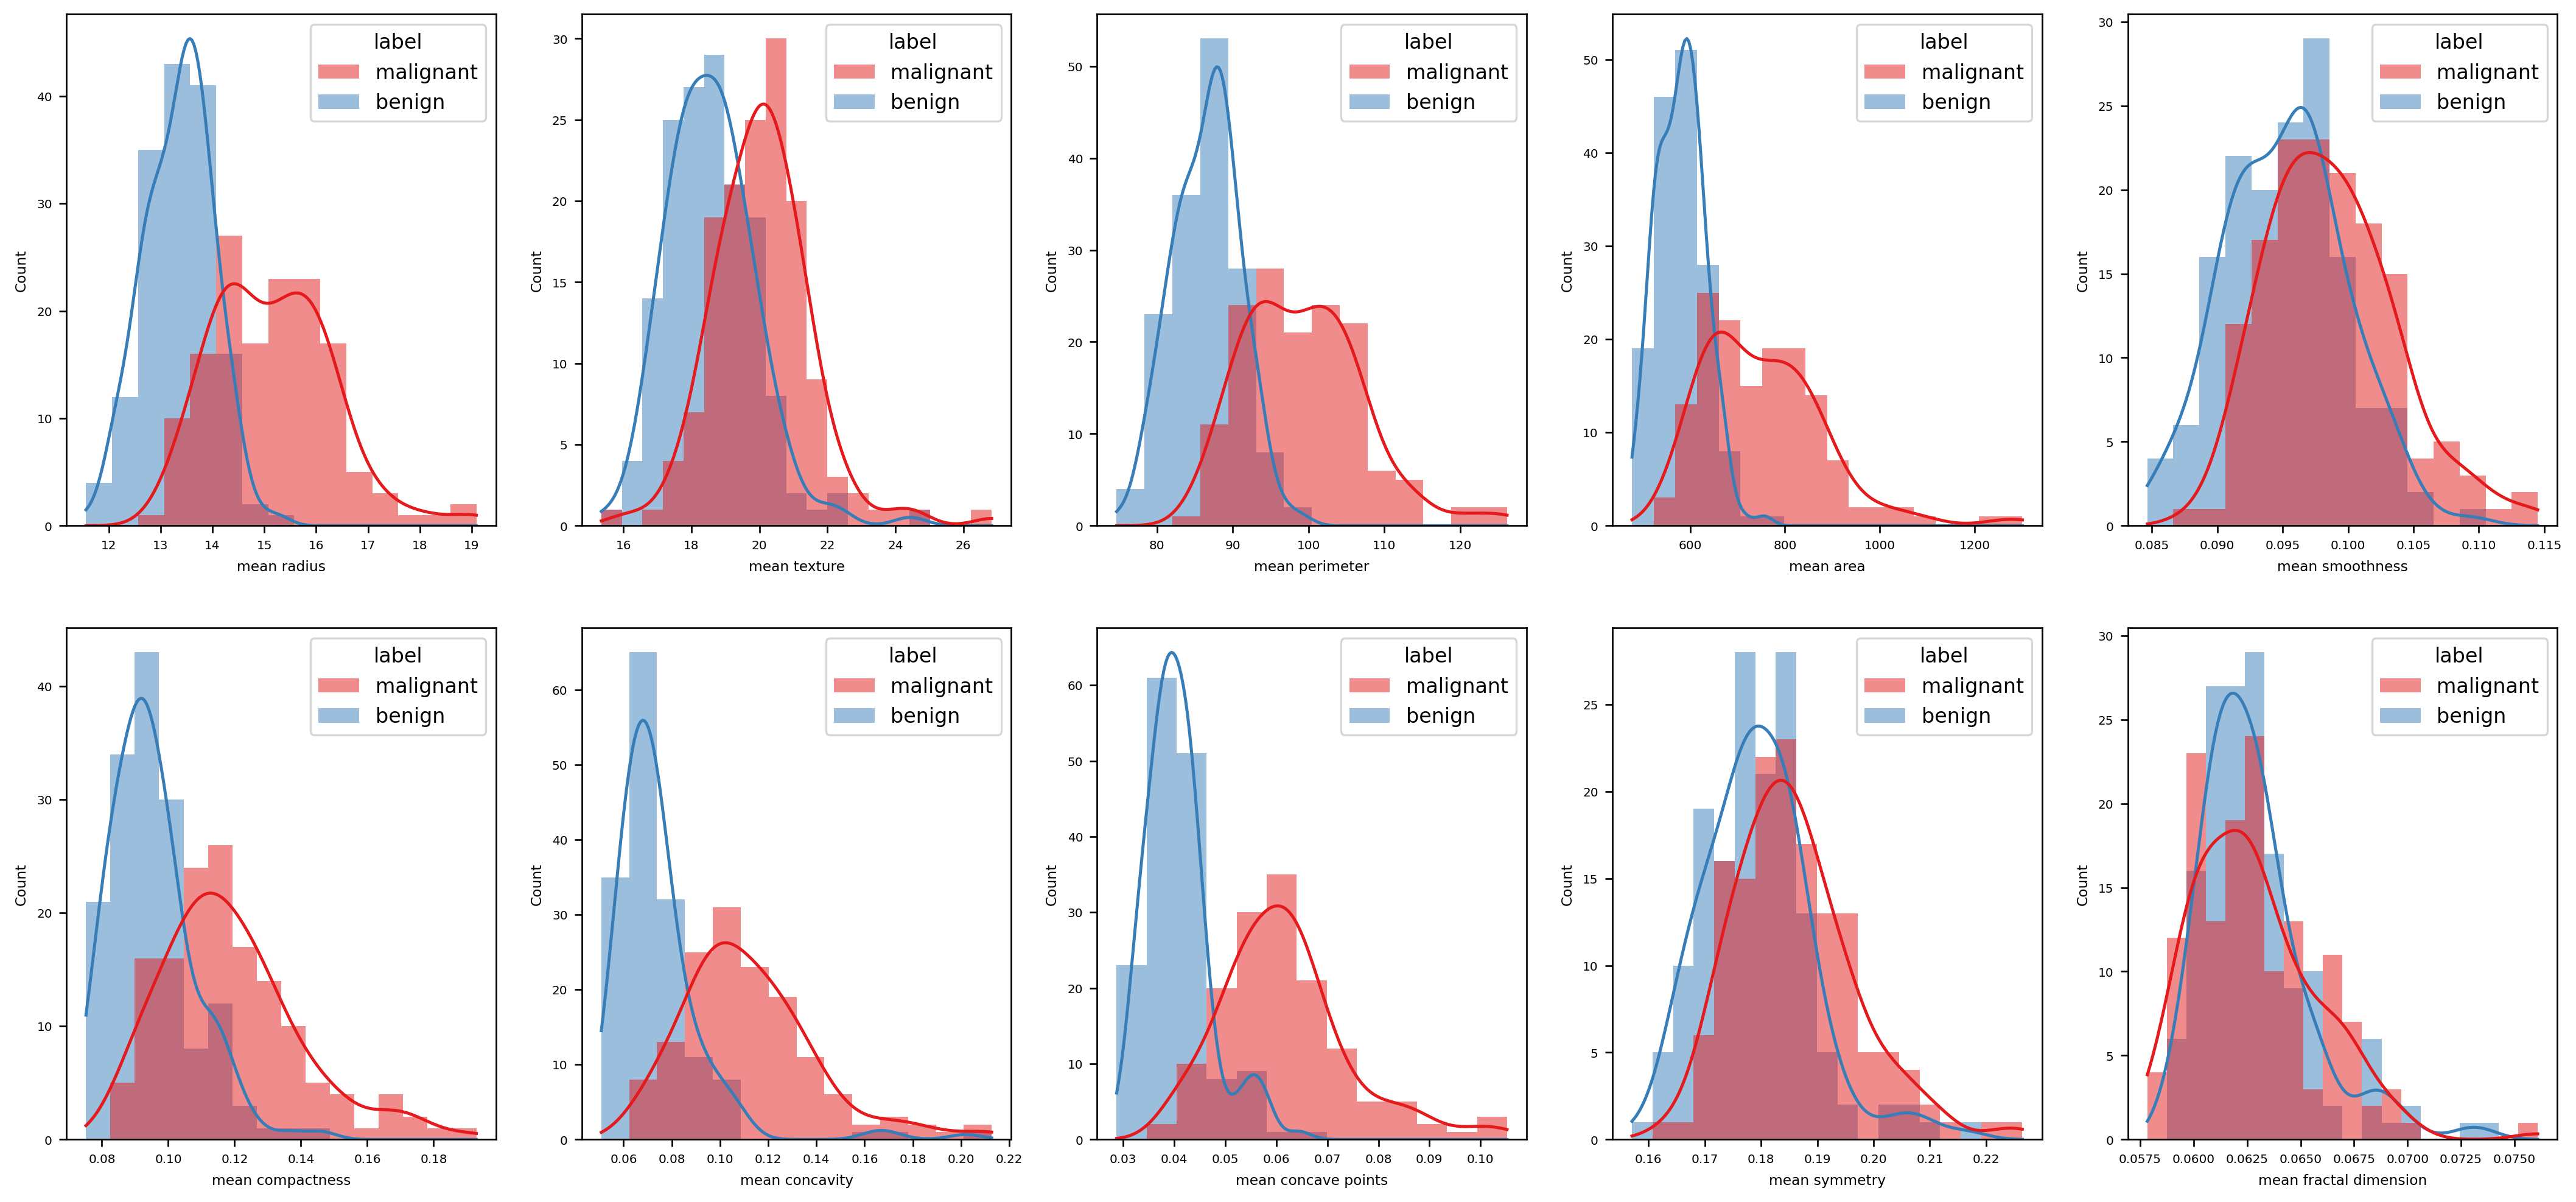

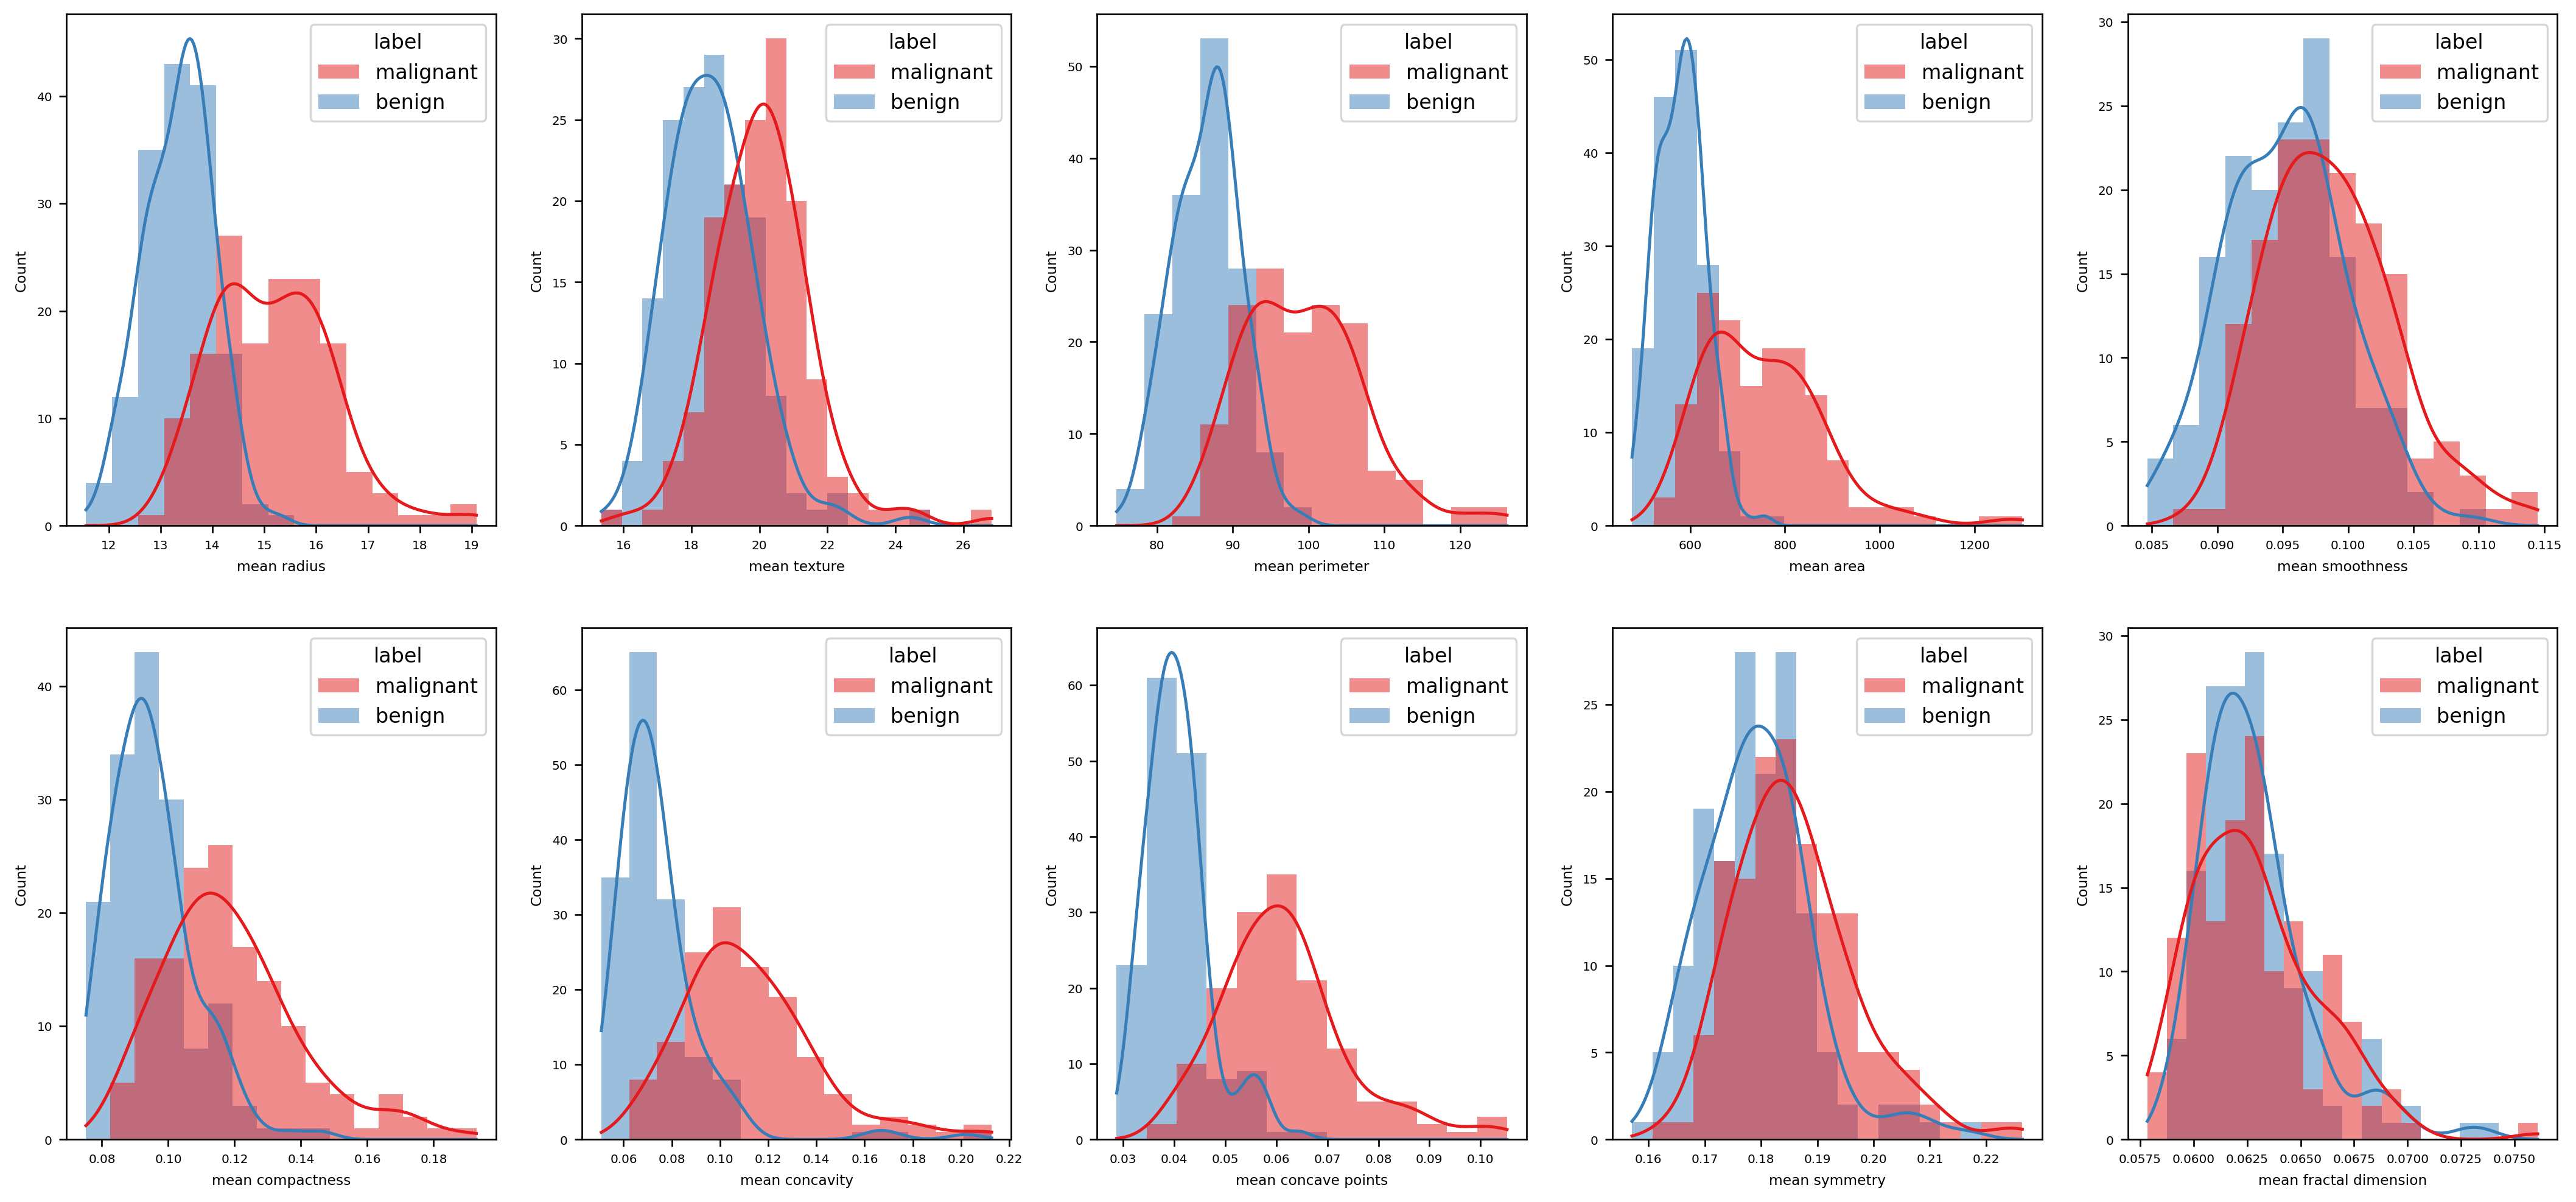

In [22]:
# Your code here
def histogram(features, Nrows, Ncols):
    fig, axes = plt.subplots(Nrows, Ncols, figsize=(22, 10))

    for row in range(Nrows):
        for col in range(Ncols):
            feature = features[row*Ncols + col]
            sns.histplot(ax=axes[row, col], x=feature, data=df_breast_cancer, kde=True, palette='Set1', hue='label', edgecolor=None)

histogram(list(feature_names[0:10]),2,5)
histogram(list(feature_names[10:20]),2,5)
histogram(list(feature_names[20:30]),2,5)

### 1.3 Ranking the features [0.5 marks]

**Based on the histograms, which do you think are the 3 strongest features for discriminating between the classes?**

In [23]:
# Convert label column to numbers
df_breast_cancer.replace(['benign', 'malignant'], [0,1], inplace=True)
corr = df_breast_cancer.corr()["label"].sort_values(ascending=False)
print(corr)

label                      1.000000
worst concave points       0.778575
worst perimeter            0.764033
worst radius               0.755703
mean concave points        0.729886
mean perimeter             0.710967
worst area                 0.705986
mean radius                0.698323
mean area                  0.664719
mean concavity             0.623550
worst concavity            0.622537
worst compactness          0.588025
mean compactness           0.571838
worst texture              0.510801
area error                 0.508086
radius error               0.506787
perimeter error            0.503923
mean texture               0.478151
worst smoothness           0.435969
worst symmetry             0.420787
worst fractal dimension    0.350321
mean smoothness            0.349023
concave points error       0.316472
mean symmetry              0.306239
compactness error          0.246652
concavity error            0.157780
fractal dimension error    0.029922
mean fractal dimension     0

Your answer here

3 strongest features:  Worst concave points (0.778575), Worst Premiter (0.764033), Worst radius (0.755703) because the features with minimal overlap and clear separation between class distributions are typically stronger.

### 1.4 Splitting the dataset [0.5 marks]

Split the dataset into appropriate subsets. You must choose what the subsets are and how big they are. However, we want to make sure the proportion of the two classes is consistent across all datasets, so use the _stratify_ option, as used in workshops 5 and 6. Verify the size and label distribution in each dataset.

In [24]:
df_breast_cancer.shape

(300, 31)

In [25]:
# Your code here
from sklearn.model_selection import train_test_split

# Convert label column to numbers
label_names = label_names.replace(['benign', 'malignant'], [0,1])

# Split our dataset in train, validation and test sets
X, X_test, y, y_test = train_test_split(
    feature_names, 
    label_names,   
    test_size=0.2,        
    stratify=label_names,   
    random_state=42   
)

X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y,   
    test_size=0.2,        
    stratify=y,   
    random_state=42   
)

print(f'Shapes of training, test, validation sets are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape, X_val.shape, y_val.shape]}')

Shapes of training, test, validation sets are [(192, 30), (192,), (60, 30), (60,), (48, 30), (48,)]


## 2. Build, Train and Optimise Classifiers (60% = 18 marks)

### 2.1 Pipeline [0.5 marks]
**Build a pre-processing pipeline** that includes imputation (as even though we don't strictly need it here it is a good habit to always include it) and other appropriate pre-processing.  

In [26]:
# Your code here
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([('imputer', SimpleImputer(strategy="median")), 
                          ('stdscaler', StandardScaler())])


### 2.2 Baseline measurements [1.5 marks]

For our classification task we will consider **three simple baseline cases**:
1) predicting all samples to be negative (class 1)
2) predicting all samples to be positive (class 2)
3) making a random prediction for each sample with equal probability for each class

**For each case measure and display the following metrics:**
 - balanced accuracy
 - recall
 - precision
 - auc
 - f1score
 - fbeta_score with beta=0.1
 - fbeta_score with beta=10

Code is given below for the latter metrics (all metrics are discussed in lecture 4 and many are in workshop 4).

Also **calculate and display the confusion matrix** for each baseline case, using a heatmap and numbers (as in workshop 4). 

In [27]:
from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

Metrics for Baseline samples as negative
Balanced Accuracy: 0.5
Recall: 0.0
Precision: 0.0
AUC: 0.5
F1 Score: 0.0
F-beta Score (beta=0.1): 0.0
F-beta Score (beta=10): 0.0



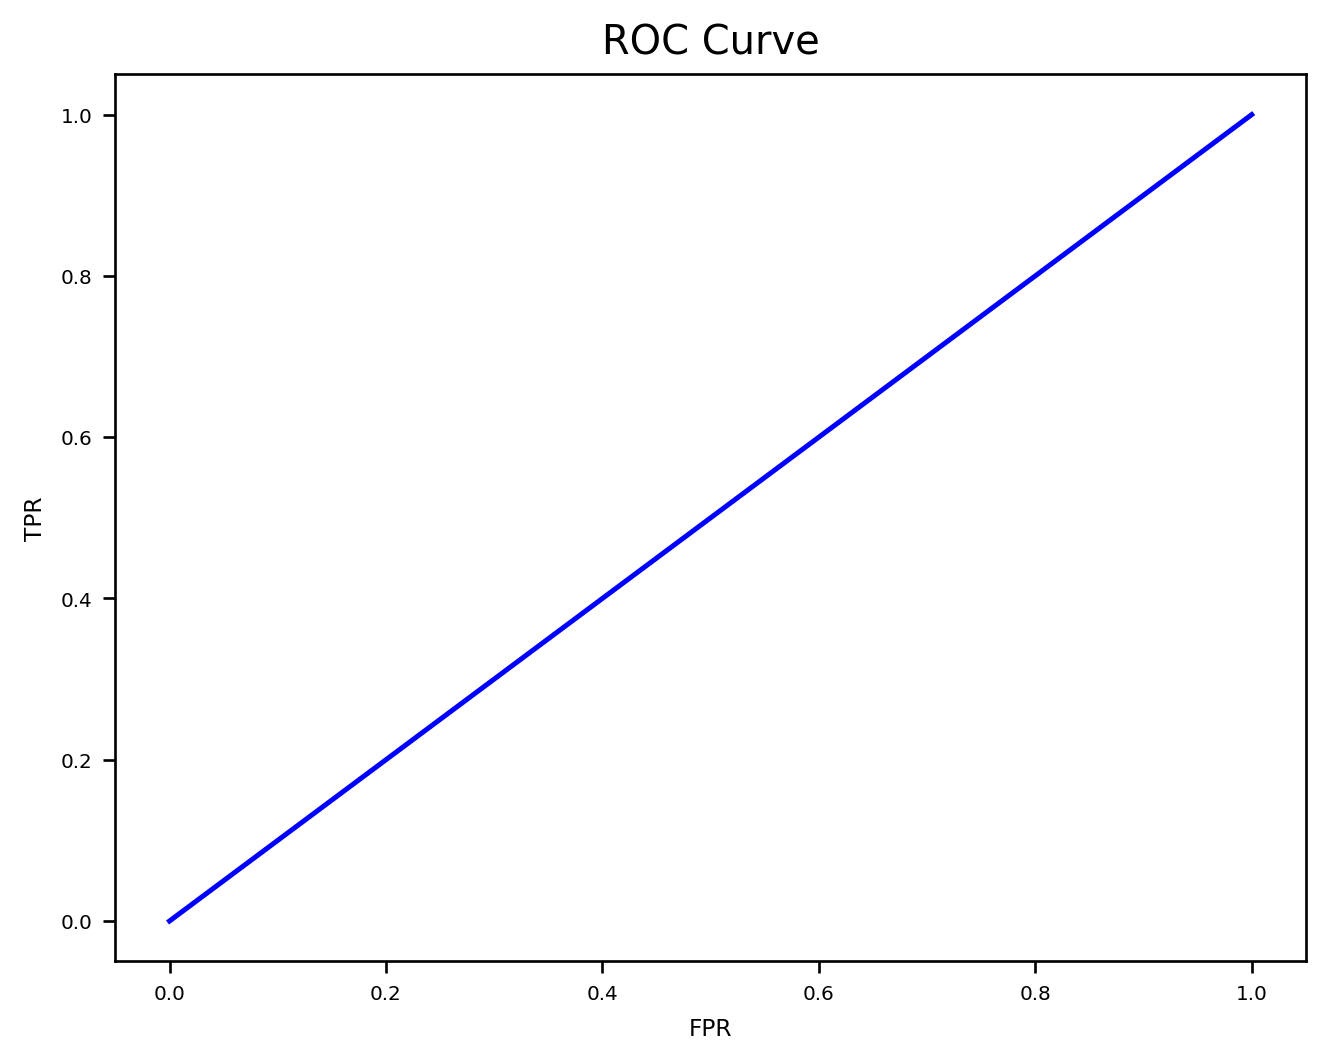

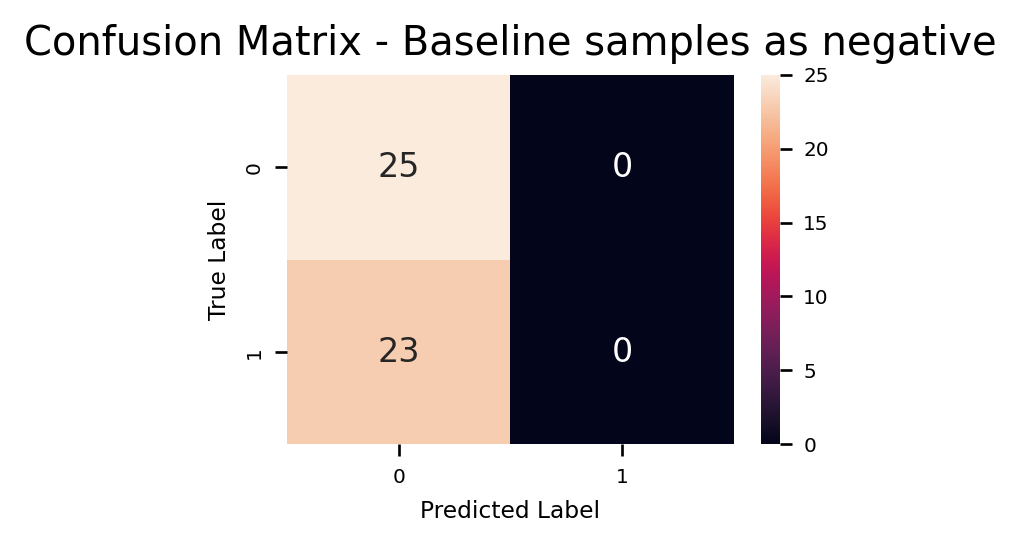

Metrics for Baseline samples as positive
Balanced Accuracy: 0.5
Recall: 1.0
Precision: 0.4791666666666667
AUC: 0.5
F1 Score: 0.647887323943662
F-beta Score (beta=0.1): 0.48165042504665145
F-beta Score (beta=10): 0.9893526405451447



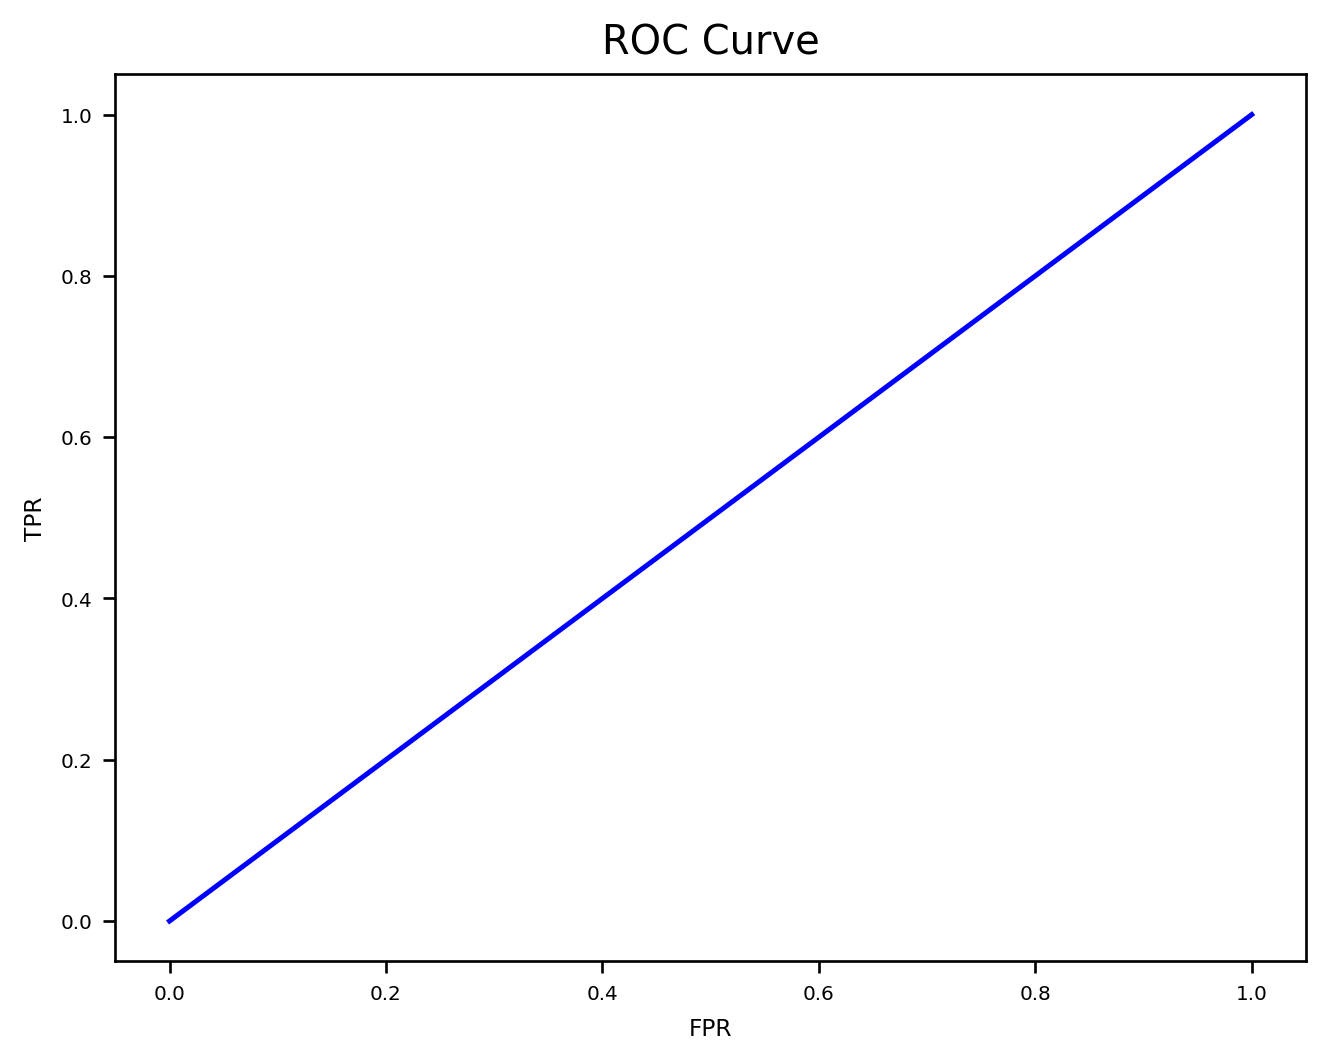

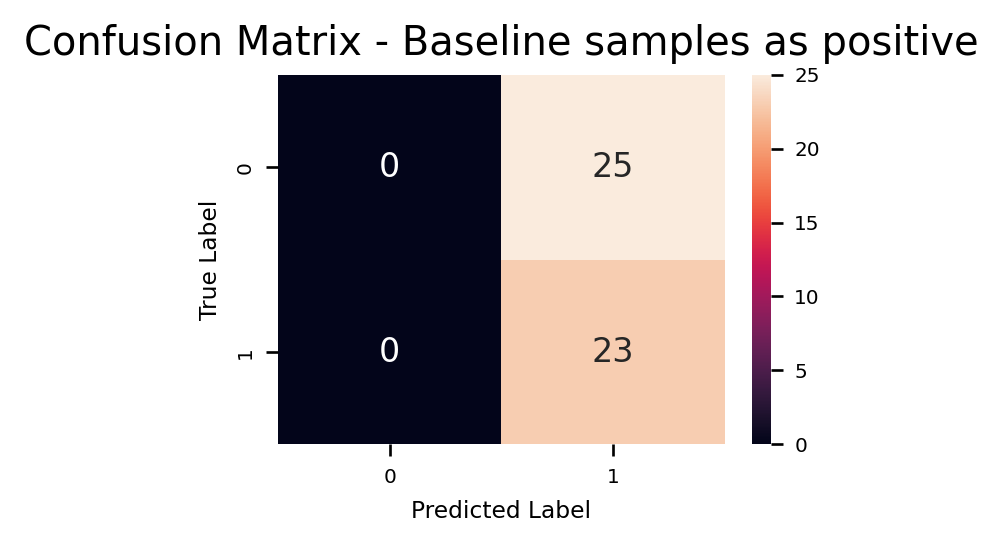

Metrics for Baseline equal probability
Balanced Accuracy: 0.5208695652173914
Recall: 0.5217391304347826
Precision: 0.5
AUC: 0.5208695652173914
F1 Score: 0.5106382978723404
F-beta Score (beta=0.1): 0.5002063557573256
F-beta Score (beta=10): 0.5215146299483648



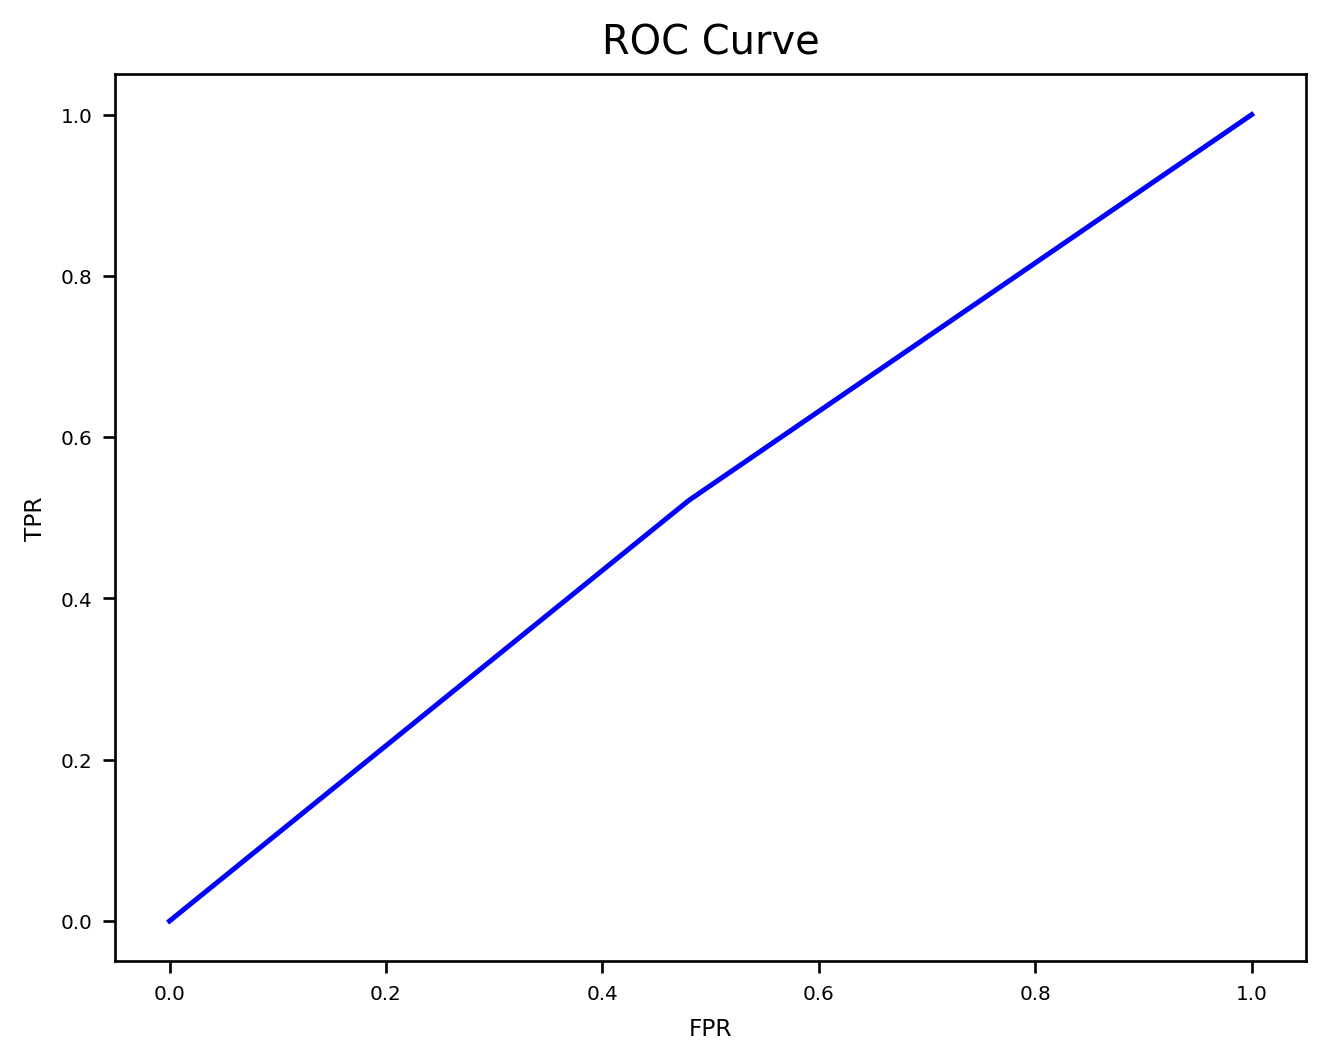

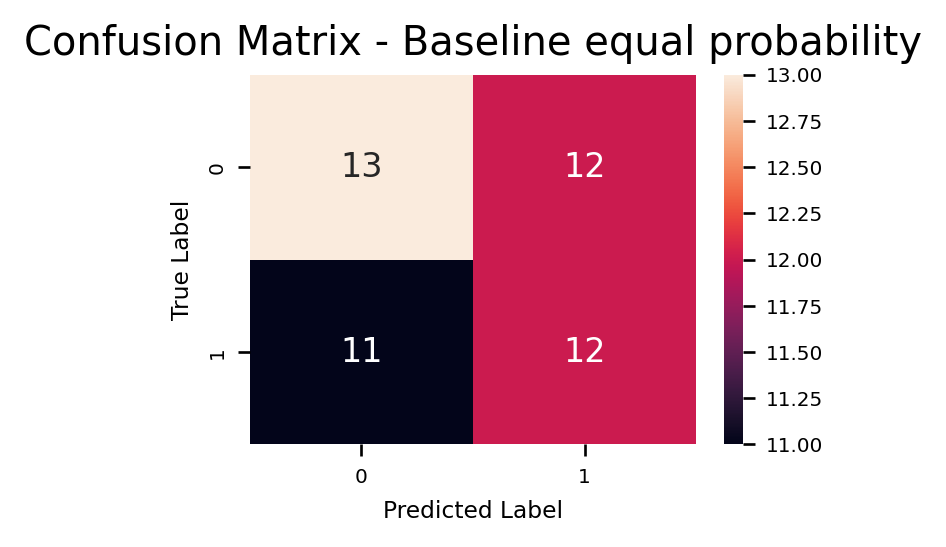

In [28]:
# Your code here
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, roc_curve
import warnings
warnings.filterwarnings("ignore")
# Baseline case 1: Predicting all samples as negative (class benign)
baseline1 = DummyClassifier(strategy="constant", constant=0)
baseline1.fit(X_train, y_train)

# Baseline case 2: Predicting all samples as positive (class malignant)
baseline2 = DummyClassifier(strategy="constant", constant=1)
baseline2.fit(X_train, y_train)

# Baseline case 3: Random predictions with equal probability for each class
baseline3 = DummyClassifier(strategy="uniform")
baseline3.fit(X_train, y_train)

baselines = [baseline1, baseline2, baseline3]
baseline_labels = ["Baseline samples as negative", "Baseline samples as positive", "Baseline equal probability"]

# Perform predictions
y_pred_baselines = [model.predict(y_val) for model in baselines]

# Calculate and display metrics for each baseline case
def caculate_metrics(y, y_pred, name):
    print("Metrics for",name)
    print("Balanced Accuracy:", balanced_accuracy_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("AUC:", roc_auc_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))
    print("F-beta Score (beta=0.1):", f01_score(y, y_pred))
    print("F-beta Score (beta=10):", f10_score(y, y_pred))
    print("")

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred, pos_label=1)
    plt.plot(fpr, tpr, 'b')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title("ROC Curve")

    # Calculate and display confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm,annot=True, fmt="d")
    plt.title("Confusion Matrix - " + name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

for i, model in enumerate(baselines):
       caculate_metrics(y_val,y_pred_baselines[i],  baseline_labels[i])

### 2.3 Choose a performance metric [0.5 marks]

Based on the above baseline tests and the client's requirements, **choose a performance metric** to use for evaluating/driving your machine learning methods.  **Give a reason for your choice.**

# Your answer here
The chosen performance metric is AUC (ROC curve) because it shows TPR and FPR. TPR (True positive rate) have corresponding value with Recall.  
1) have at least a 95% probability of detecting malignant cancer when it is present => Recall
2) have no more than 1 in 10 healthy cases (those with benign tumours) labelled as positive (malignant). => FPR


### 2.4 SGD baseline [1 mark]

For a stronger baseline, **train and evaluate** the Stochastic Gradient Descent classifier (as seen in workshop 5). For this baseline case use the default settings for all the hyperparameters.

Metrics for SGD baseline
Balanced Accuracy: 0.9147826086956521
Recall: 0.8695652173913043
Precision: 0.9523809523809523
AUC: 0.9147826086956521
F1 Score: 0.909090909090909
F-beta Score (beta=0.1): 0.9514837494112105
F-beta Score (beta=10): 0.8703145196036193



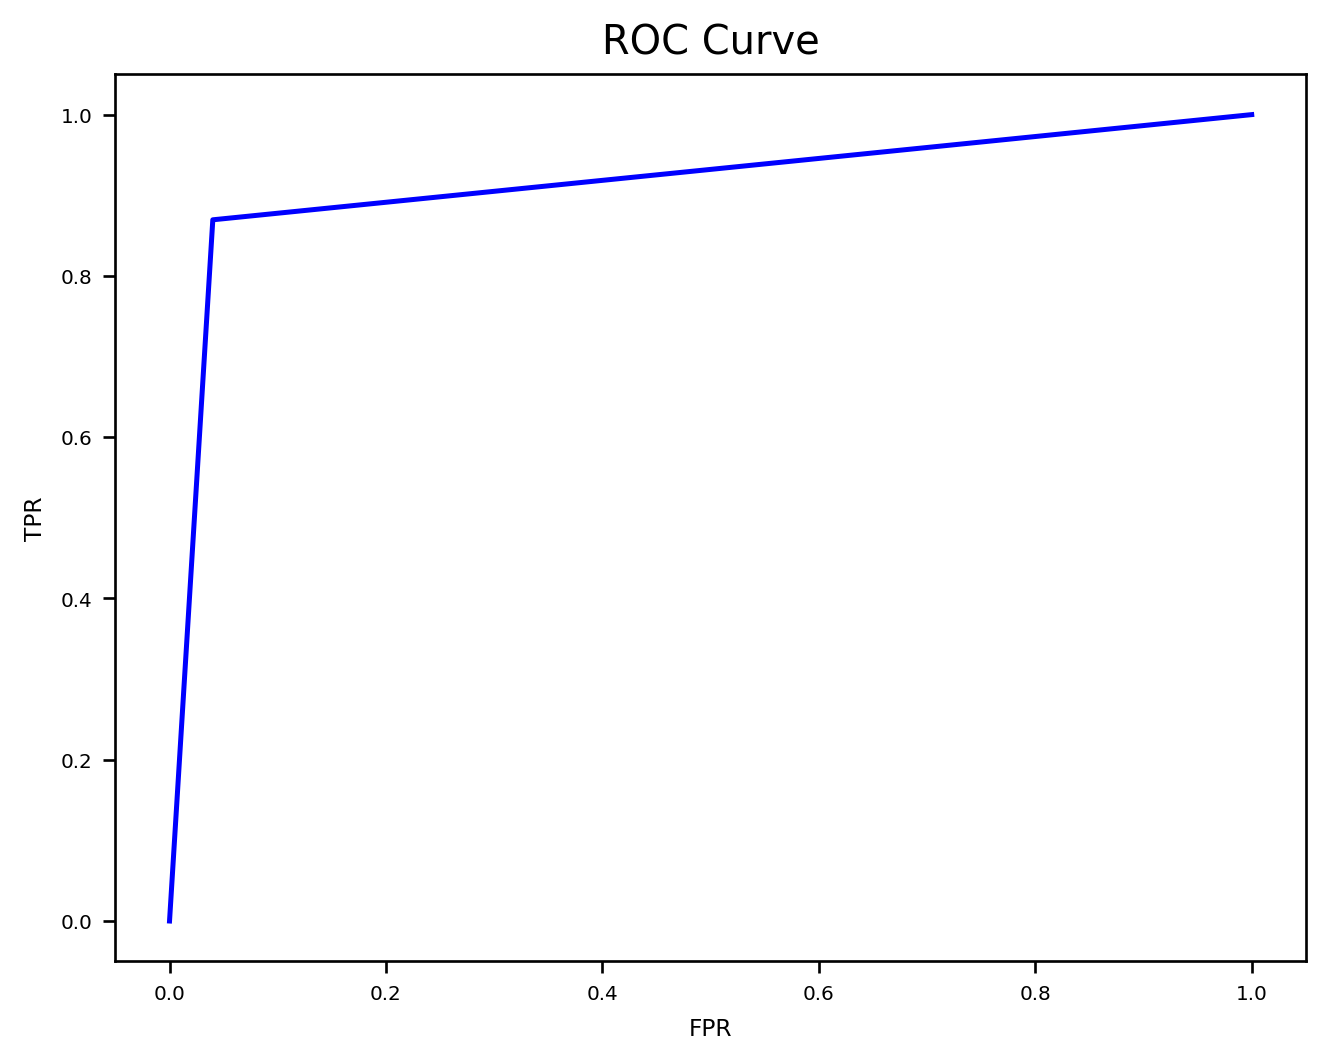

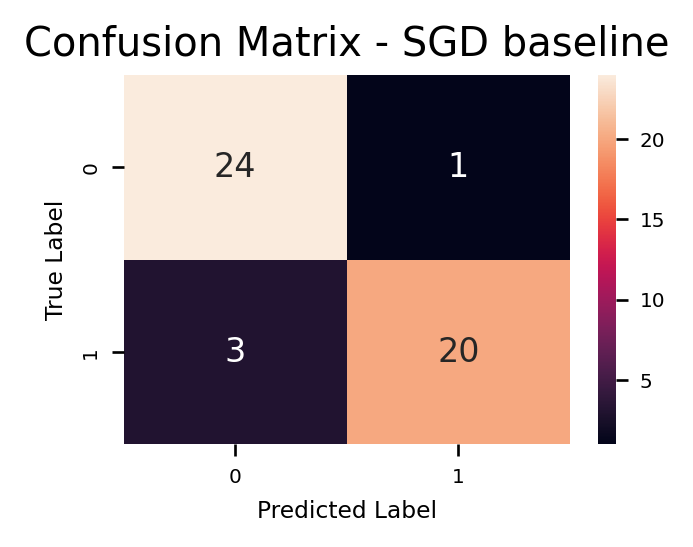

In [29]:
# Your code here
from sklearn.linear_model import SGDClassifier

sgd_pl = Pipeline([ ('preproc',preproc_pl), ('sgd',SGDClassifier(random_state=42))])
sgd_pl.fit(X_train, y_train)
y_val_pred = sgd_pl.predict(X_val)

caculate_metrics(y_val, y_val_pred, "SGD baseline")

### 2.5 Confusion matrix [1 mark]

Calculate and display the normalized version of the confusion matrix.  From this **calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.  Which of the client's two criteria does this relate to, and is this baseline satisfying this criterion or not?**

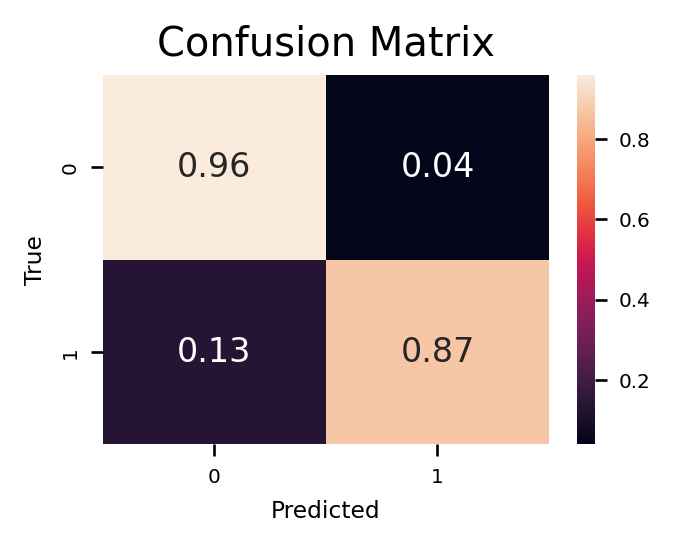

In [30]:
# Your code here
cmat = confusion_matrix(y_true=y_val, y_pred=y_val_pred,  normalize='true')
plt.figure(figsize=(3, 2))
sns.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Your answer here
- The probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is 0.13
- Have at least a 95% probability of detecting malignant cancer when it is present => It is not satisfying because it is only 0.87
-  have no more than 1 in 10 healthy cases (those with benign tumours) labelled as positive (malignant) => confusion matrix shows 0.04 => it may satisfy this requirement. 

### 2.6 Main classifier [11 marks]

**Train and optimise the hyperparameters** to give the best performance for **each of the following classifiers**:
 - KNN (K-Nearest Neighbour) classifier
 - Decision tree classifier
 - Support vector machine classifier
 - SGD classifier
 
Follow best practice as much as possible here. You must make all the choices and decisions yourself, and strike a balance between computation time and performance.

You can use any of the sci-kit learn functions in sklearn.model_selection.cross* and anything used in workshops 3, 4, 5 and 6. Other hyper-parameter optimisation functions apart from these cannot be used (even if they are good and can be part of best practice in other situations - for this assignment everyone should assume they only have very limited computation resources and limit themselves to these functions).

**Display the performance of the different classifiers and the optimised hyperparameters.**

**Based on these results, list the best 3 classifiers and indicate if you think any perform equivalently.**

KNN Best score: 0.9843622719126751
KNN Best params: {'knn__n_neighbors': 25, 'knn__weights': 'distance'}
Metrics for KNN
Balanced Accuracy: 0.9365217391304348
Recall: 0.9130434782608695
Precision: 0.9545454545454546
AUC: 0.9365217391304348
F1 Score: 0.9333333333333332
F-beta Score (beta=0.1): 0.9541160593792173
F-beta Score (beta=10): 0.9134366925064599



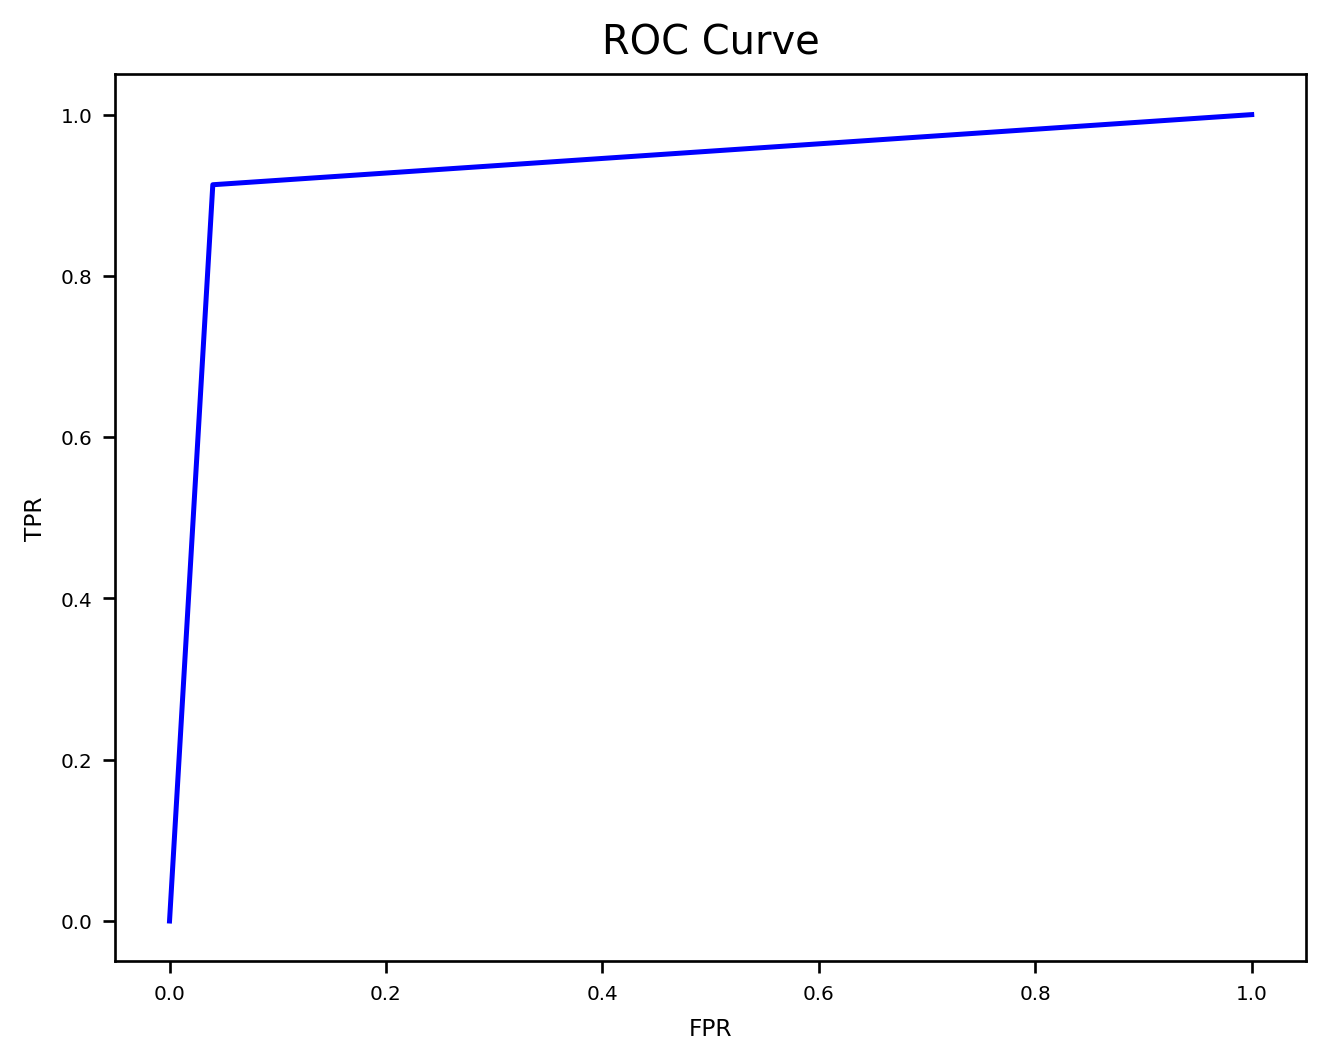

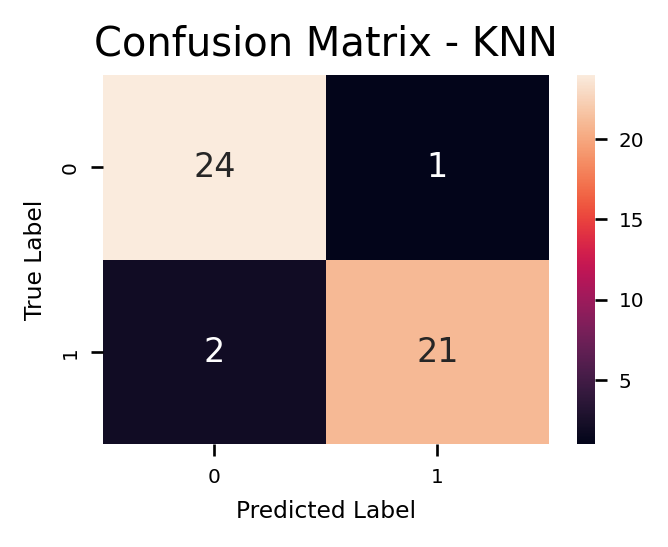

Decision Tree Best score: 0.9316086456805963
Decision Tree Best params: {'tree__max_depth': 50, 'tree__min_samples_leaf': 8, 'tree__min_samples_split': 2}
Metrics for Decison Tree
Balanced Accuracy: 0.8930434782608696
Recall: 0.8260869565217391
Precision: 0.95
AUC: 0.8930434782608696
F1 Score: 0.8837209302325583
F-beta Score (beta=0.1): 0.9485912011863569
F-beta Score (beta=10): 0.827155172413793



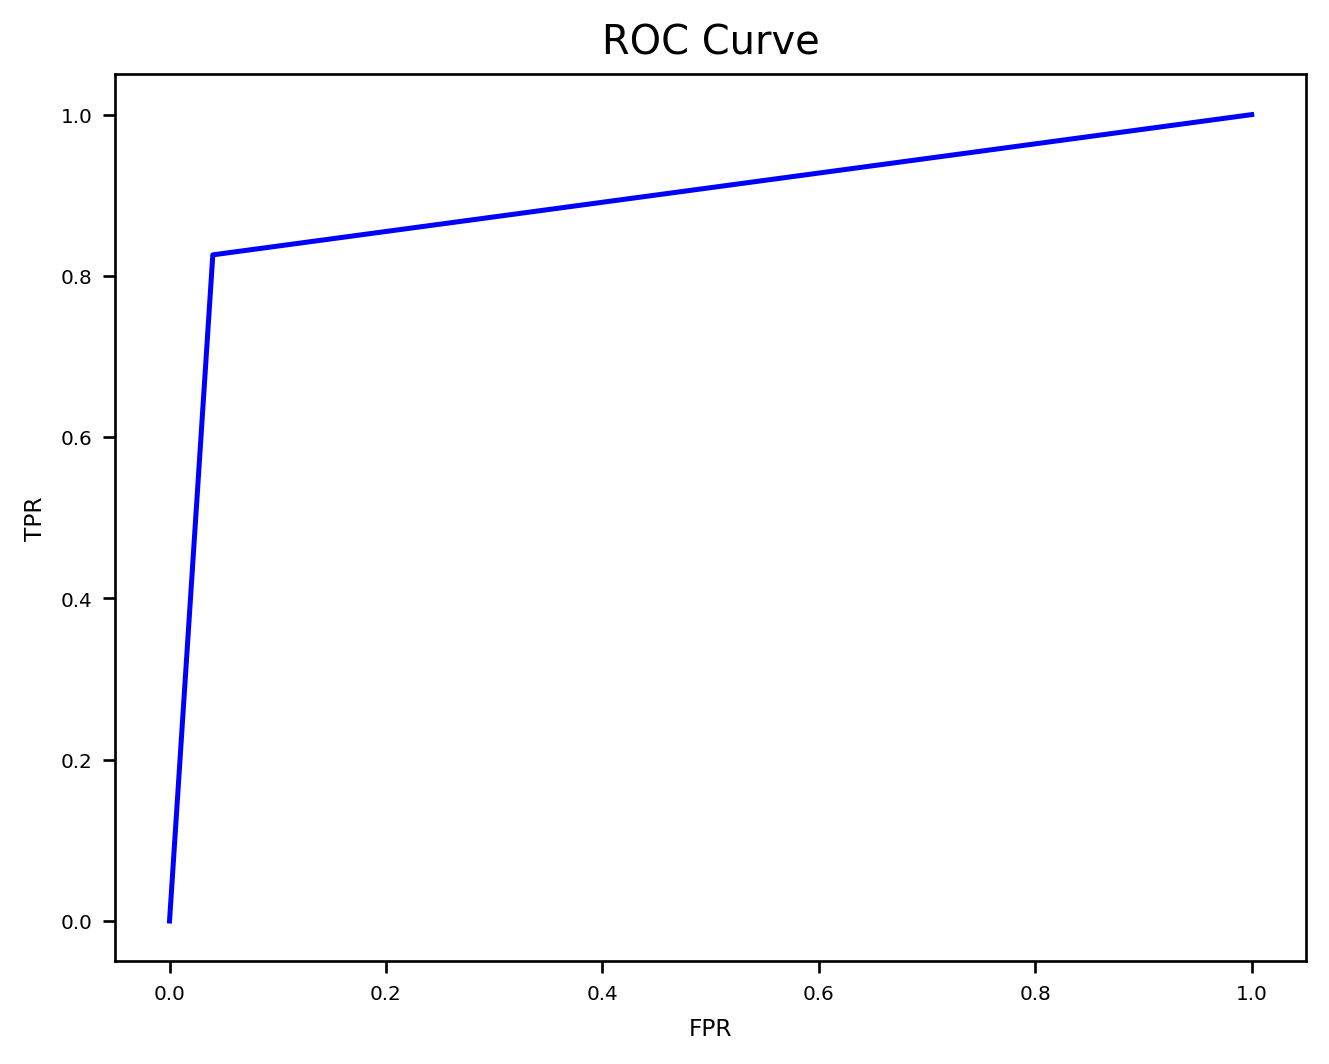

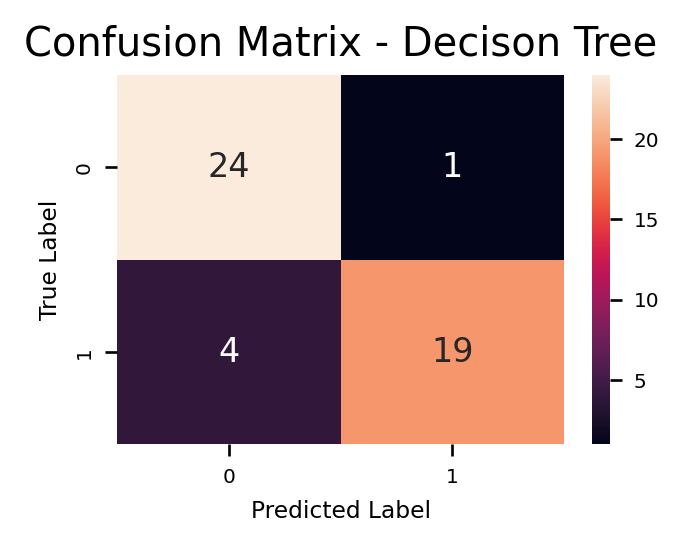

SVM Best score: 0.9814284477842946
SVM Best params: {'SVM__C': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'linear'}
Metrics for SVM
Balanced Accuracy: 0.9347826086956521
Recall: 0.8695652173913043
Precision: 1.0
AUC: 0.9347826086956521
F1 Score: 0.9302325581395349
F-beta Score (beta=0.1): 0.9985170538803757
F-beta Score (beta=10): 0.8706896551724138



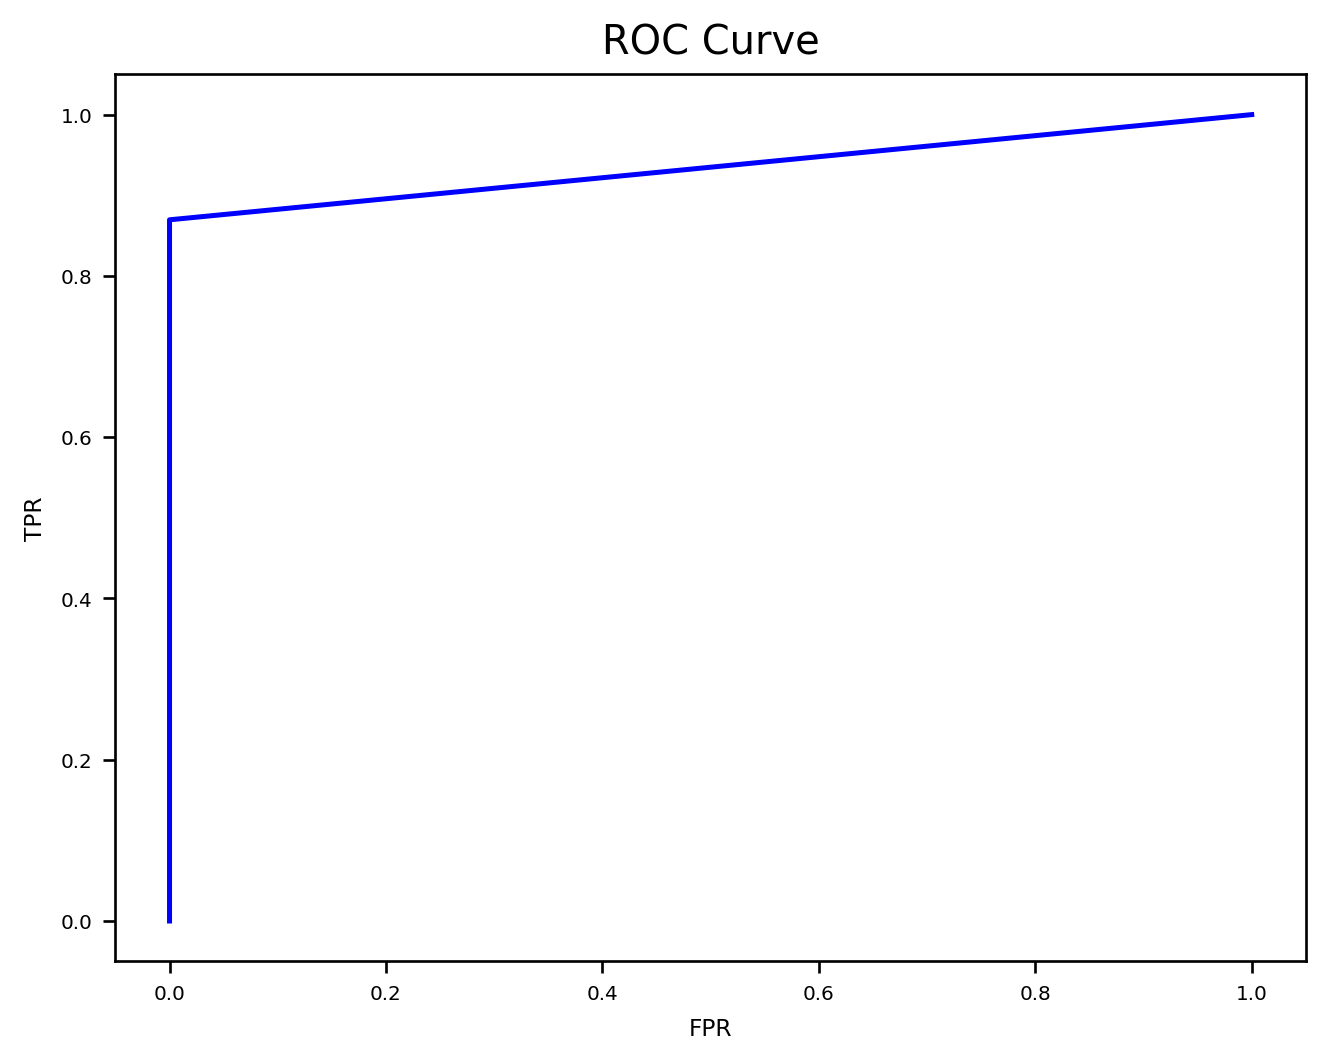

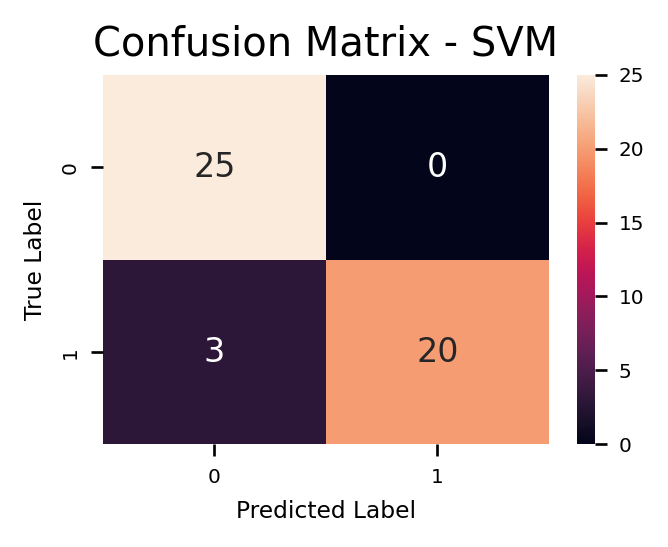

SGDC Best score: 0.9921811359563376
SGDC Best params: {'SGDC__alpha': 0.1, 'SGDC__early_stopping': True, 'SGDC__eta0': 0.0001, 'SGDC__learning_rate': 'optimal', 'SGDC__penalty': 'l2', 'SGDC__random_state': 2}
Metrics for SGDC
Balanced Accuracy: 0.9565217391304348
Recall: 0.9130434782608695
Precision: 1.0
AUC: 0.9565217391304348
F1 Score: 0.9545454545454545
F-beta Score (beta=0.1): 0.999057936881771
F-beta Score (beta=10): 0.9138302455837999



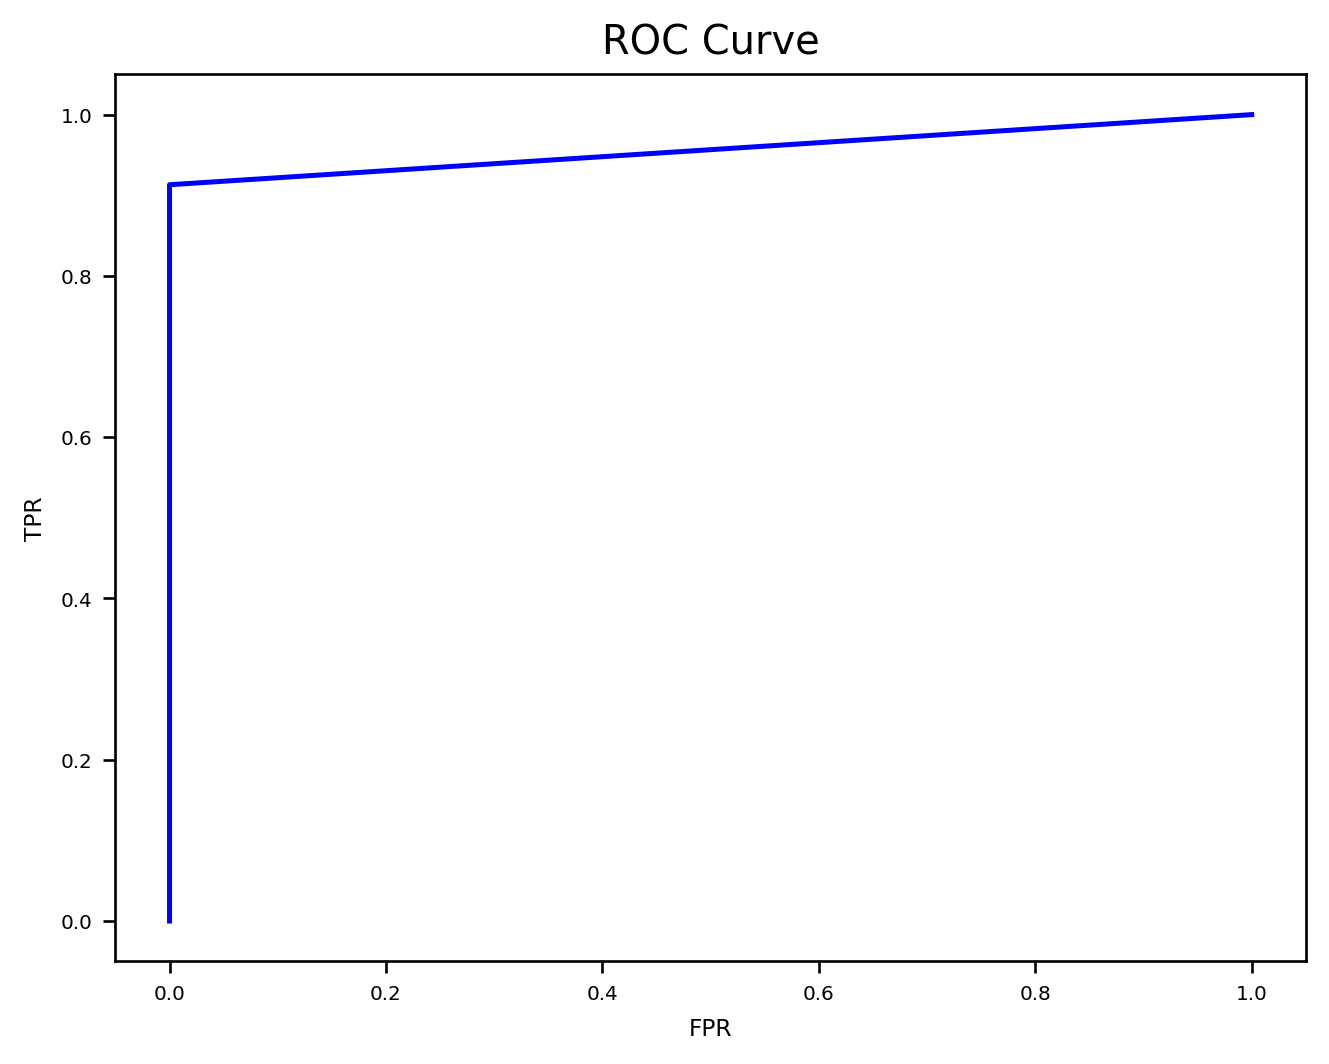

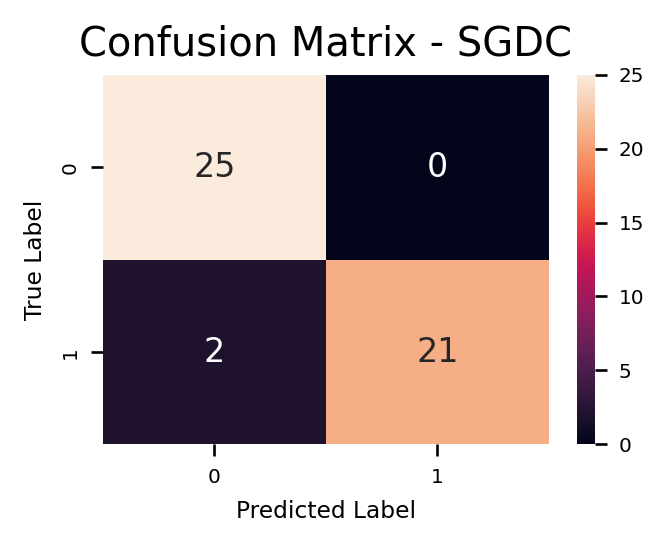

In [31]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#KNN
knn_clf =  Pipeline([ ('preproc',preproc_pl), ('knn',KNeighborsClassifier(n_neighbors=10)) ])  

knn_param = {'knn__n_neighbors':[4,5,6,7,8,9,10,14,15,20,25],
             'knn__weights':['uniform','distance']}
knn_grid = GridSearchCV(estimator=knn_clf,param_grid=knn_param,
                        cv=3, error_score='raise',
                        scoring='roc_auc',
                        n_jobs=-1).fit(X_train,y_train)
knn_grid.best_estimator_.fit(X_train,y_train)
knn_y_val_pred = knn_grid.best_estimator_.predict(X_val)

#Decison Tree
tree_clf = Pipeline([ ('preproc',preproc_pl), ('tree', DecisionTreeClassifier(max_depth = 10, random_state=42)) ]) 

tree_param = {'tree__max_depth':[50,70,20,10],
              'tree__min_samples_split':[2,4,8],
              'tree__min_samples_leaf':[2,4,8]}
tree_grid = GridSearchCV(estimator=tree_clf,
                         cv=3,scoring='roc_auc',
                         error_score='raise',
                         n_jobs=-1,
                         param_grid=tree_param).fit(X_train,y_train)
tree_grid.best_estimator_.fit(X_train,y_train)
tree_y_val_pred = tree_grid.best_estimator_.predict(X_val)

#SVM
SVM_model = Pipeline([ ('preproc',preproc_pl), ('SVM', SVC(random_state=42)) ]) 

SVM_param = {"SVM__C":[1,10,100,1000],
             'SVM__kernel':['linear', 'rbf','sigmoid'], 
             'SVM__gamma':[0.1,1,10]}
grid_SVM = GridSearchCV(estimator=SVM_model, 
                        param_grid=SVM_param,
                        cv=3,
                        error_score='raise',
                        scoring='roc_auc',
                          n_jobs=-1).fit(X_train,y_train)
grid_SVM.best_estimator_.fit(X_train,y_train)
SVM_y_val_pred = grid_SVM.best_estimator_.predict(X_val)

# SGD
SGDC_clf =  Pipeline([ ('preproc',preproc_pl), ('SGDC',SGDClassifier(random_state=42)) ])  

SGDC_params = {
    'SGDC__learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'], 
    'SGDC__eta0': [0.0001,0.001,0.01,0.1,1], 
    'SGDC__early_stopping': [False, True],
    'SGDC__random_state':[1,2,3,4,5],
    'SGDC__penalty':['l2', 'l1', 'elasticnet'],
    'SGDC__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

SGDC_grid = GridSearchCV(estimator=SGDC_clf,
                         param_grid=SGDC_params,
                         error_score='raise',
                         cv=3,scoring='roc_auc',
                         n_jobs=-1).fit(X_train,y_train)
SGDC_grid.best_estimator_.fit(X_train,y_train)
SGDC_y_val_pred = SGDC_grid.best_estimator_.predict(X_val)

print("KNN Best score:", knn_grid.best_score_) 
print("KNN Best params:", knn_grid.best_params_) 
caculate_metrics(y_val, knn_y_val_pred, 'KNN')
print("======================================")

print("Decision Tree Best score:", tree_grid.best_score_) 
print("Decision Tree Best params:", tree_grid.best_params_) 
caculate_metrics(y_val, tree_y_val_pred,'Decison Tree')
print("======================================")


print("SVM Best score:", grid_SVM.best_score_) 
print("SVM Best params:", grid_SVM.best_params_) 
caculate_metrics(y_val, SVM_y_val_pred,'SVM')
print("======================================")


print("SGDC Best score:", SGDC_grid.best_score_) 
print("SGDC Best params:", SGDC_grid.best_params_) 
caculate_metrics(y_val, SGDC_y_val_pred,'SGDC')



# Your answer here
Base on the results above, the AUC score SVM and KNN is about 93% and SGD is about 95% => The list the best 3 classifiers is: SGD, SVM and KNN in validation set. Moreover SGD classifier performs best in the validation set


### 2.7 Model selection [1 mark]

**Choose the best classifier** (as seen in workshops 3 to 6) and give details of your hyperparameter settings. **Explain the reason for your choice.**

# Your answer here
The best classifier is SGDC with Best params:{'SGDC__alpha': 0.1, 'SGDC__early_stopping': True, 'SGDC__eta0': 0.0001, 'SGDC__learning_rate': 'optimal', 'SGDC__penalty': 'l2', 'SGDC__random_state': 2} because it has AUC score which is the best score: 0.956 

### 2.8 Final performance [1.5 marks]

**Calculate and display an unbiased performance measure that you can present to the client.**

**Is your chosen classifier underfitting or overfitting?**

**Does your chosen classifier meet the client's performance criteria?**

Metrics for Final Performance
Balanced Accuracy: 0.9827586206896552
Recall: 0.9655172413793104
Precision: 1.0
AUC: 0.9827586206896552
F1 Score: 0.9824561403508771
F-beta Score (beta=0.1): 0.9996465182043125
F-beta Score (beta=10): 0.9658469945355191



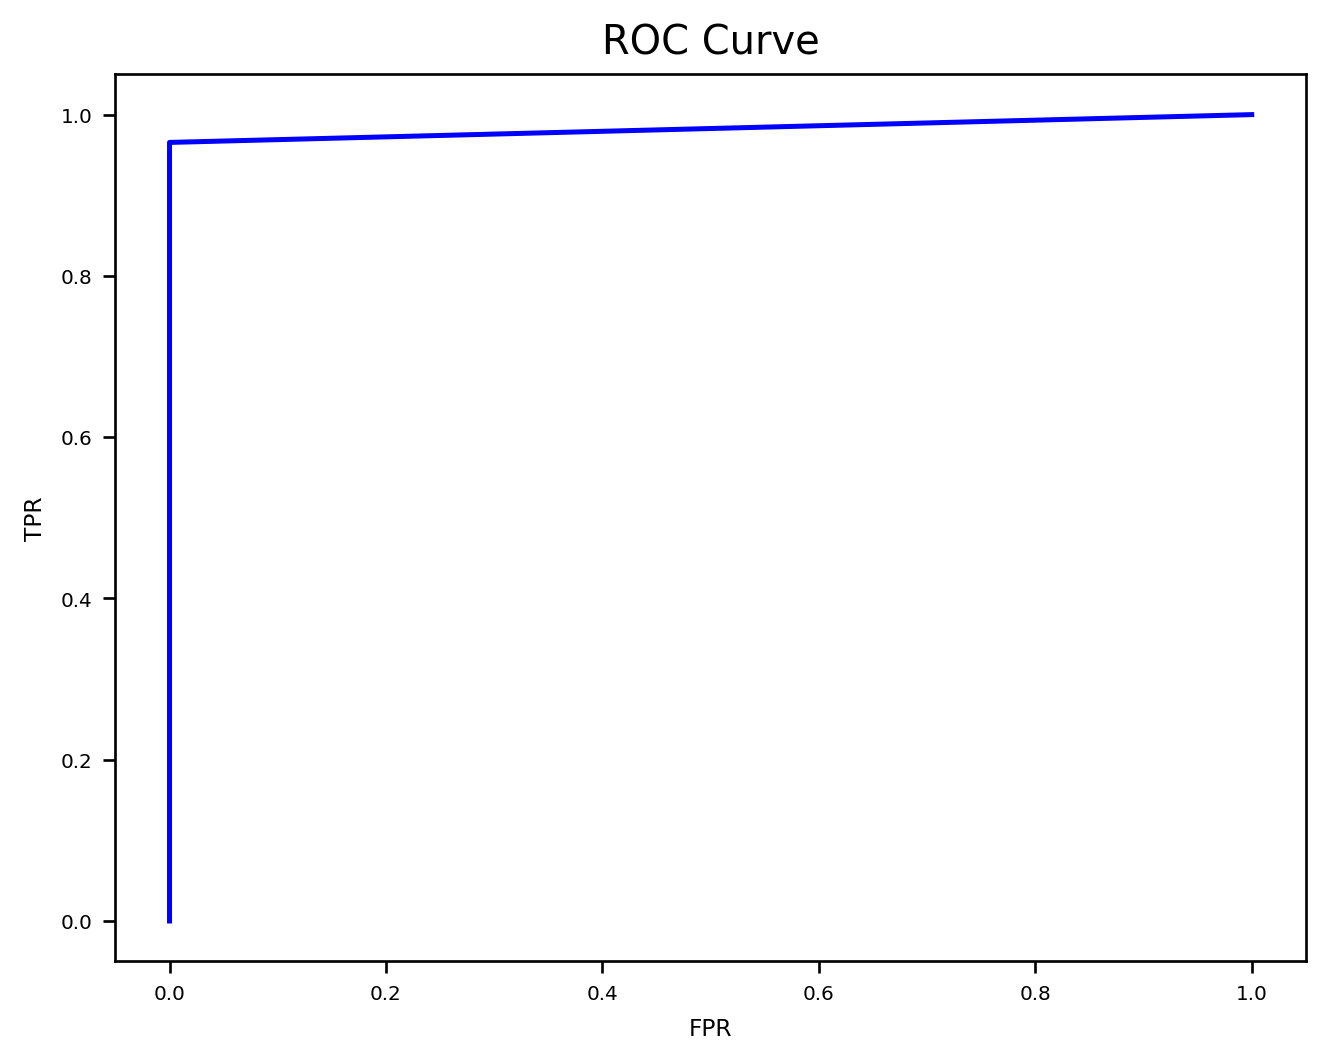

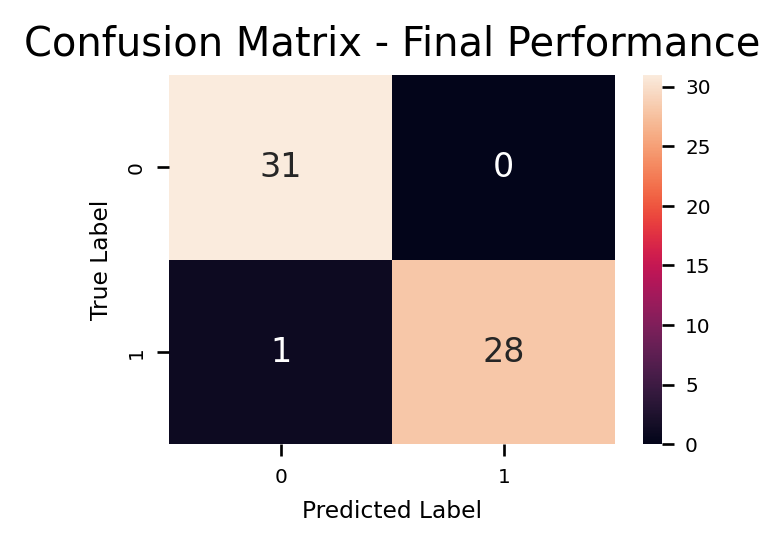

In [32]:
# Your code here
model_best = SGDC_grid.best_estimator_
model_best.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((y_train,y_val),axis=0))

y_test_pred = model_best.predict(X_test)

caculate_metrics(y_test, y_test_pred,'Final Performance')

# Your answers here
- The AUC score in the test set and training set are no gap too big, and other classifiers also have approximately the same results, so it is hard to conclude it is overfitting. Moreover, the dataset is small with only 300 instances. Therefore to conclude it is underfitting and overfititng, we need to have more data. Therefore it is neither overfitting nor underfitting

- Yes, it meets the client's performance criteria because the recall 0.96 and FPR < 10%

## 3. Decision Boundaries (15% = 4.5 marks)

### 3.1 Rank features [1 mark]

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is (mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1))), where x1 and x2 are the datasets corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [33]:
# Your code here
# Calculate T-score for each feature
t_scores = []
for feature in feature_names:
    x1 = df_breast_cancer[label_names == 0][feature]
    x2 = df_breast_cancer[label_names == 1][feature]
    t_score = (x2.mean() - x1.mean()) / (0.5 * (x2.std() + x1.std()))
    t_scores.append((feature, t_score))

# Sort the features based on T-score in descending order
t_scores.sort(key=lambda x: abs(x[1]), reverse=True)

print("T-score:")
for feature, t_score in t_scores:
    print(f"{feature}: {t_score:.4f}")


T-score:
worst concave points: 2.4872
worst perimeter: 2.4731
worst radius: 2.4108
mean concave points: 2.2294
worst area: 2.2269
mean perimeter: 2.0823
mean radius: 2.0032
mean area: 1.9225
mean concavity: 1.6088
worst concavity: 1.5859
worst compactness: 1.4986
mean compactness: 1.4256
area error: 1.4055
perimeter error: 1.2986
radius error: 1.2764
worst texture: 1.1853
mean texture: 1.0858
worst smoothness: 0.9666
worst symmetry: 0.9518
worst fractal dimension: 0.7595
mean smoothness: 0.7425
concave points error: 0.6679
mean symmetry: 0.6416
compactness error: 0.5073
concavity error: 0.3361
smoothness error: -0.1892
symmetry error: -0.1231
texture error: -0.0924
fractal dimension error: 0.0623
mean fractal dimension: 0.0113


In [34]:
# Print the best 4 features according to T-score
print("Best 4 features according to T-score:")
for feature, t_score in t_scores[:4]:
    print(f"{feature}: {t_score:.4f}")

Best 4 features according to T-score:
worst concave points: 2.4872
worst perimeter: 2.4731
worst radius: 2.4108
mean concave points: 2.2294


### 3.2 Visualise decision boundaries [2.5 marks]

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the DecisionBoundaryDisplay function (as per workshop 6).

In [35]:
# Your code here
# Your code here
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


# We can pick up two of the best features
feature0 = 27 # worst concave points
feature1 = 22 # worst perimeter
feature2 = 20 # worst radius
feature3 = 7 # mean concave points

def decion_boundary(feature0, feature1, name0, name1, X, y, title):
    X_decisionboundary = preproc_pl.fit_transform(X)
    plt.figure(figsize=(1,1))
    # For each one, extract the percentil 5 and 95. These values are useful to define the limits of our plot
    x05, x95 = np.percentile(X_decisionboundary[:,feature0],[5,95])
    y05, y95 = np.percentile(X_decisionboundary[:,feature1],[5,95])


    # Define two features. We go to use the best two features identified in the previous step
    feat1, feat2  = X_decisionboundary[:, feature0], X_decisionboundary[:, feature1]

    # Train again our model using only the two features 
    model_best.fit(X_decisionboundary[:,[feature0,feature1]],y)

    # We can plot a DecisionBoundary
    disp = DecisionBoundaryDisplay.from_estimator(
        model_best,                            # Define the model
        X_decisionboundary[:,[feature0,feature1]],     # Define the data
        response_method="predict",            # Define the method used to create the boundary
        cmap=plt.cm.coolwarm,                 # Color palette
        alpha=0.8,                            # Transparency
        xlabel= name0,                  # Label 1
        ylabel= name1)                  # Label 2
    # We can plot the data with its true classes
    plt.scatter(feat1, feat2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    # Define the limit values of the plot
    plt.xlim([x05,x95])
    plt.ylim([y05,y95])
    plt.title("Decision Boundary " + title)
    plt.show()

<Figure size 240x240 with 0 Axes>

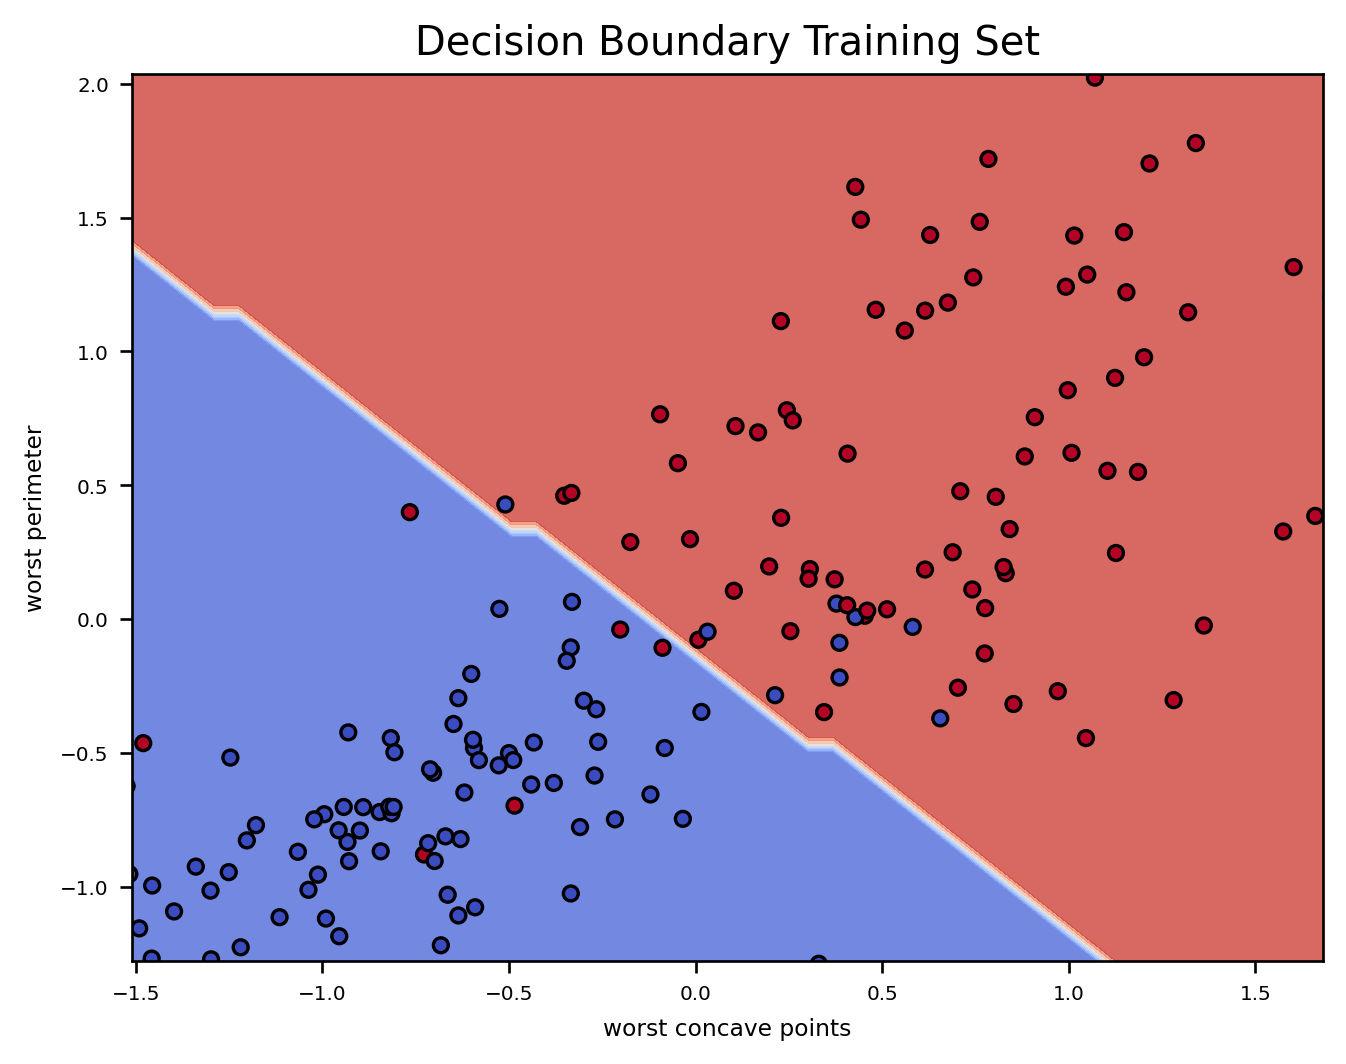

In [36]:
decion_boundary(feature0,feature1,"worst concave points", "worst perimeter", X_train,y_train,'Training Set')

<Figure size 240x240 with 0 Axes>

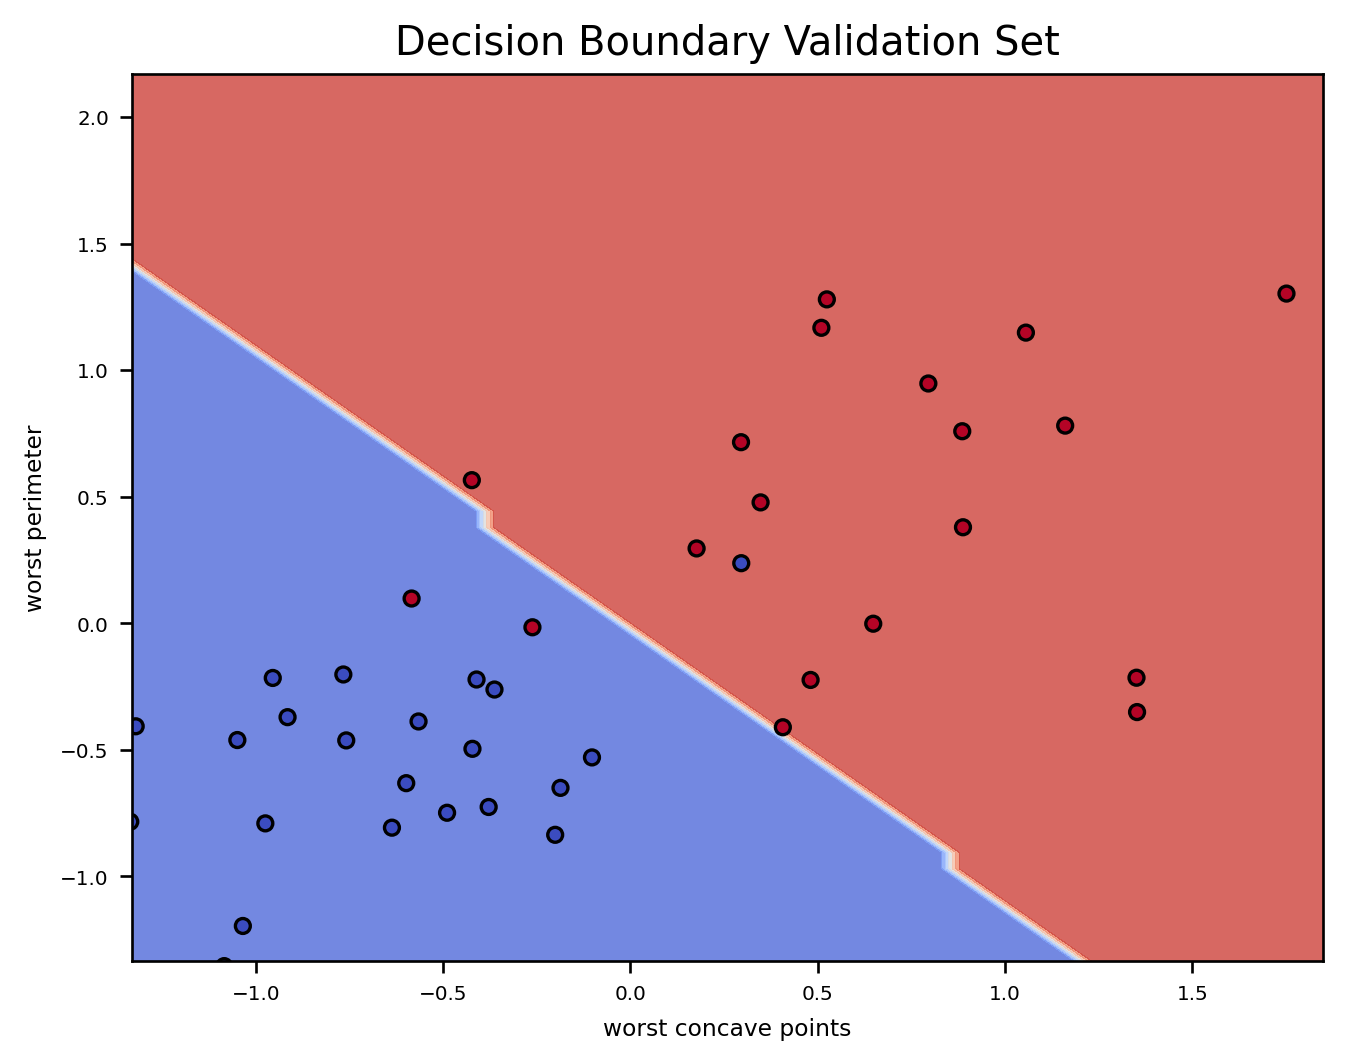

In [37]:
decion_boundary(feature0,feature1,"worst concave points", "worst perimeter", X_val,y_val, 'Validation Set')

<Figure size 240x240 with 0 Axes>

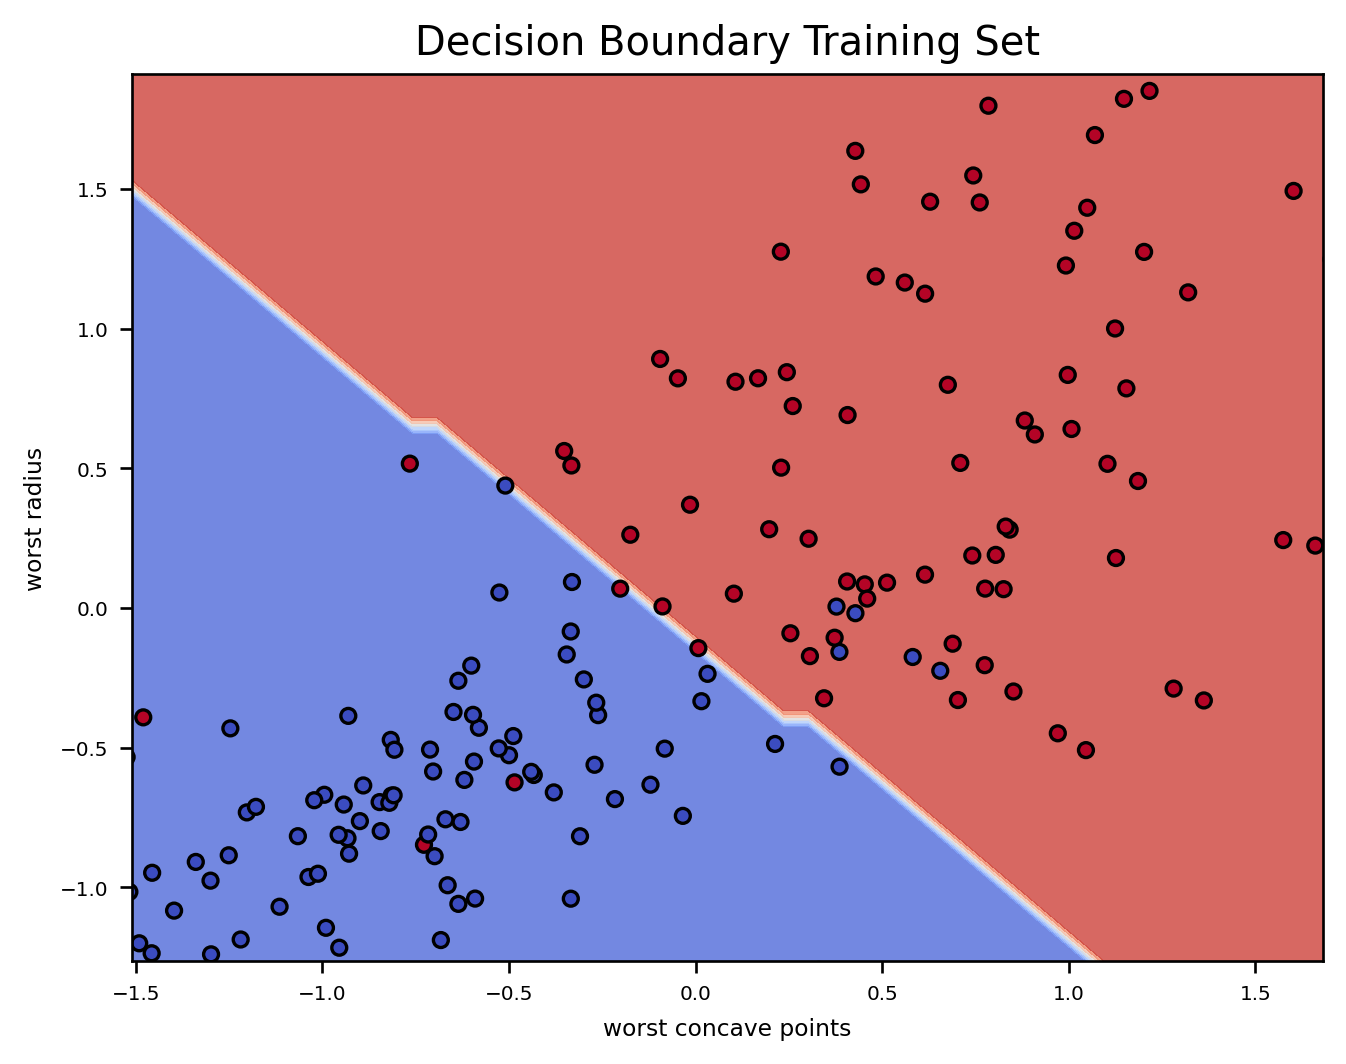

In [38]:
decion_boundary(feature0,feature2,"worst concave points", "worst radius", X_train, y_train, "Training Set")

<Figure size 240x240 with 0 Axes>

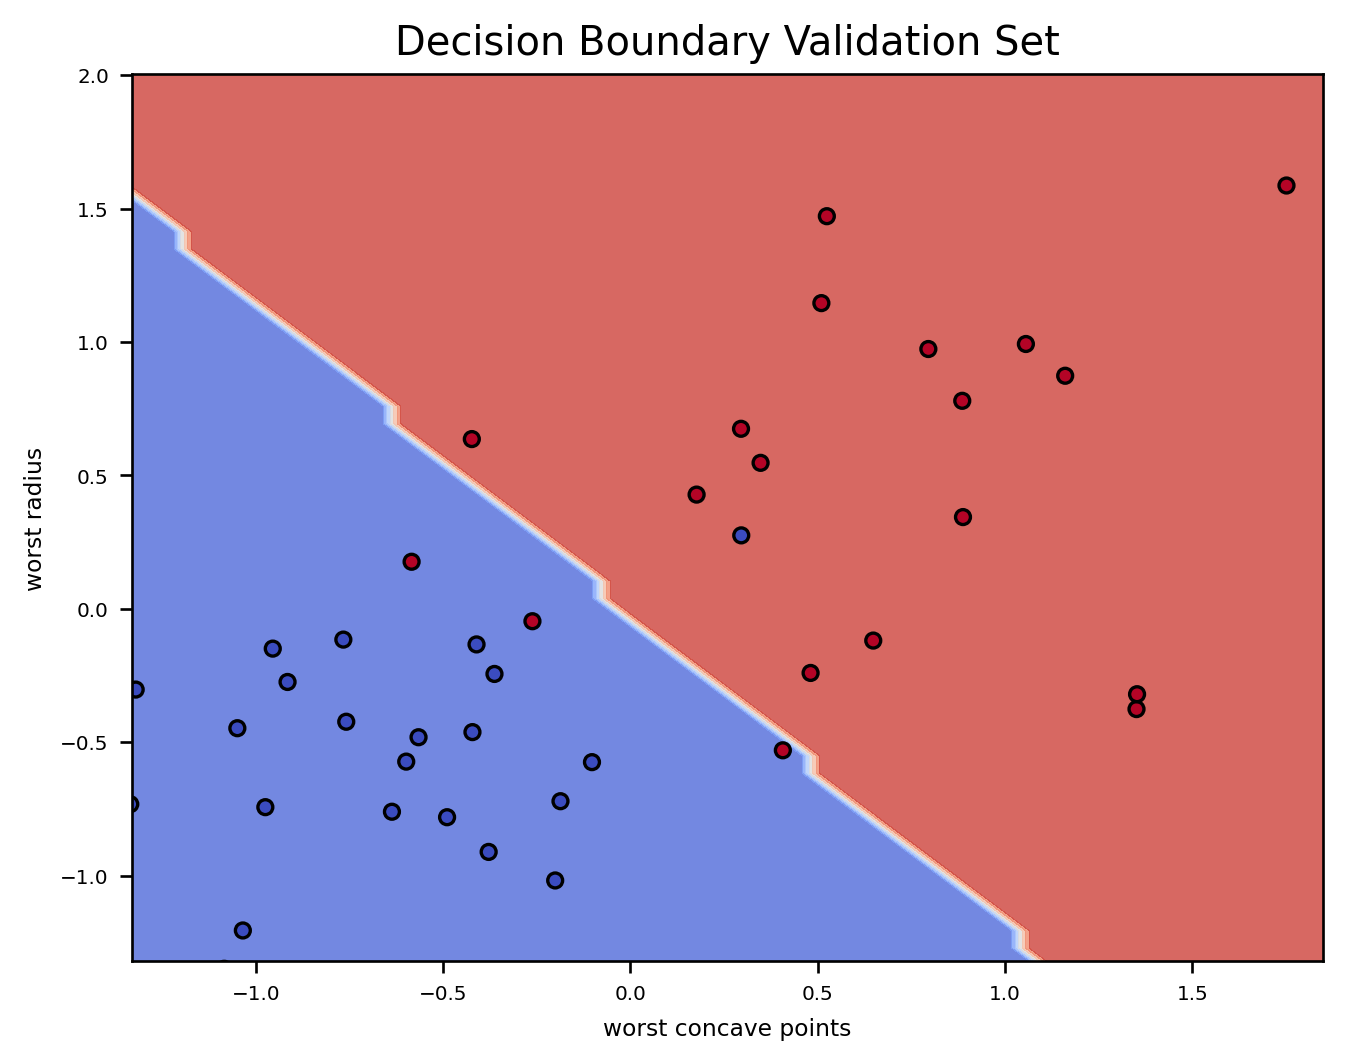

In [39]:
decion_boundary(feature0,feature2,"worst concave points", "worst radius", X_val, y_val, "Validation Set")

<Figure size 240x240 with 0 Axes>

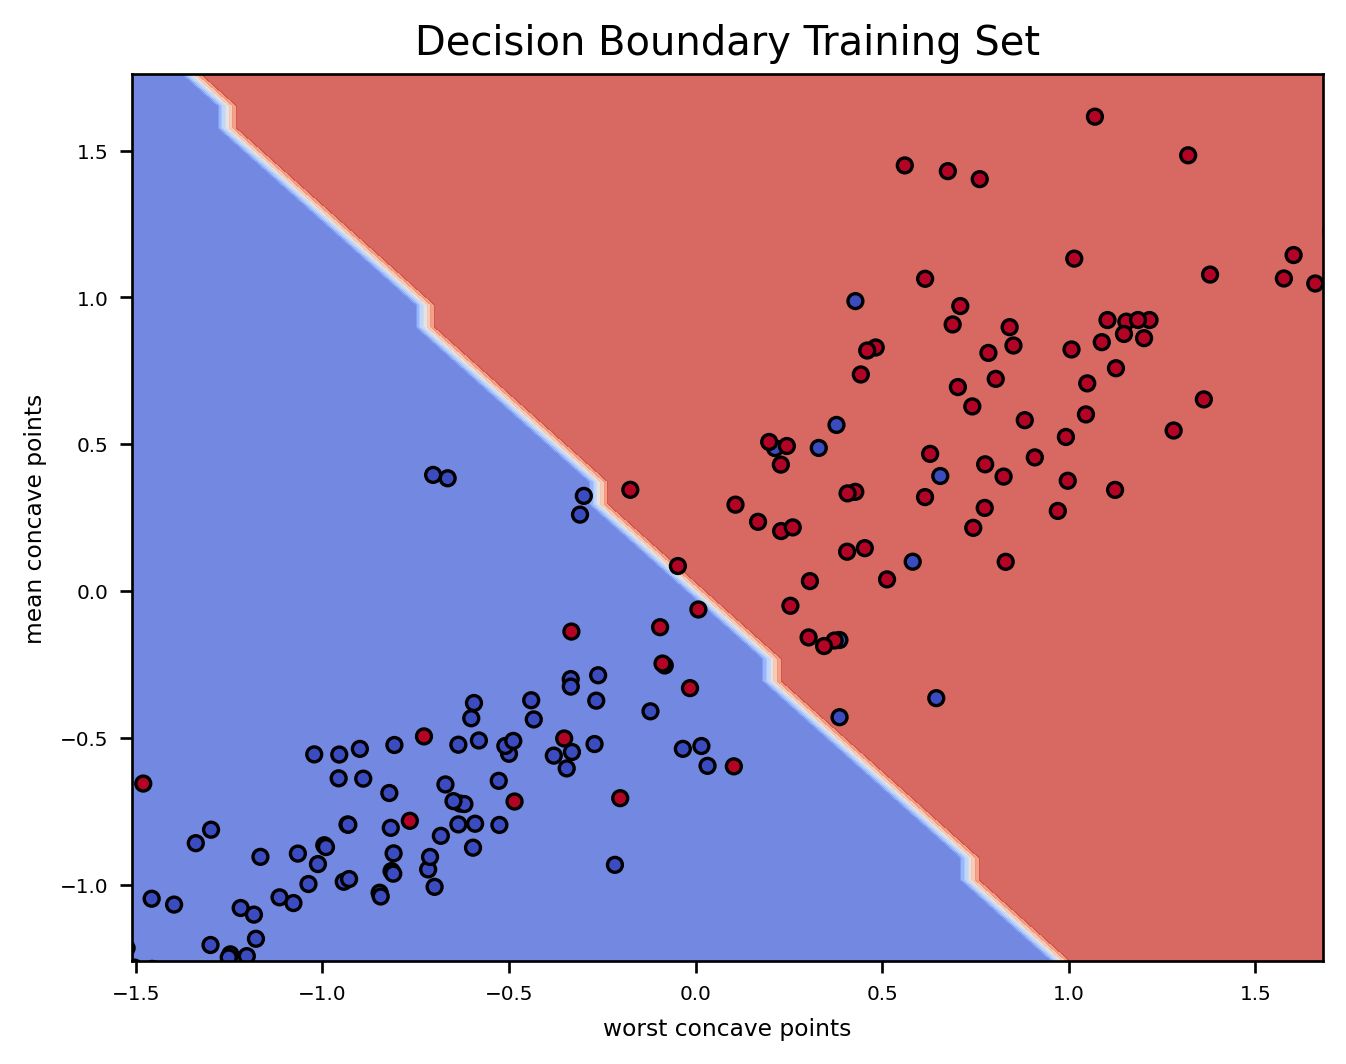

In [40]:
decion_boundary(feature0,feature3,"worst concave points", "mean concave points",X_train, y_train, "Training Set" )

<Figure size 240x240 with 0 Axes>

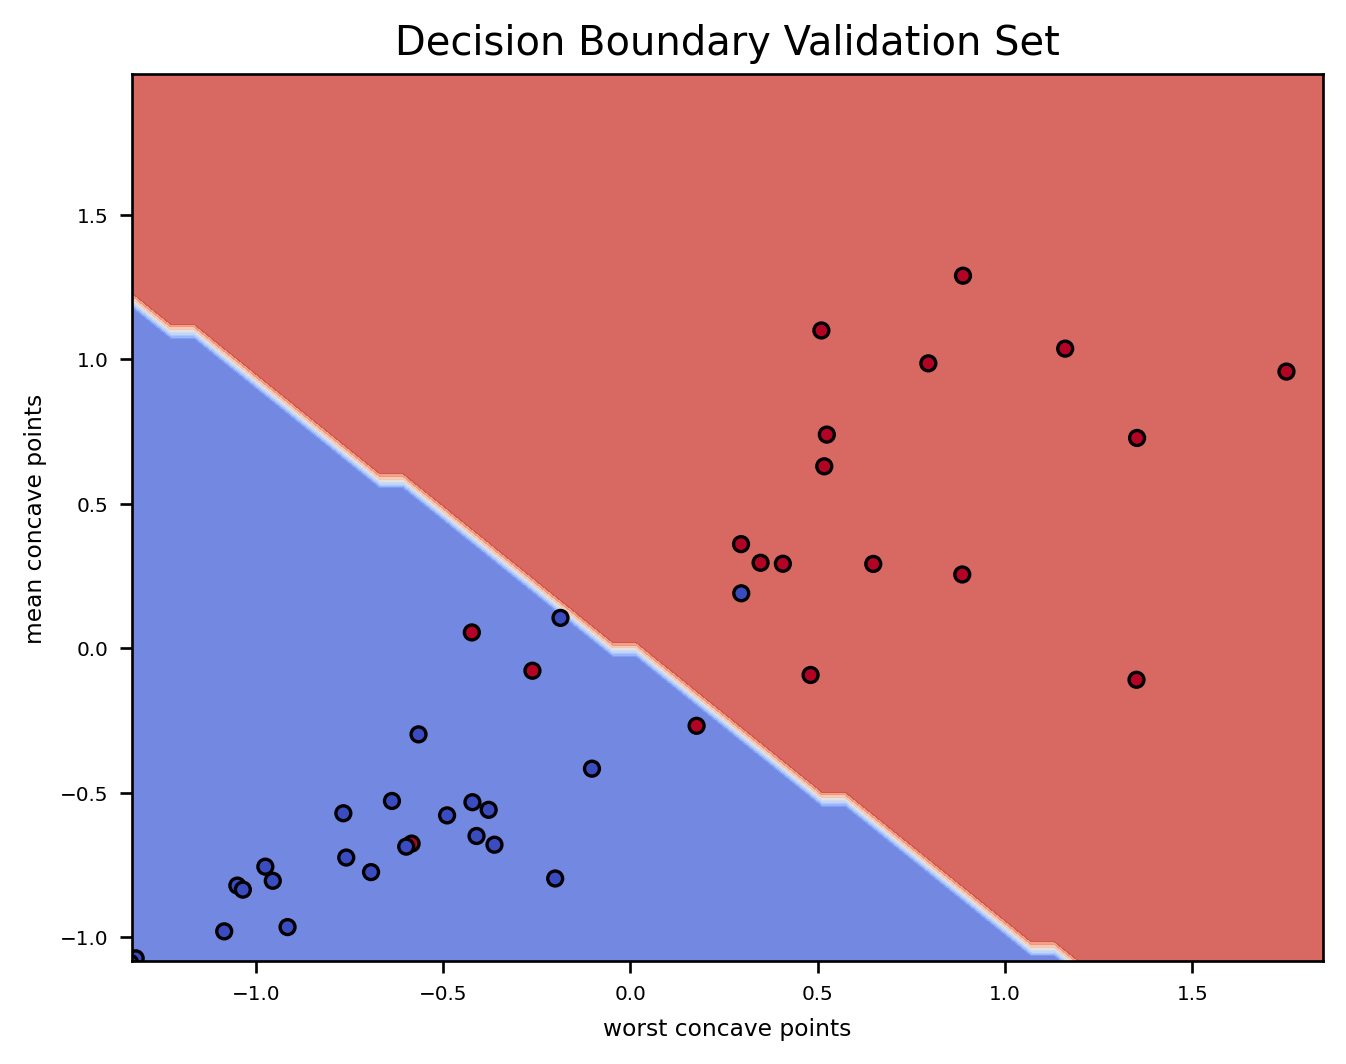

In [41]:
decion_boundary(feature0,feature3,"worst concave points", "mean concave points",X_val, y_val, "Validation Set" )

<Figure size 240x240 with 0 Axes>

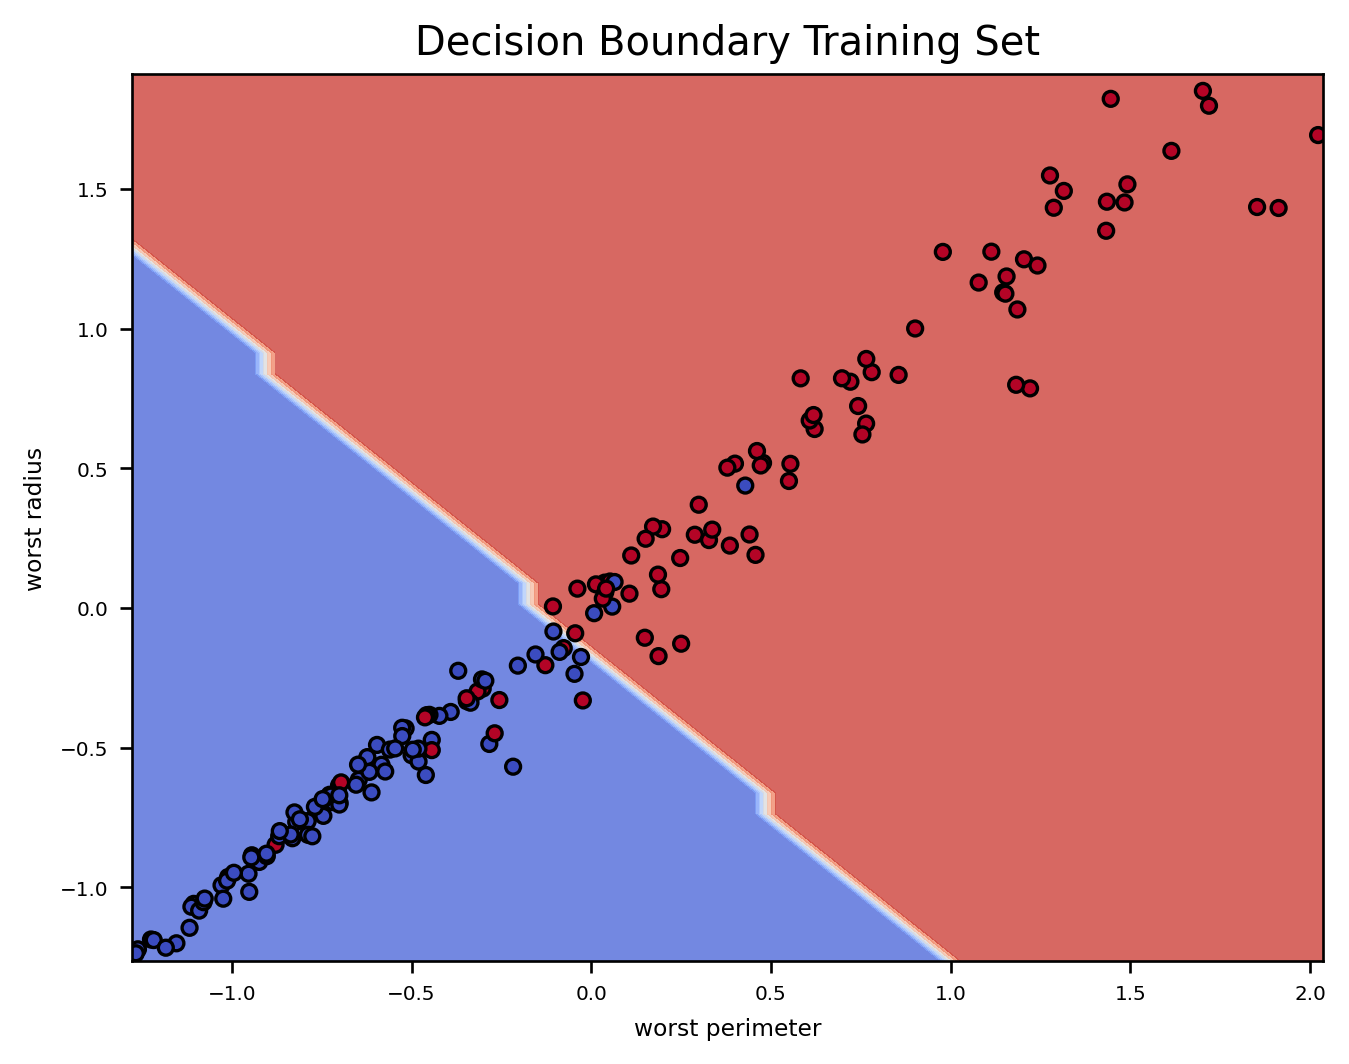

In [42]:
decion_boundary(feature1,feature2,"worst perimeter", "worst radius", X_train, y_train,'Training Set')

<Figure size 240x240 with 0 Axes>

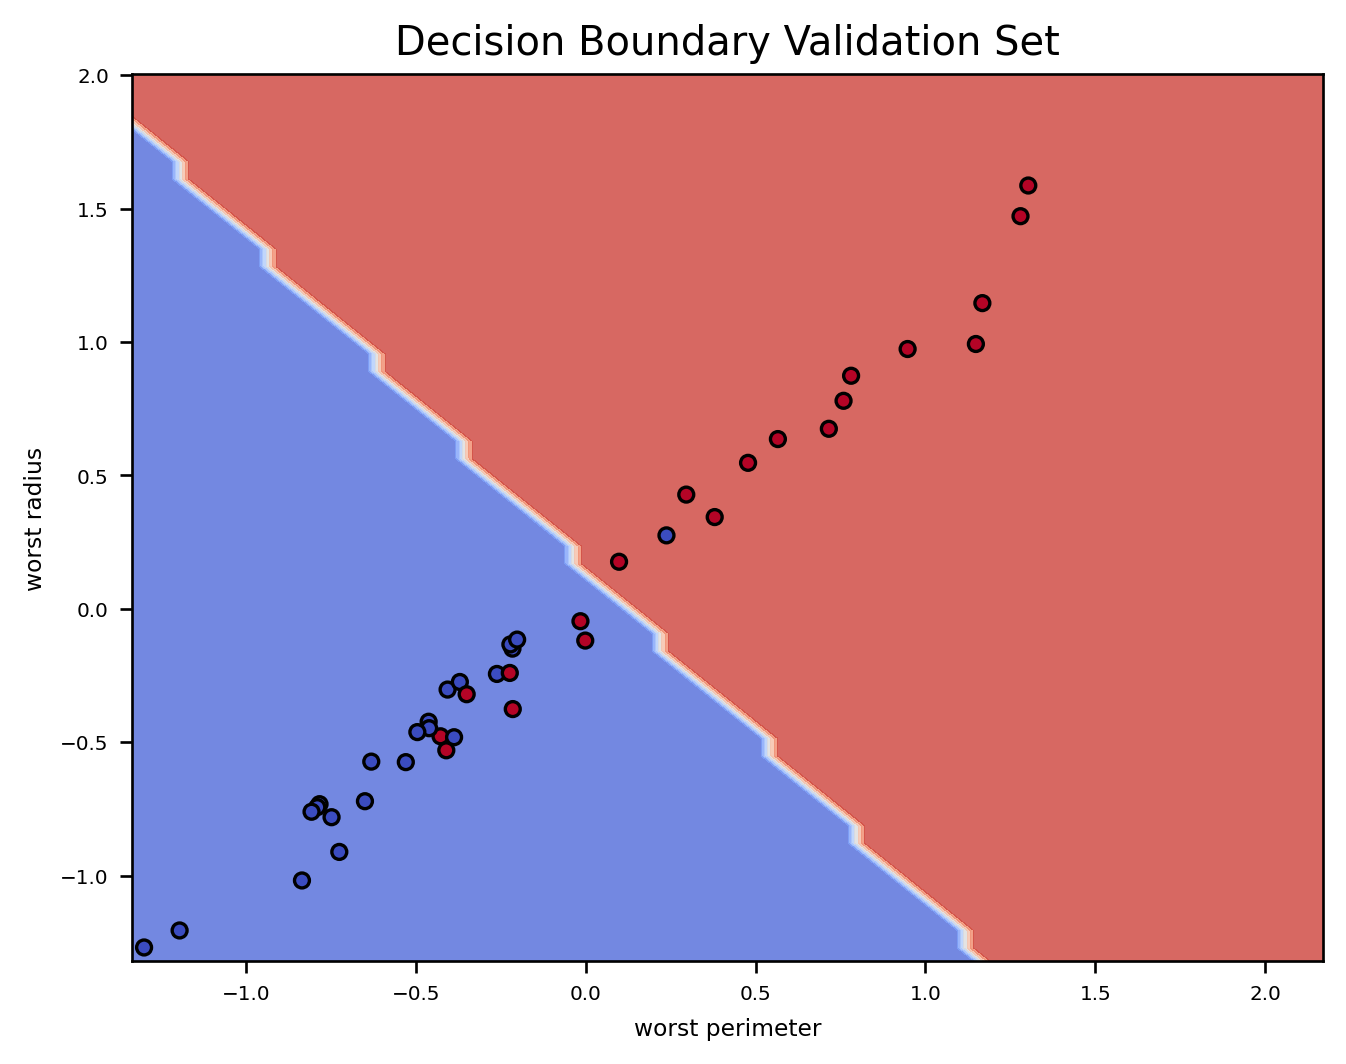

In [43]:
decion_boundary(feature1,feature2,"worst perimeter", "worst radius", X_val, y_val,'Validation Set')

<Figure size 240x240 with 0 Axes>

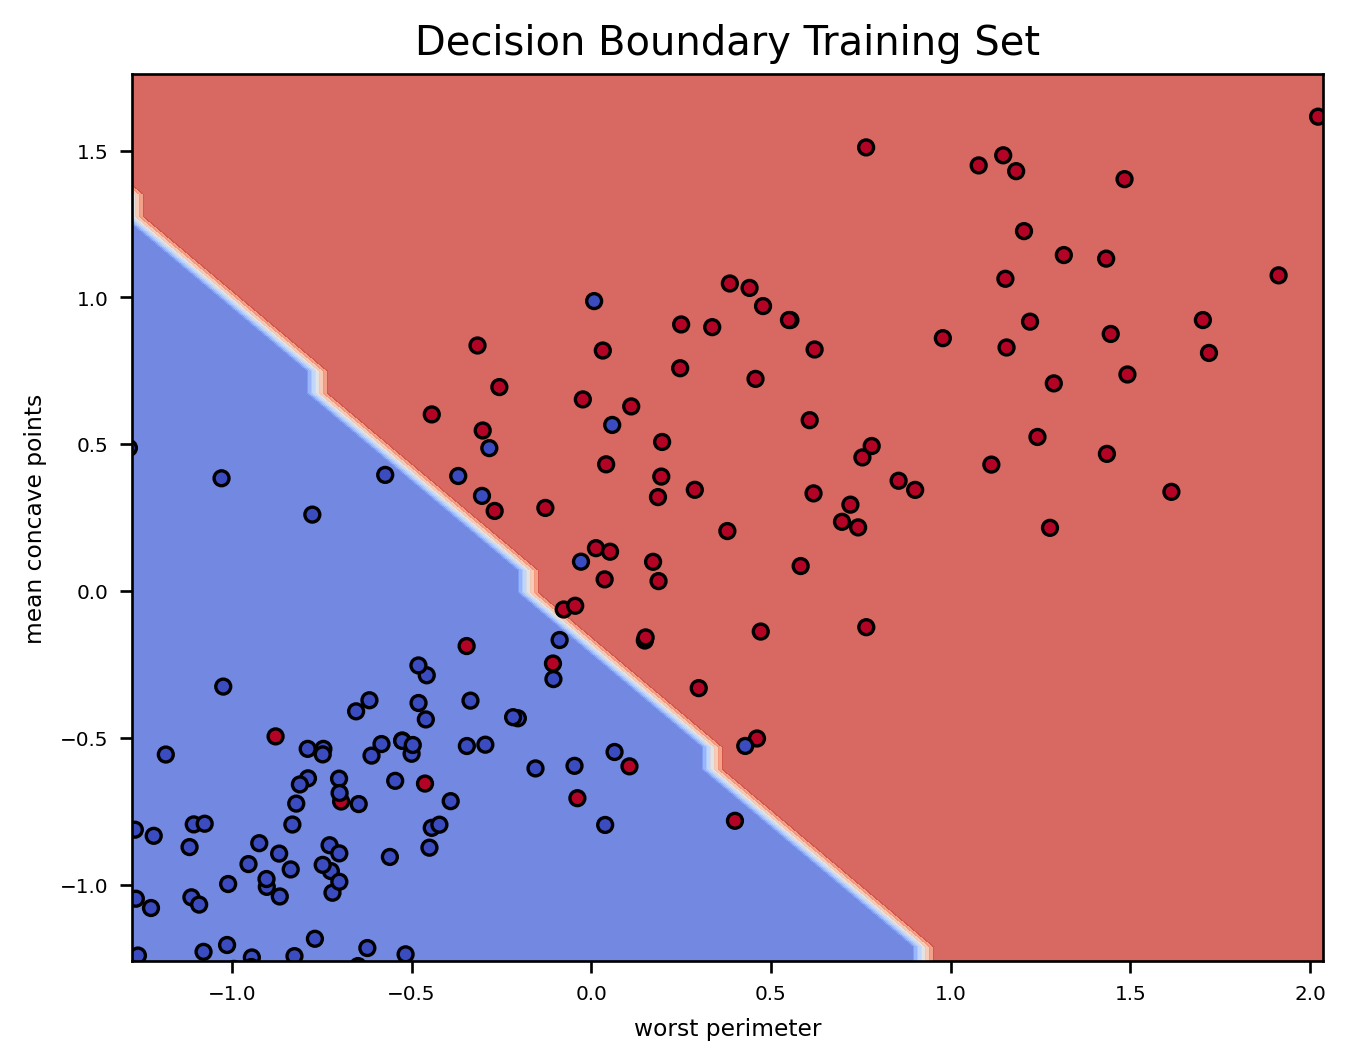

In [44]:
decion_boundary(feature1,feature3,"worst perimeter", "mean concave points", X_train, y_train, "Training Set")

<Figure size 240x240 with 0 Axes>

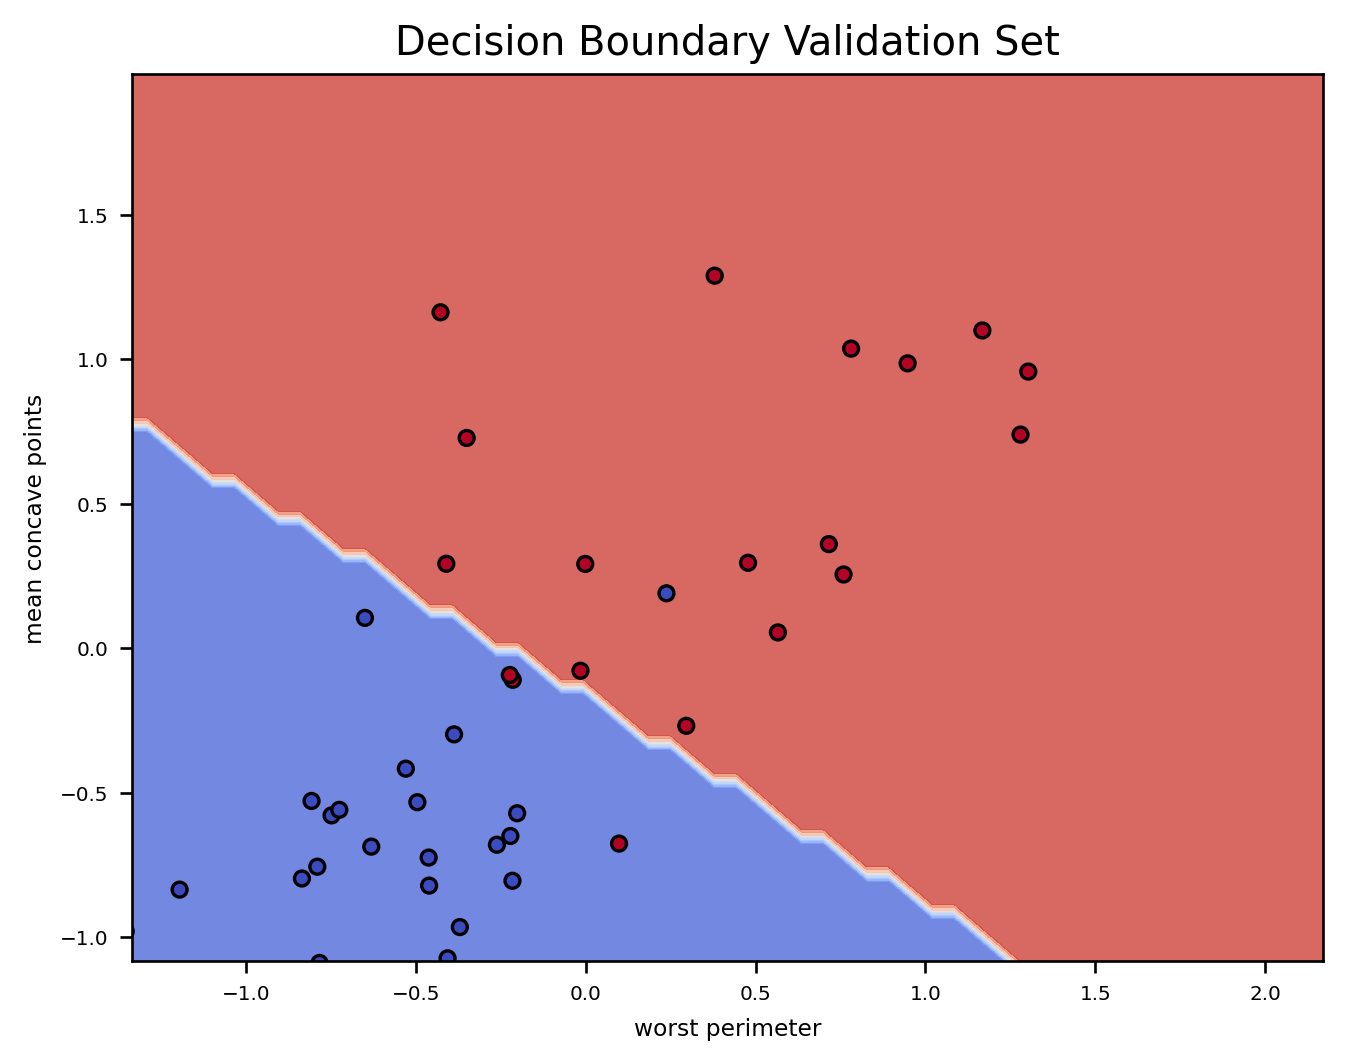

In [45]:
decion_boundary(feature1,feature3,"worst perimeter", "mean concave points", X_val, y_val, "Validation Set")

<Figure size 240x240 with 0 Axes>

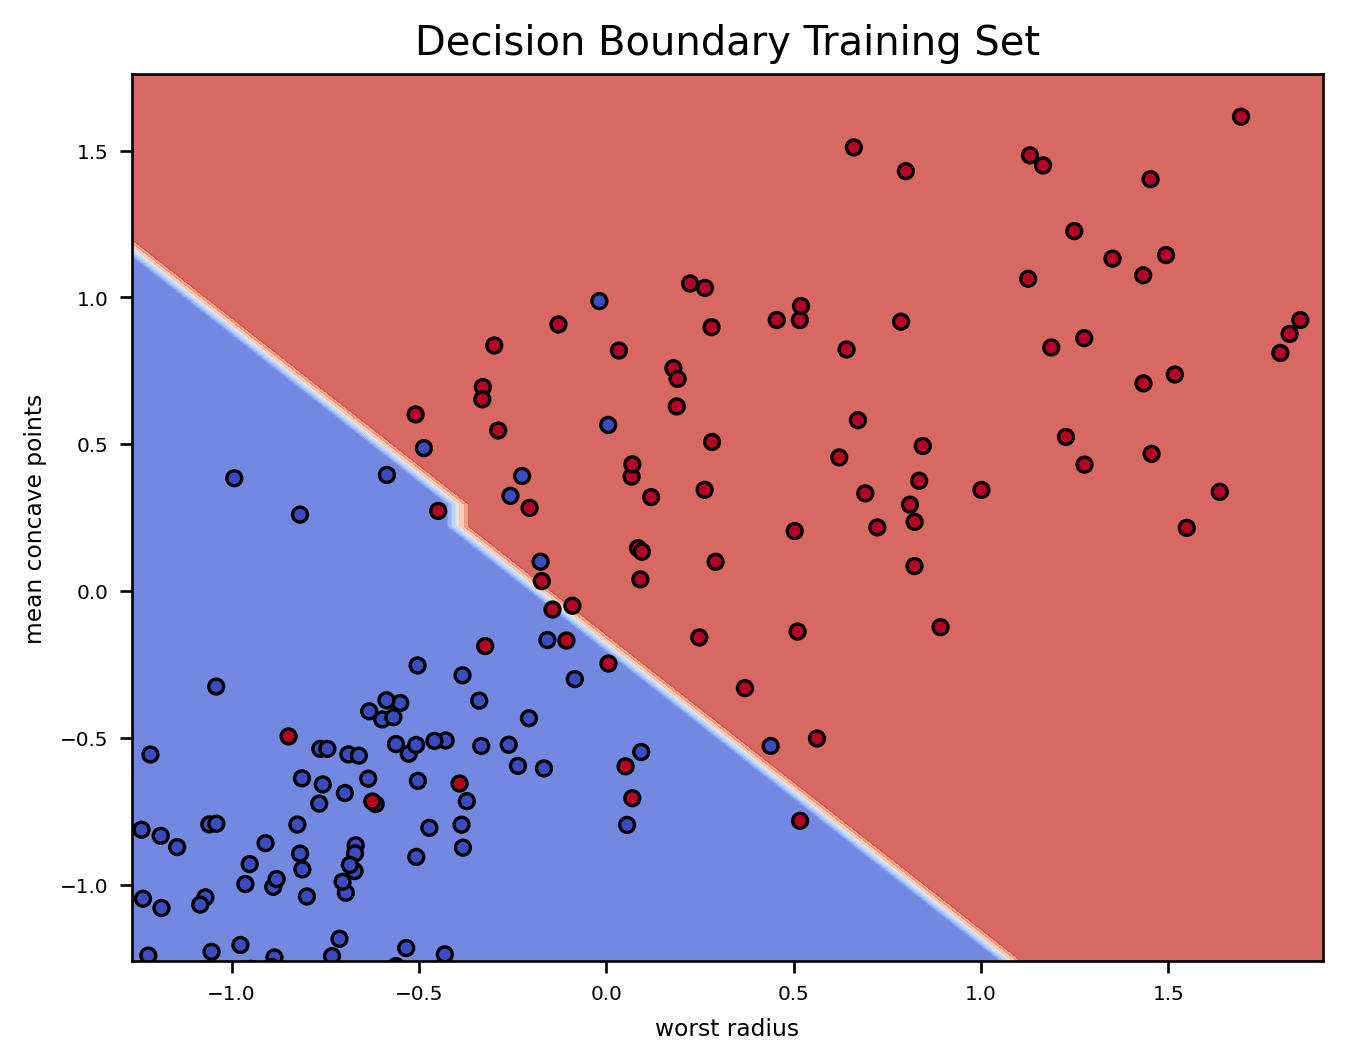

In [46]:
decion_boundary(feature2,feature3,"worst radius", "mean concave points", X_train, y_train, "Training Set")

<Figure size 240x240 with 0 Axes>

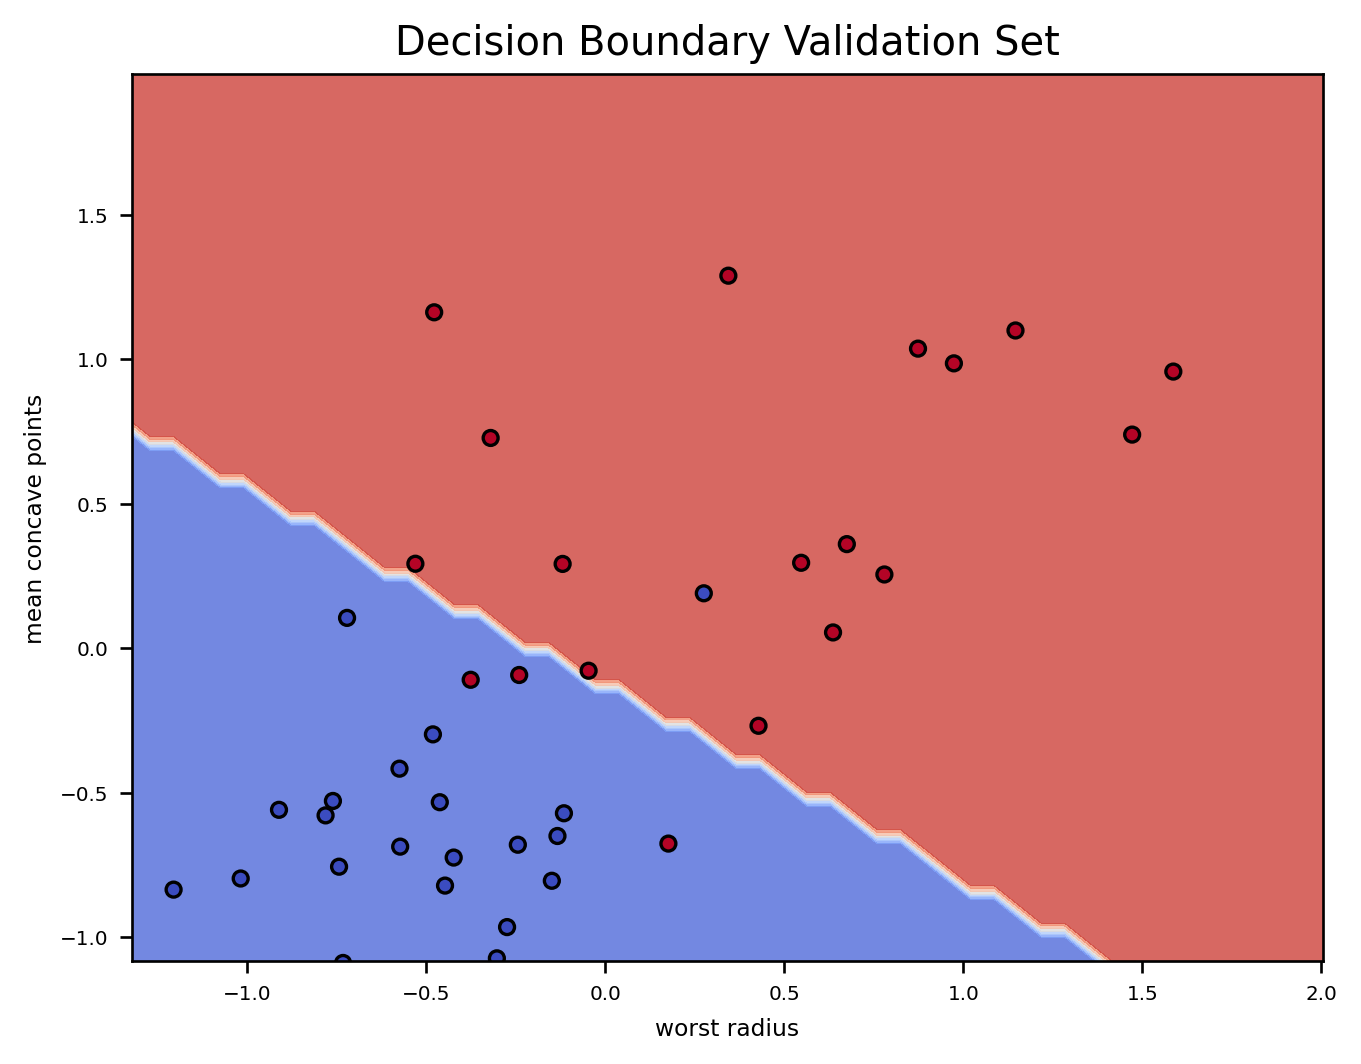

In [47]:
decion_boundary(feature2,feature3,"worst radius", "mean concave points", X_val, y_val, "Validation Set")

### 3.3 Interpretation [1 mark]

From the decision boundaries displayed above, **would you expect the method to extrapolate well or not**?  Give reasons for your answer.

# Your answer here
Yes, because the distribution of the observed data is representative of the distribution of the unseen (future/predicted) data and there are fewer noises in the decision boundaries displayed. Therefore, the method is more likely to extrapolate well.

## 4. Second Round (15% = 4.5 marks)

After presenting your initial results to the client they come back to you and say that they have done some financial analysis and it would save them a lot of time and money if they did not have to analyse every cell, which is needed to get the "worst" features. Instead, they can quickly get accurate estimates for the "mean" and "standard error" features from a much smaller, randomly selected set of cells.

They ask you to **give them a performance estimate for the same problem, but without using any of the "worst" features.**



### 4.1 New estimate [3.5 marks]

**Calculate an unbiased performance estimate** for this new problem, as requested by the client.

In [48]:
# Your code here
worst_variables = [i for i in X_train.columns if 'worst'  in i]

X_train_not_worst  = X_train.drop(worst_variables, axis=1)
X_val_not_worst = X_val.drop(worst_variables, axis=1)
X_test_not_worst = X_test.drop(worst_variables, axis=1)


Metrics for SGD baseline
Balanced Accuracy: 0.8965217391304348
Recall: 0.9130434782608695
Precision: 0.875
AUC: 0.8965217391304349
F1 Score: 0.8936170212765957
F-beta Score (beta=0.1): 0.8753611225753198
F-beta Score (beta=10): 0.9126506024096385



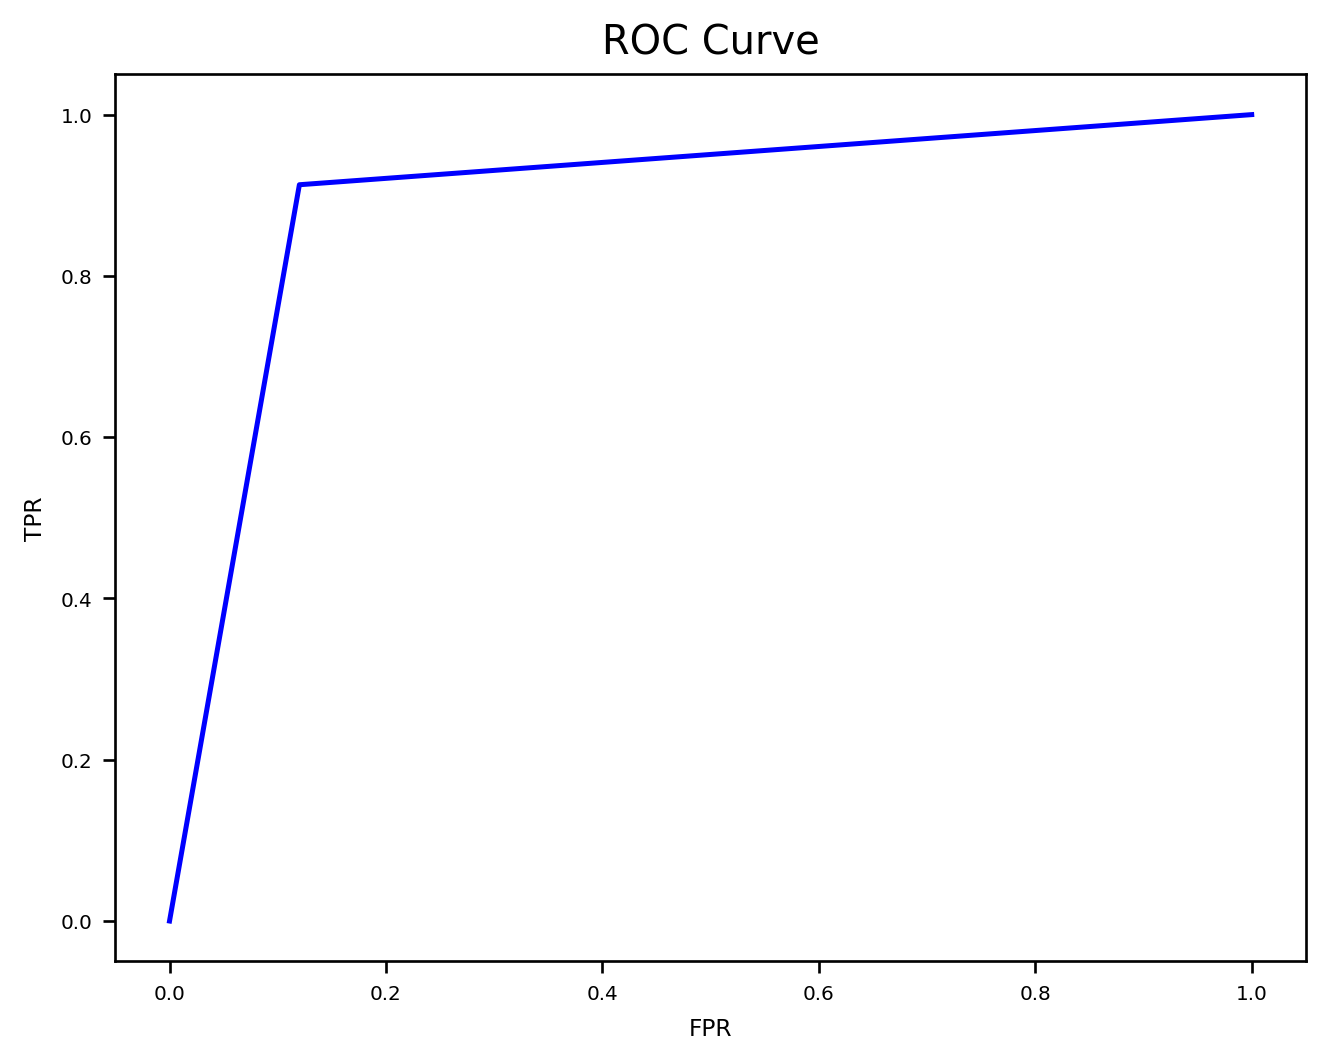

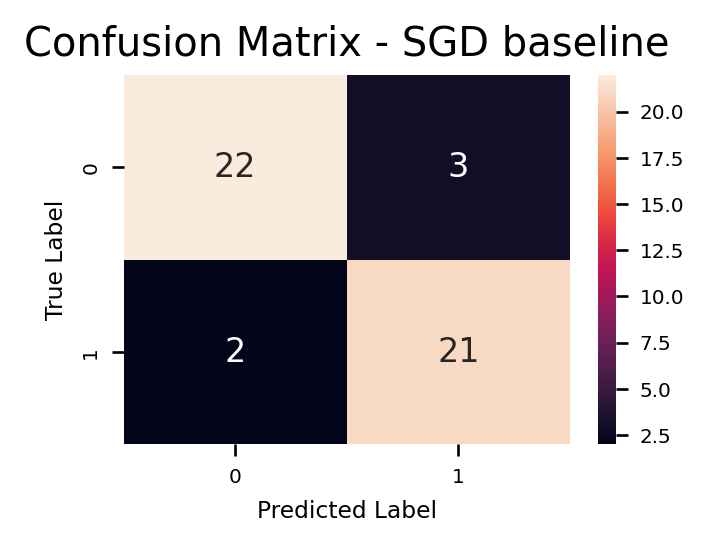

In [49]:
sgd_pl = Pipeline([ ('preproc',preproc_pl), ('sgd',SGDClassifier(random_state=42))])
sgd_pl.fit(X_train_not_worst, y_train)
y_val_pred_not_worst = sgd_pl.predict(X_val_not_worst)

caculate_metrics(y_val, y_val_pred_not_worst, "SGD baseline")

KNN Best score: 0.9752419609400457
KNN Best params: {'knn__n_neighbors': 6, 'knn__weights': 'distance'}
Metrics for KNN
Balanced Accuracy: 0.9365217391304348
Recall: 0.9130434782608695
Precision: 0.9545454545454546
AUC: 0.9365217391304348
F1 Score: 0.9333333333333332
F-beta Score (beta=0.1): 0.9541160593792173
F-beta Score (beta=10): 0.9134366925064599



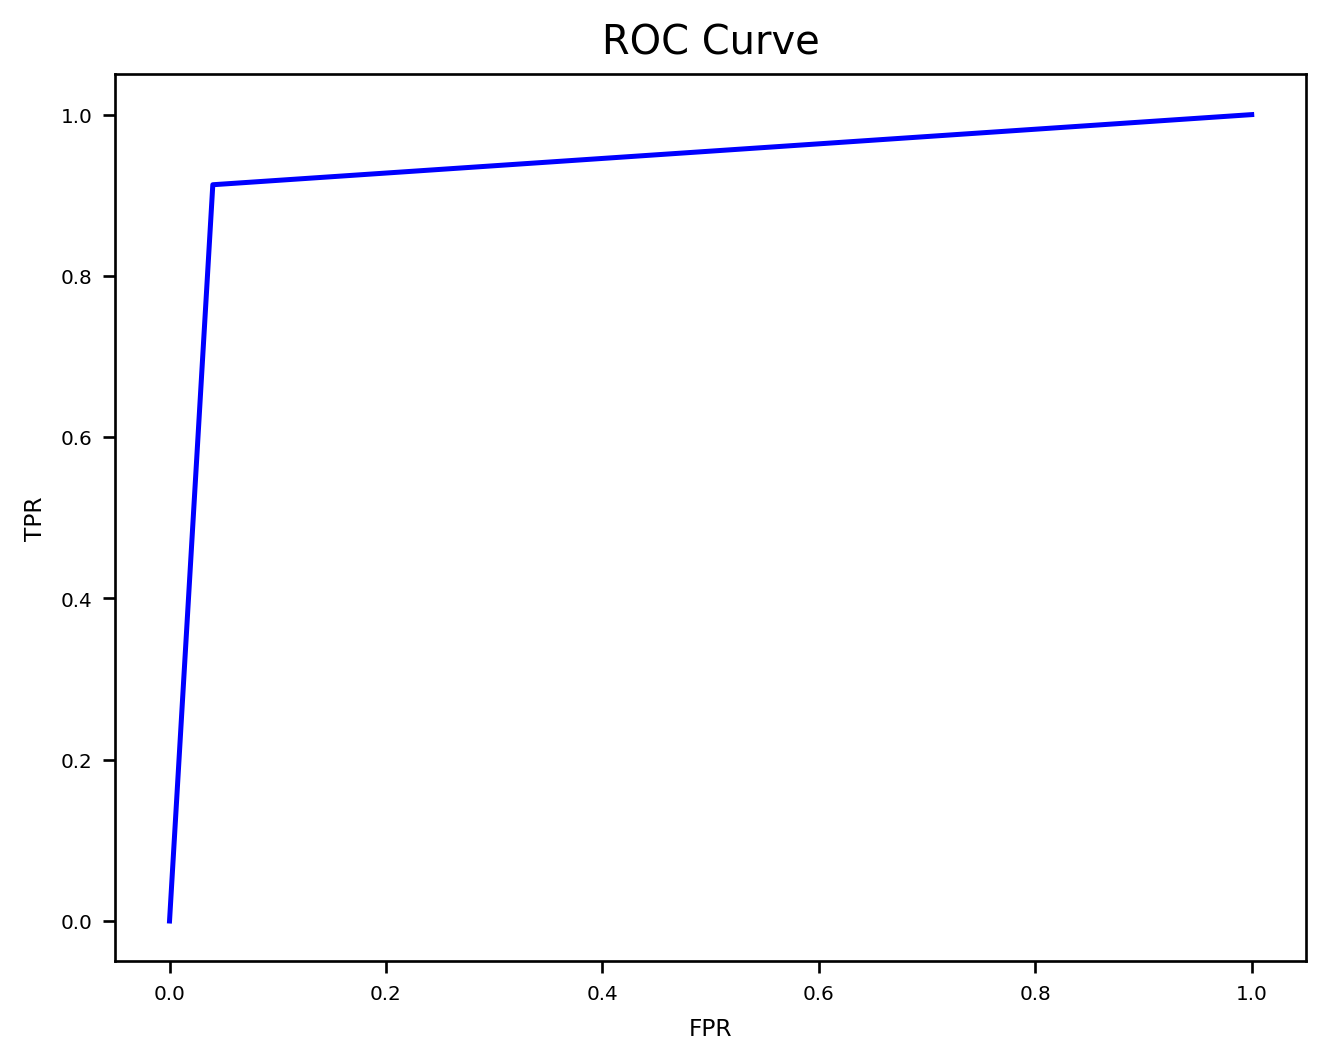

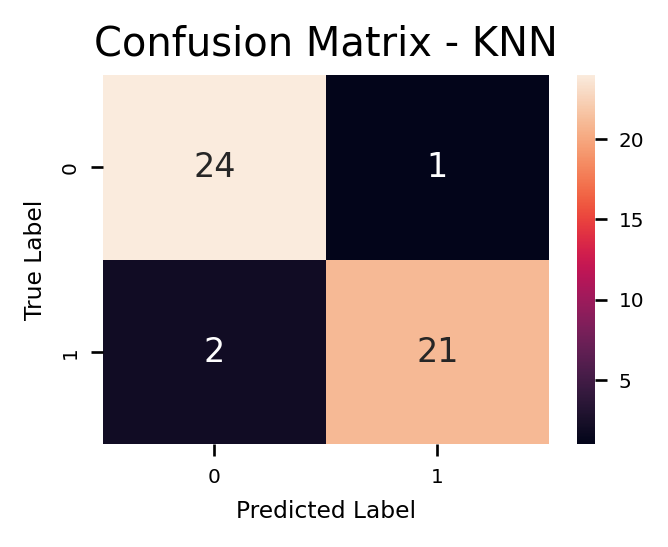

Decision Tree Best score: 0.9275321575126263
Decision Tree Best params: {'tree__max_depth': 50, 'tree__min_samples_leaf': 8, 'tree__min_samples_split': 2}
Metrics for Decison Tree
Balanced Accuracy: 0.8930434782608696
Recall: 0.8260869565217391
Precision: 0.95
AUC: 0.8930434782608696
F1 Score: 0.8837209302325583
F-beta Score (beta=0.1): 0.9485912011863569
F-beta Score (beta=10): 0.827155172413793



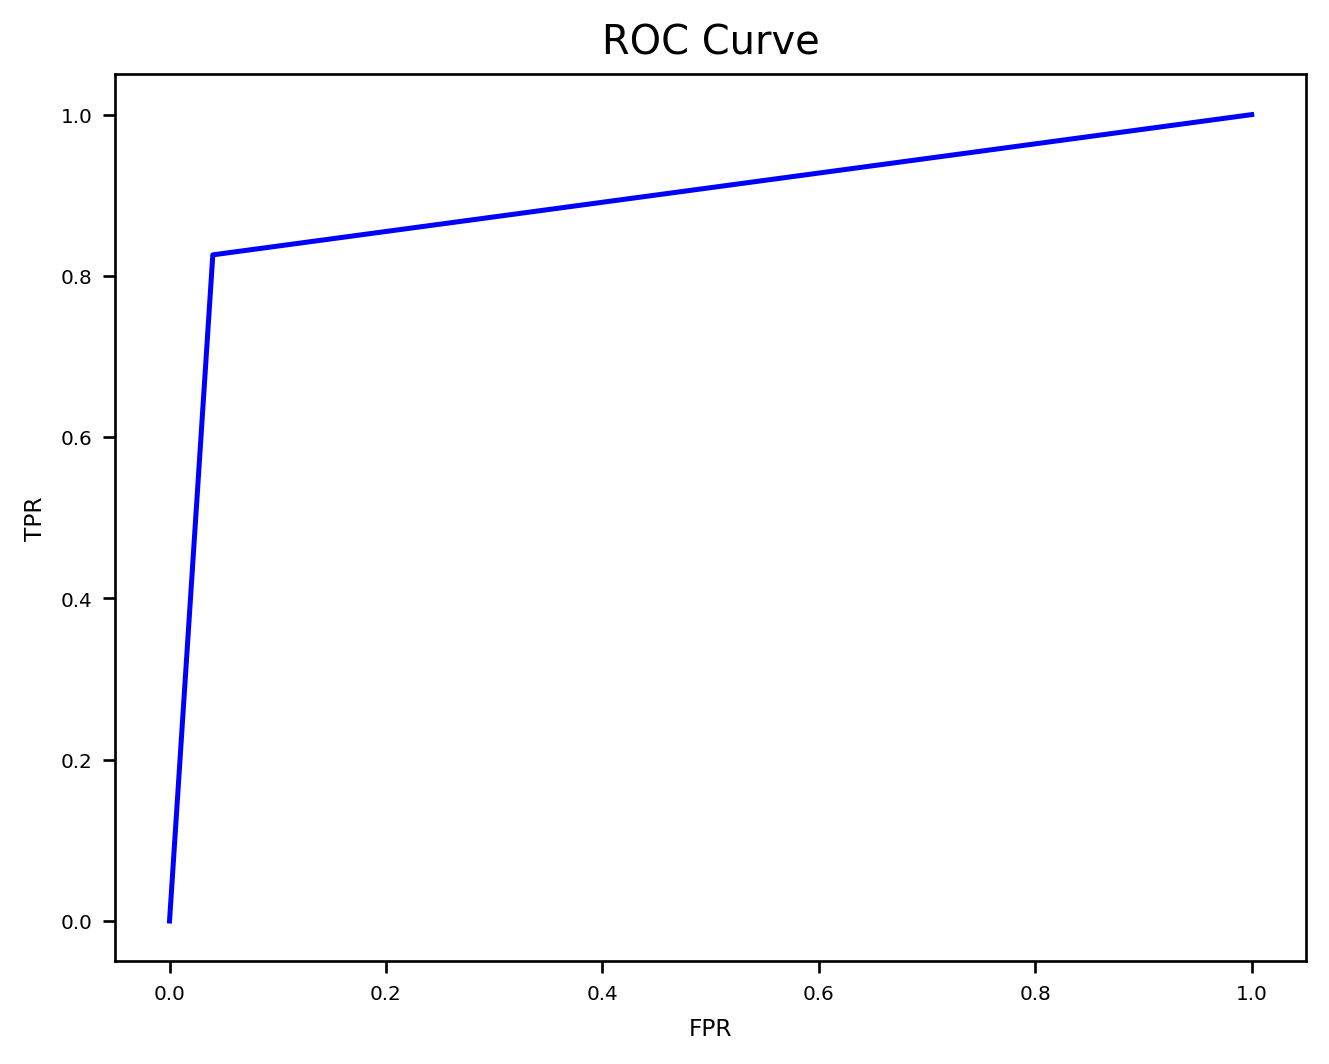

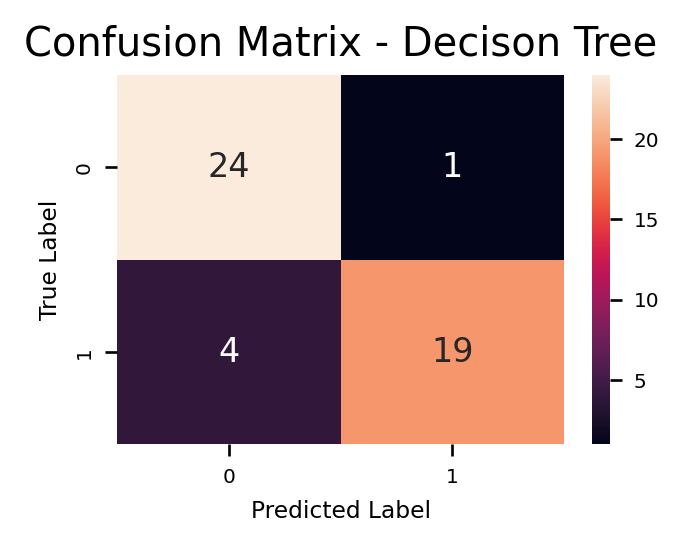

SVM Best score: 0.9820817168662431
SVM Best params: {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
Metrics for SVM
Balanced Accuracy: 0.9165217391304348
Recall: 0.9130434782608695
Precision: 0.9130434782608695
AUC: 0.9165217391304349
F1 Score: 0.9130434782608695
F-beta Score (beta=0.1): 0.9130434782608695
F-beta Score (beta=10): 0.9130434782608694



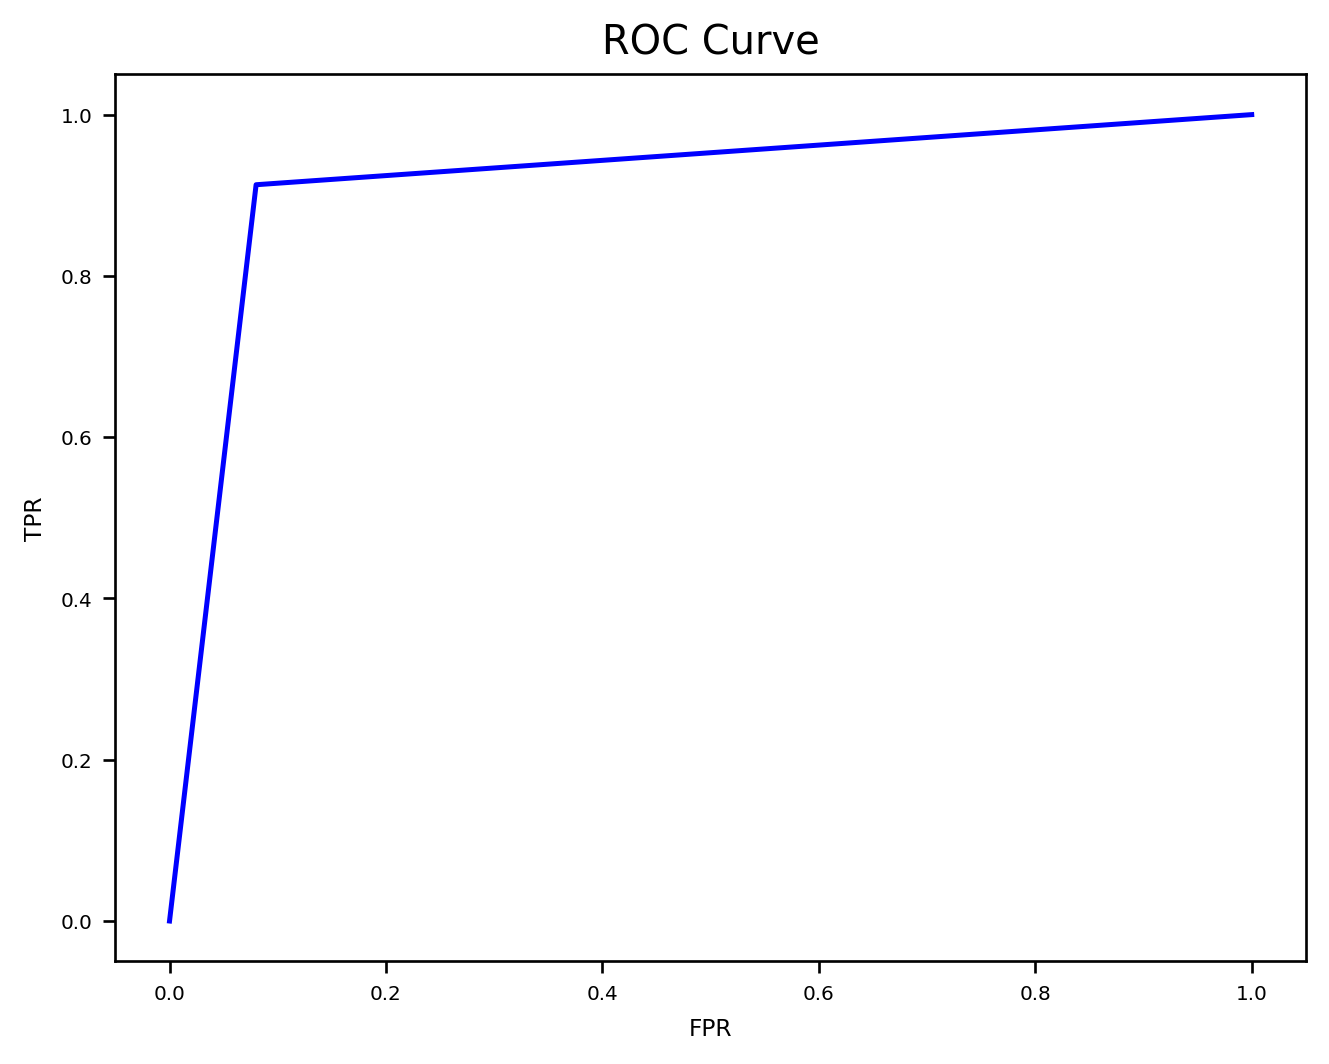

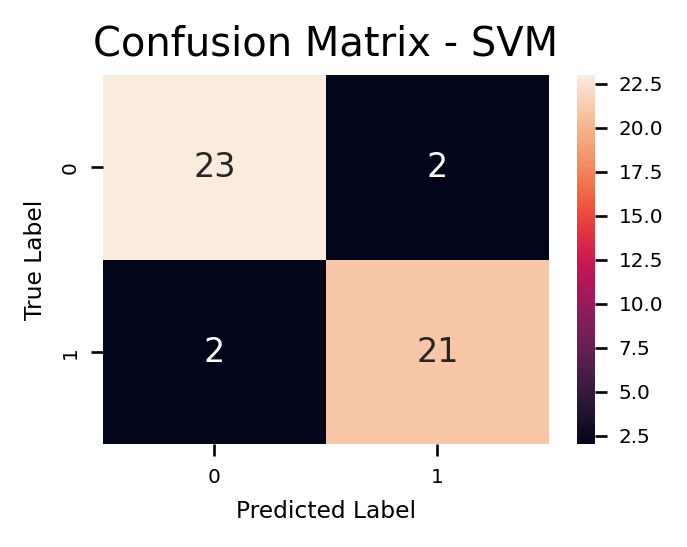

SGDC Best score: 0.9814313116039427
SGDC Best params: {'SGDC__alpha': 0.1, 'SGDC__early_stopping': True, 'SGDC__eta0': 0.1, 'SGDC__learning_rate': 'constant', 'SGDC__penalty': 'l2', 'SGDC__random_state': 5}
Metrics for SGDC
Balanced Accuracy: 0.8947826086956522
Recall: 0.8695652173913043
Precision: 0.9090909090909091
AUC: 0.8947826086956522
F1 Score: 0.888888888888889
F-beta Score (beta=0.1): 0.9086819613135404
F-beta Score (beta=10): 0.8699397071490096



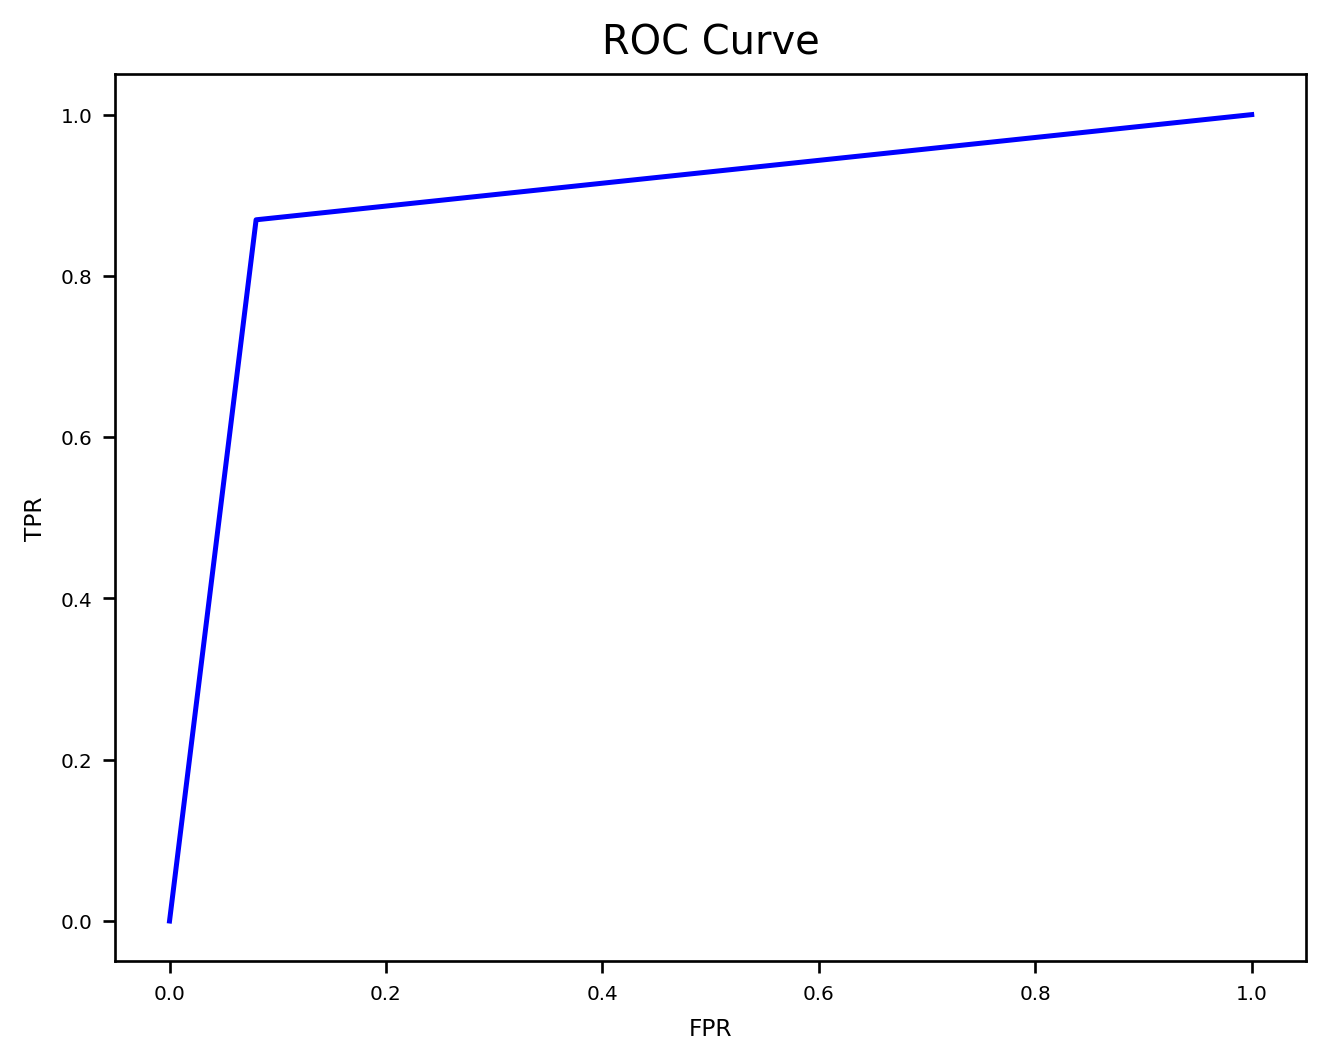

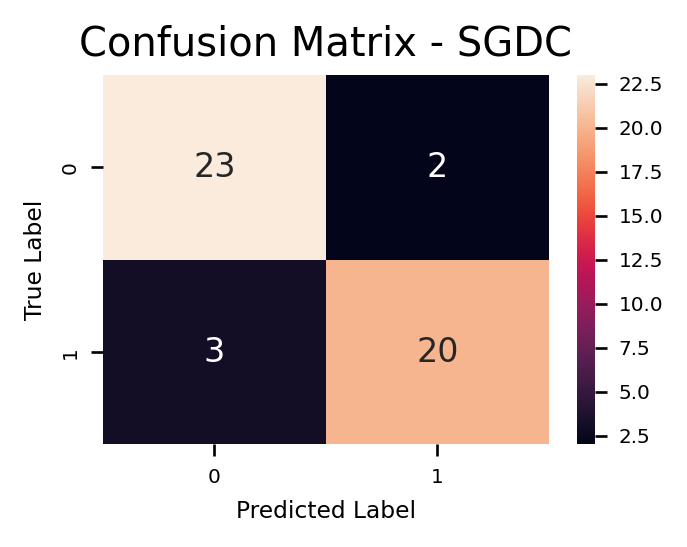

In [50]:
#KNN
knn_clf =  Pipeline([ ('preproc',preproc_pl), ('knn',KNeighborsClassifier(n_neighbors=10)) ])  

knn_param = {'knn__n_neighbors':[4,5,6,7,8,9,10,14,15,20,25],
             'knn__weights':['uniform','distance']}
knn_grid = GridSearchCV(estimator=knn_clf,
                        param_grid=knn_param,
                        cv=3, error_score='raise',
                        scoring='roc_auc',
                        n_jobs=-1).fit(X_train_not_worst,y_train)
knn_grid.best_estimator_.fit(X_train_not_worst,y_train)
knn_y_val_pred = knn_grid.best_estimator_.predict(X_val_not_worst)

#Decison Tree
tree_clf = Pipeline([ ('preproc',preproc_pl), ('tree', DecisionTreeClassifier(max_depth = 10, random_state=42)) ]) 

tree_param = {'tree__max_depth':[50,70,20,10],
              'tree__min_samples_split':[2,4,8],
              'tree__min_samples_leaf':[2,4,8]}
tree_grid = GridSearchCV(estimator=tree_clf,
                         cv=3,
                         scoring='roc_auc',
                         error_score='raise',
                         n_jobs=-1,
                         param_grid=tree_param).fit(X_train_not_worst,y_train)
tree_grid.best_estimator_.fit(X_train_not_worst,y_train)
tree_y_val_pred = tree_grid.best_estimator_.predict(X_val_not_worst)

#SVM
SVM_model = Pipeline([ ('preproc',preproc_pl), ('SVM', SVC(random_state=42)) ]) 

SVM_param = {"SVM__C":[1,10,100,1000],
             'SVM__kernel':['linear', 'rbf','sigmoid'], 
             'SVM__gamma':[0.1,1,10]}
grid_SVM = GridSearchCV(estimator=SVM_model, 
                        param_grid=SVM_param,
                        cv=3,
                        error_score='raise',
                        scoring='roc_auc', 
                        n_jobs=-1).fit(X_train_not_worst,y_train)
grid_SVM.best_estimator_.fit(X_train_not_worst,y_train)
SVM_y_val_pred = grid_SVM.best_estimator_.predict(X_val_not_worst)

# SGD
SGDC_clf =  Pipeline([ ('preproc',preproc_pl), ('SGDC',SGDClassifier(random_state=42)) ])  

SGDC_params = {
    'SGDC__learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'], 
    'SGDC__eta0': [0.0001,0.001,0.01,0.1,1], 
    'SGDC__early_stopping': [False, True],
    'SGDC__random_state':[1,2,3,4,5],
    'SGDC__penalty':['l2', 'l1', 'elasticnet'],
    'SGDC__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

SGDC_grid = GridSearchCV(estimator=SGDC_clf,
                         param_grid=SGDC_params,
                         error_score='raise',
                         cv=3,scoring='roc_auc',
                         n_jobs=-1).fit(X_train_not_worst,y_train)
SGDC_grid.best_estimator_.fit(X_train_not_worst,y_train)
SGDC_y_val_pred = SGDC_grid.best_estimator_.predict(X_val_not_worst)

print("KNN Best score:", knn_grid.best_score_) 
print("KNN Best params:", knn_grid.best_params_) 
caculate_metrics(y_val, knn_y_val_pred, 'KNN')
print("======================================")

print("Decision Tree Best score:", tree_grid.best_score_) 
print("Decision Tree Best params:", tree_grid.best_params_) 
caculate_metrics(y_val, tree_y_val_pred,'Decison Tree')
print("======================================")


print("SVM Best score:", grid_SVM.best_score_) 
print("SVM Best params:", grid_SVM.best_params_) 
caculate_metrics(y_val, SVM_y_val_pred,'SVM')
print("======================================")


print("SGDC Best score:", SGDC_grid.best_score_) 
print("SGDC Best params:", SGDC_grid.best_params_) 
caculate_metrics(y_val, SGDC_y_val_pred,'SGDC')



Metrics for Final Performance
Balanced Accuracy: 0.9493882091212458
Recall: 0.9310344827586207
Precision: 0.9642857142857143
AUC: 0.9493882091212459
F1 Score: 0.9473684210526316
F-beta Score (beta=0.1): 0.9639448568398727
F-beta Score (beta=10): 0.9313524590163933



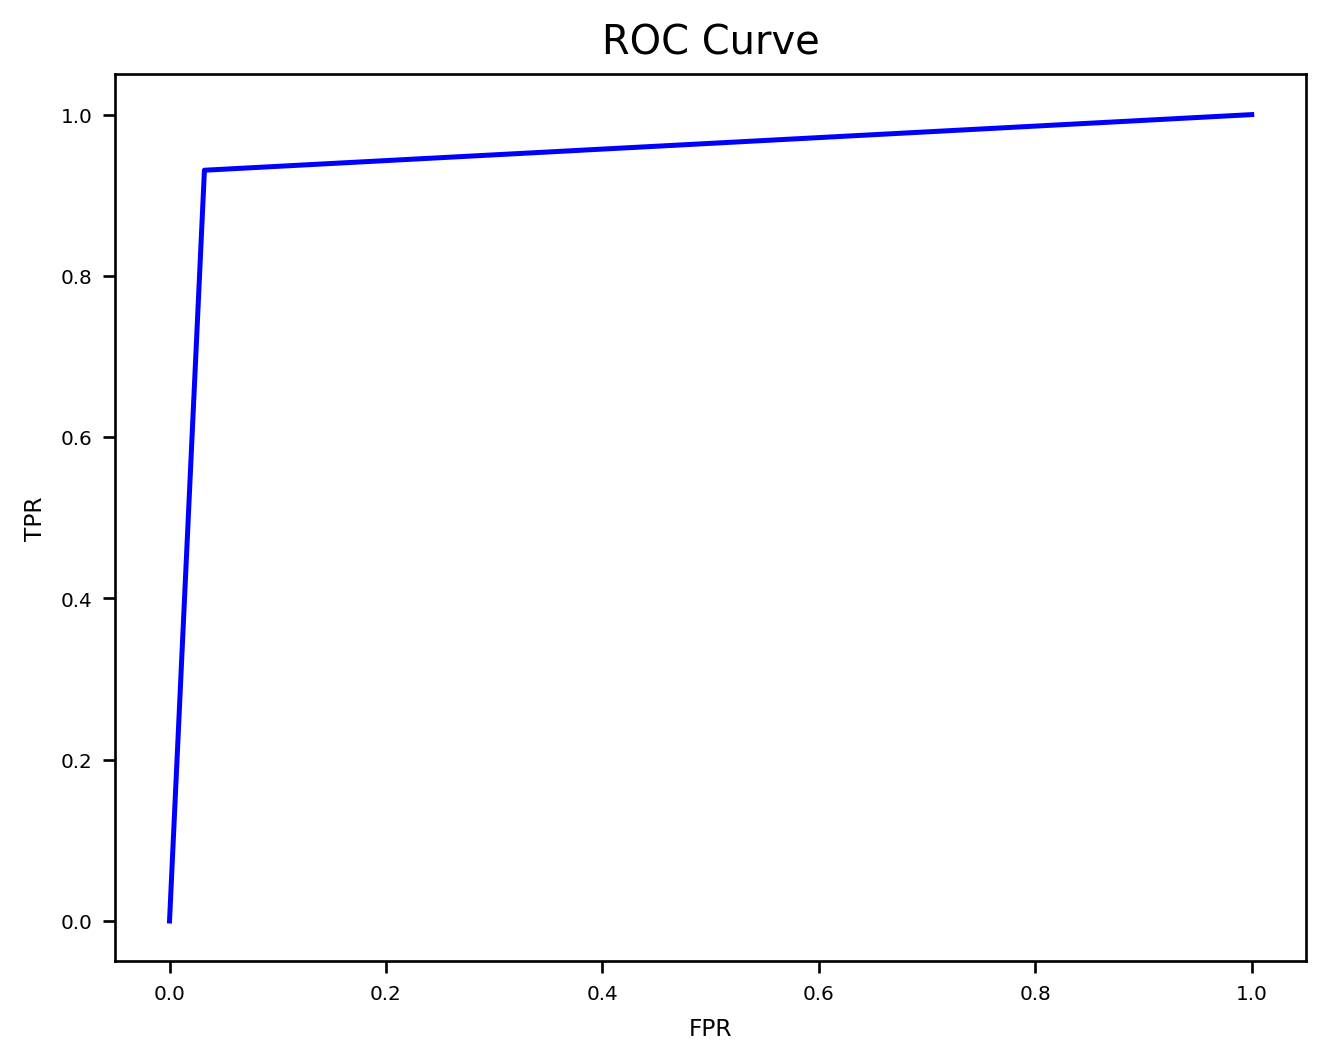

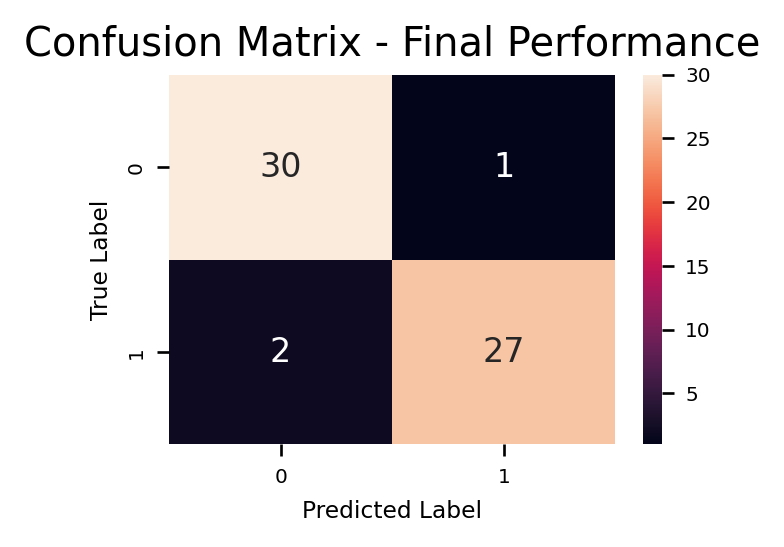

In [52]:
model_best = knn_grid.best_estimator_
model_best.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((y_train,y_val),axis=0))

y_test_pred = model_best.predict(X_test)

caculate_metrics(y_test, y_test_pred,'Final Performance')

### 4.2 Performance difference [1 mark]

Do you think the new classifier, that does not use the "worst" features, is:
 - **as good as the previous classifier** (that uses all the features)
 - **better than the previous classifier**
 - **worse than the previous classifier**
 
Give reasons for your answer.

# Your answer here
It is  worse than the previous classifiers using `worst` features:
- Base on the above results => KNN is the best model when without `worst` features with params {'knn__n_neighbors': 6, 'knn__weights': 'distance'}
- AUC and Recall (93%) which is slightly drop and not achieve the client requirement.
- The score is worse than the before because `worst` feature have the high correlation.
